# eROSITA AGN Project - Starting tasks

You will be working with the catalogue from this paper

https://www.aanda.org/articles/aa/pdf/2022/05/aa41643-21.pdf
Download AGN spectral catalogue
https://erosita.mpe.mpg.de/edr/eROSITAObservations/Catalogues/

At first, from the eROSITA AGN catalogue, you should make the following plots:
- redshift distribution (CTP_REDHSIFT)
- Redshift quality (CTP_quality, CTP_CLASS, CTP_REDSHIFT, CTP_REDSHIFT_GRADE)
- L5100 and 2500 (L5100/2500) vs different LX (LumIntr_....), these are luminsoities across different wavelength
- logNH
- Positions on sky (RA/DEC)

Save plots and share!

After that:

Then download the SDSS catalogue here:
https://www.sdss4.org/dr17/algorithms/qso_catalog/
 And match the two catalogues on RA/DEC
https://github.com/JohannesBuchner/nway?tab=readme-ov-file

-check how well the redshift in SDSS and eFEDS matches

- get an initial match of 100 or so matches for Visual inspection
- download the spectra from this webpage
https://skyserver.sdss.org/dr18/SearchTools/SQS/
Using plate fibre, MJD

Open the spectral files and plot the spectra



Importing the necessary packages:

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import scipy as sc
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy import stats
import os

## Throughout analysis we classify log_nh>=22 as obscured [5]

Creating a function that will allow me to create a dataframe containing all the information from any fits file:

In [3]:
def funct(x):
    l = []
    column_names = x[1].data.names 
    for i in column_names:
        column_data = x[1].data[i]  
        
        if column_data.dtype.kind in 'iuf':  # 'i' = integer, 'u' = unsigned, 'f' = float
            l.append(list(map(float, column_data)))  
        else:
            l.append(list(column_data)) 
    data_dict = {name: col for name, col in zip(column_names, l)}
    return pd.DataFrame(data_dict)


Defining function to calculate the Spearman rank order correlation coefficient, t value and p value of any 2 data samples:

In [4]:
def stat(a, b):
    n = len(a)
    r = 1 - (6*np.sum((stats.rankdata(a) - stats.rankdata(b))**2))/(n*(n**2-1))
    t = r * np.sqrt((n-2)/(1-r**2))
    p = 2 * stats.t.sf(abs(t), n-2)
    text = f'the correlation coefficient is {r:.3f}, the t-value is {t:.3f} and the p-value is {p:.3f}'
    return r, t, p, text

In [11]:
stat(l2500[(l5100 != -99) & (l2500 != -99)], l5100[(l5100 != -99) & (l2500 != -99)])

(0.931941793562383,
 241.26191124232764,
 0.0,
 'the correlation coefficient is 0.932, the t-value is 241.262 and the p-value is 0.000')

Creating a dataframe containing the eROSITA AGN data from the eROSITA fits file:

In [7]:
with fits.open('./data/eFEDS_AGN_spec_V17.6.fits') as hdul:
    erosita_df=funct(hdul)

In [54]:
path = '/Volumes/eROSITA/bobby/'

In [55]:
os.getcwd()

'/Users/bobbyscott/Desktop/year 4 project'

In [56]:
os.listdir(path)

['spec-0568-52254-0372.fits.download', 'spec-0568-52254-0320.fits']

In [2]:
with fits.open('/Volumes/eROSITA/bobby/yourfile.fits') as hdul:
    print(hdul[1].data.names)

OSError: No SIMPLE card found, this file does not appear to be a valid FITS file

In [8]:
#erosita_df = erosit_df[(erosit_df['inArea90']==True) & (erosit_df['DET_LIKE']>10)]

In [9]:
erosita_df

ID_SRC     RA_CORR  DEC_CORR      DET_LIKE  inArea90  \
0          1.0  144.253833  1.095920  33254.589844      True   
1          3.0  134.074170 -1.634745  27206.867188      True   
2          4.0  130.106096  3.550809  20327.914062      True   
3          7.0  139.259589 -0.737505   9961.442383      True   
4          8.0  138.501628  5.114248    203.909912      True   
...        ...         ...       ...           ...       ...   
22074  32663.0  143.397171 -0.102708      7.960906      True   
22075  32665.0  135.519225 -0.065732      6.598034      True   
22076  32668.0  130.460951 -1.495223      6.504692      True   
22077  32681.0  134.225928  1.219989      6.843378      True   
22078  32683.0  130.239454 -0.861357      7.213770      True   

      CTP_LS8_UNIQUE_OBJID  CTP_LS8_RA  CTP_LS8_DEC  CTP_quality  CTP_CLASS  \
0              336705_3729  144.254359     1.095466          4.0        3.0   
1              320824_5242  134.074291    -1.635379          4.0        3.0   
2              351045_4021  130.106301     3.550497          4.0        3.0   
3              326605_2575  139.259947    -0.738204          4.0        3.0   
4              359702_4847  138.500844     5.114262          4.0        2.0   
...                    ...         ...          ...          ...        ...   
22074           330941_528  143.398284    -0.100164          3.0        2.0   
22075          330910_1350  135.519858    -0.064304          4.0        2.0   
22076          322249_3141  130.463816    -1.496760          2.0        2.0   
22077          338104_1668  134.227987     1.220149          2.0        2.0   
22078           326568_458  130.238243    -0.856177          2.0        2.0   

       ...    logZ_m2    logZ_m3     logZ_m4     logZ_m5      L2500  \
0      ... -95.408150 -96.236328 -256.783783 -168.373398 -99.000000   
1      ... -93.325279 -93.075577 -344.992615 -243.965271 -99.000000   
2      ... -97.202927 -98.308121 -117.222214  -47.779343 -99.000000   
3      ... -86.631660 -87.528053 -103.747284  -43.852798 -99.000000   
4      ... -79.716370 -79.444603  -79.359467  -32.815025 -99.000000   
...    ...        ...        ...         ...         ...        ...   
22074  ... -57.412960 -57.235939  -57.441441  -27.570103  29.733891   
22075  ... -57.904724 -57.824890  -57.904018  -23.403677 -99.000000   
22076  ... -64.968452 -64.942192  -64.964882  -27.804216  28.535963   
22077  ... -60.541363 -60.499615  -60.594902  -26.104383  28.079590   
22078  ... -58.421581 -58.379475  -58.532413  -24.014606  30.074404   

           L5100         W1    W1_ERR         W2    W2_ERR  
0      28.920471  13.998380  0.000285  13.727057  0.000492  
1      28.913860  14.665795  0.000695  14.686586  0.001572  
2      28.694447  15.165761  0.000761  14.816475  0.001259  
3      30.169371  15.268593  0.000834  14.800365  0.001222  
4     -99.000000  19.855242  0.058605  19.271603  0.082132  
...          ...        ...       ...        ...       ...  
22074 -99.000000  21.327942  0.230135  20.938427  0.360253  
22075 -99.000000  21.042709  0.162125  20.008116  0.147120  
22076  29.472136  19.083408  0.028433  19.417389  0.088384  
22077  28.737610  20.779943  0.133132  20.277317  0.191573  
22078  30.137609  20.834734  0.137523  20.352015  0.201413  

[22079 rows x 64 columns]

Viewing all of the dataframe columns so we can clearly see what information is contained in the dataframe:

Creating new dataframe containing columns to be plotted:

In [12]:
plots_df = erosita_df[['RA_CORR', 'DEC_CORR', 'DET_LIKE', 'CTP_LS8_RA', 'CTP_LS8_DEC', 'CTP_REDSHIFT', 'LxModel', 'SrcCts', 'FluxCorr_Med_s', 'FluxCorr_Med_t', 'FluxIntr_Med_s', 'FluxIntr_Med_2keV', 'FluxObsv_Med_s', 'FluxObsv_Med_t', 'lognH_Med_m1', 'Gamma_Med_m3', 'L2500', 'L5100']]

Creating function that plots every iteration of this dataframe:

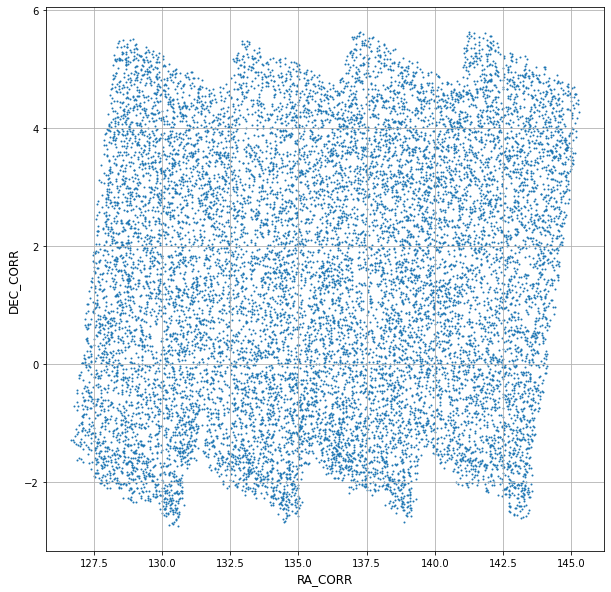

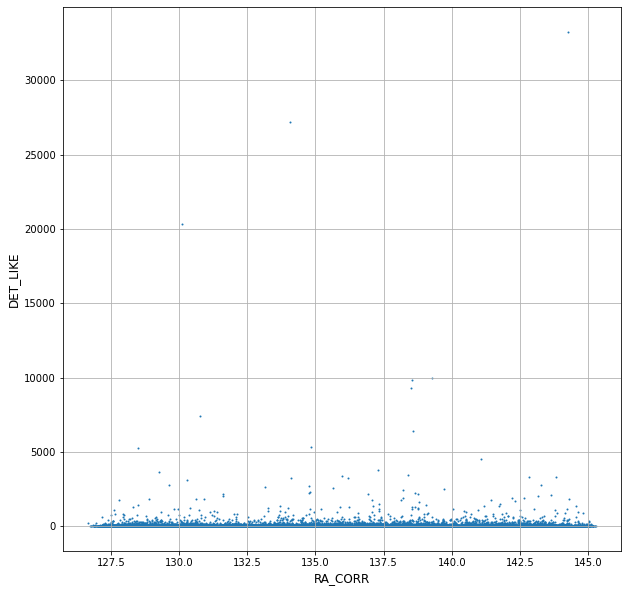

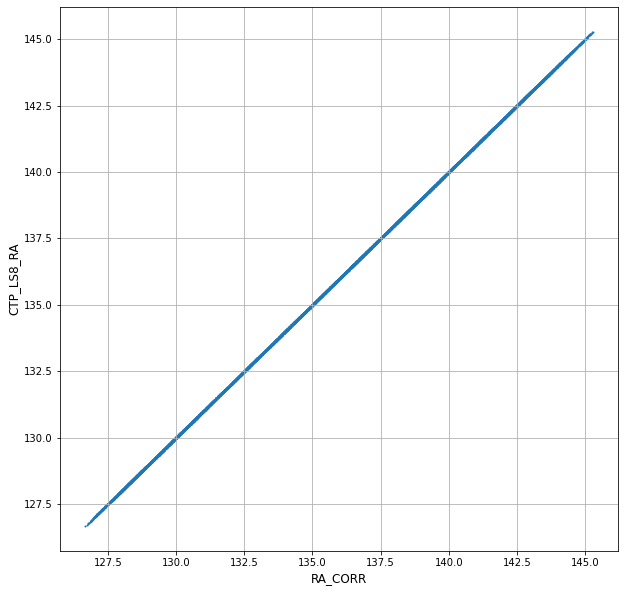

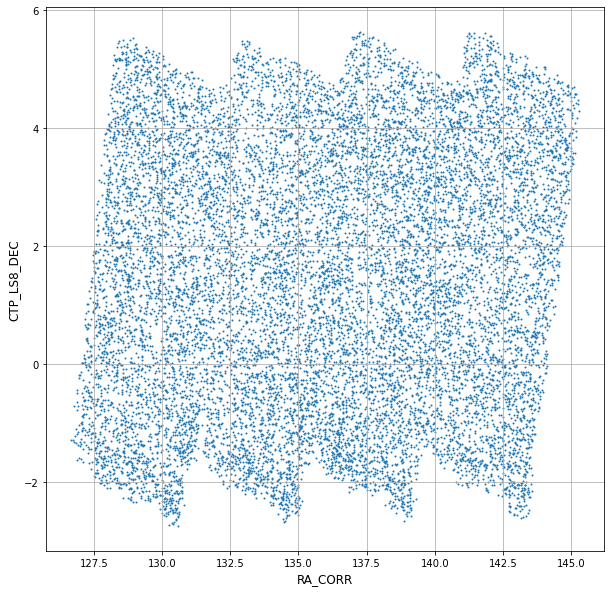

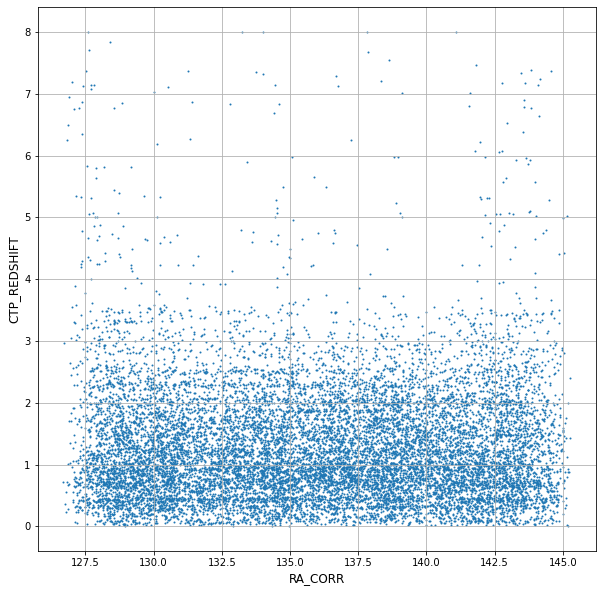

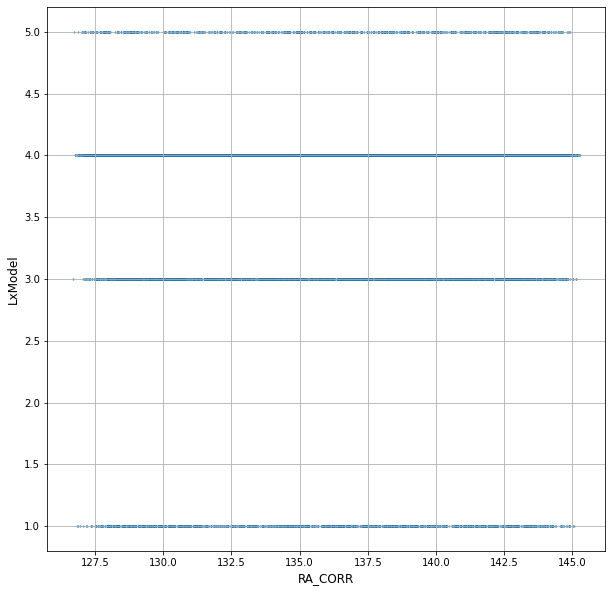

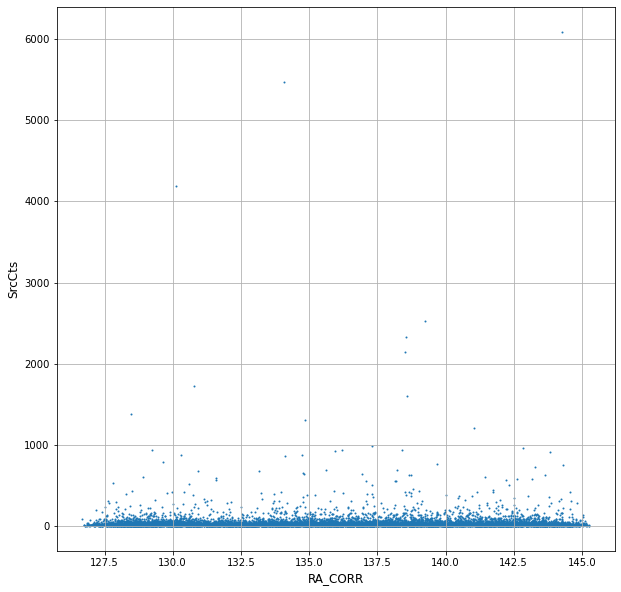

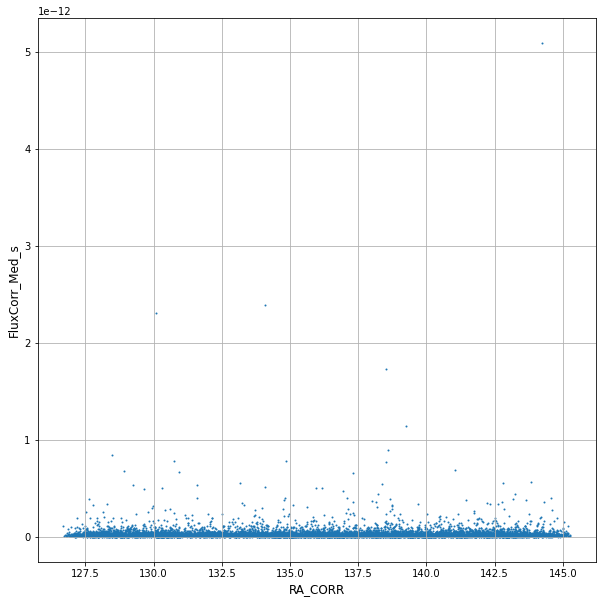

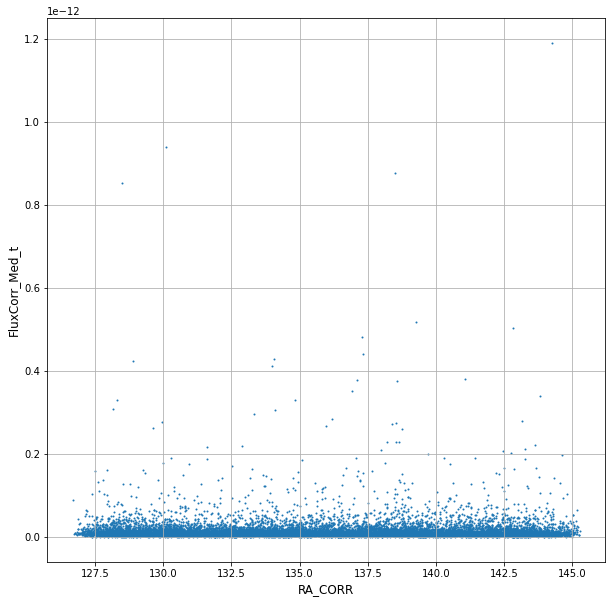

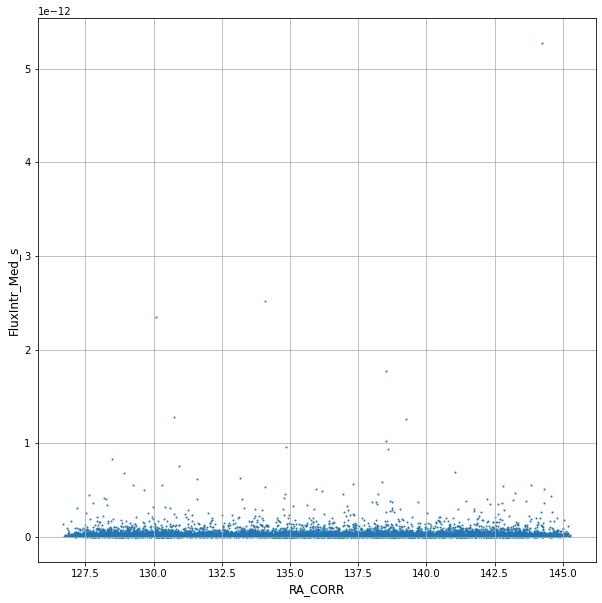

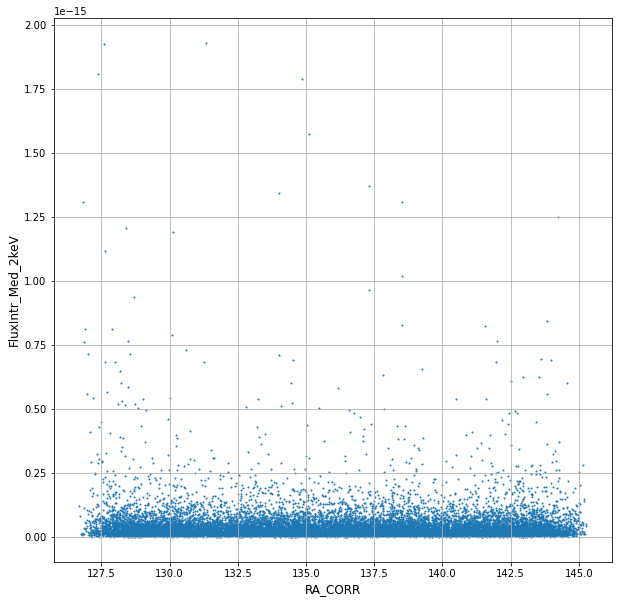

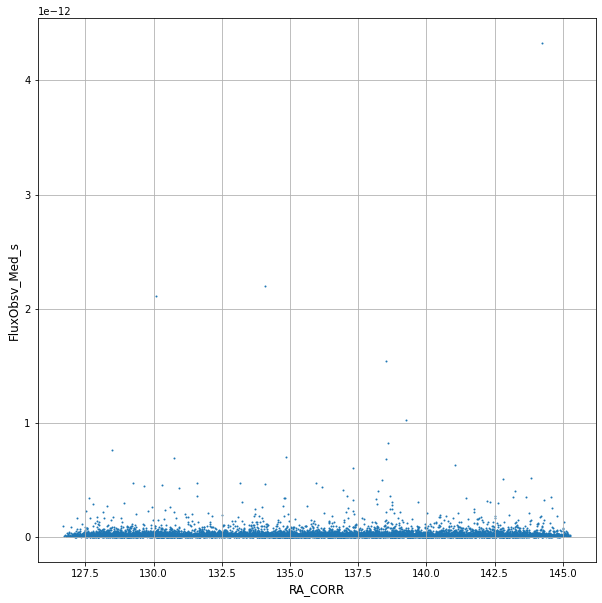

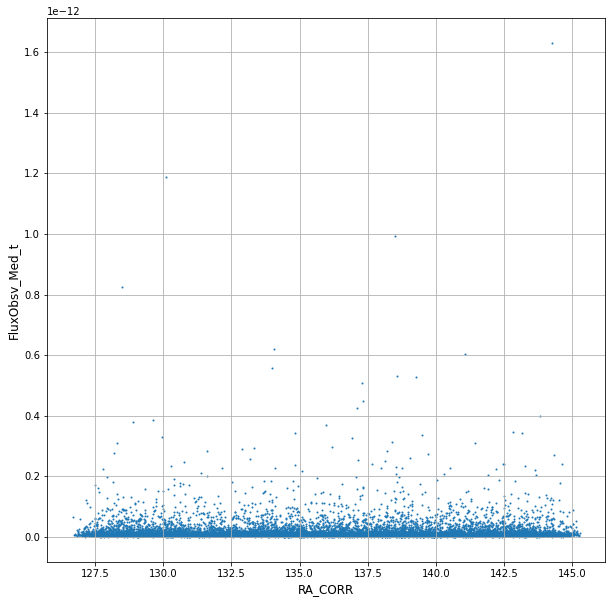

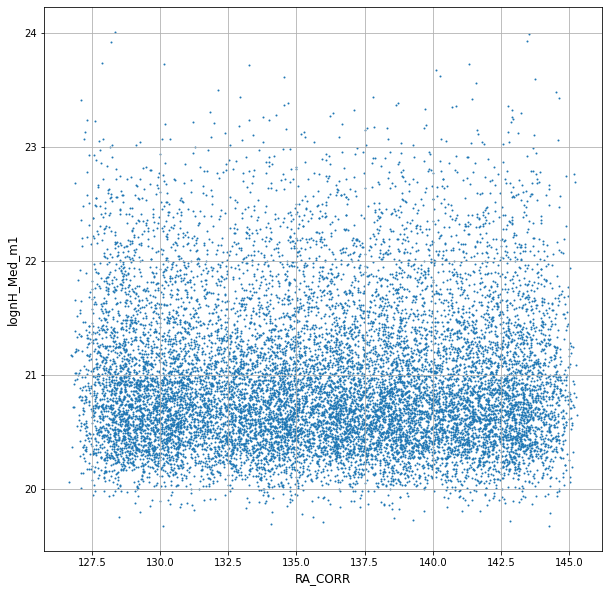

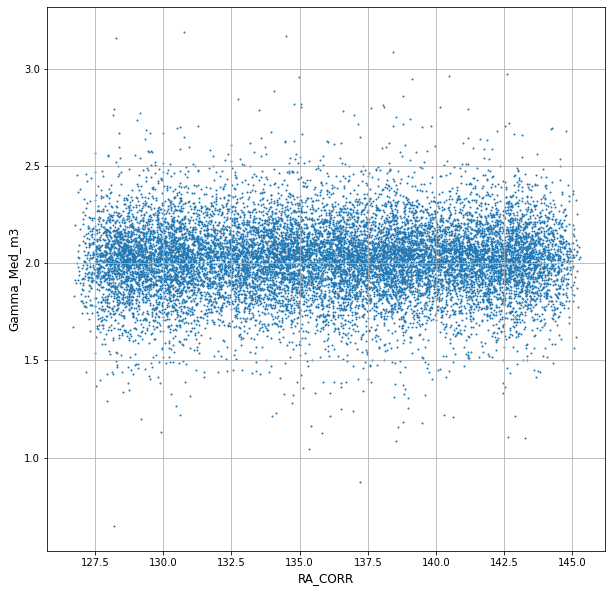

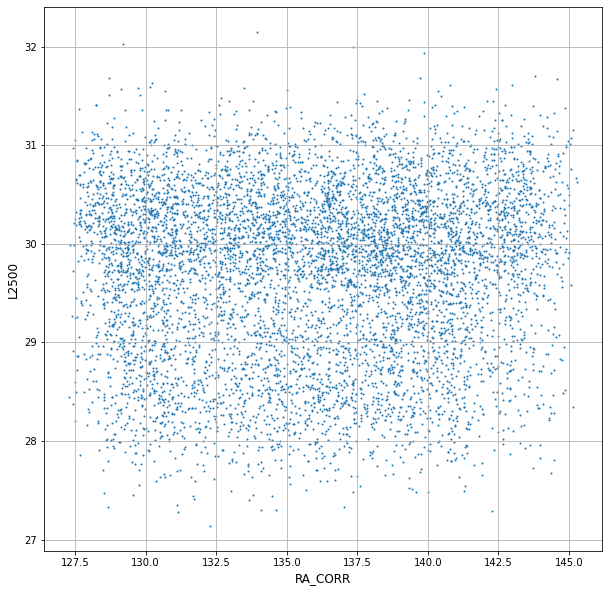

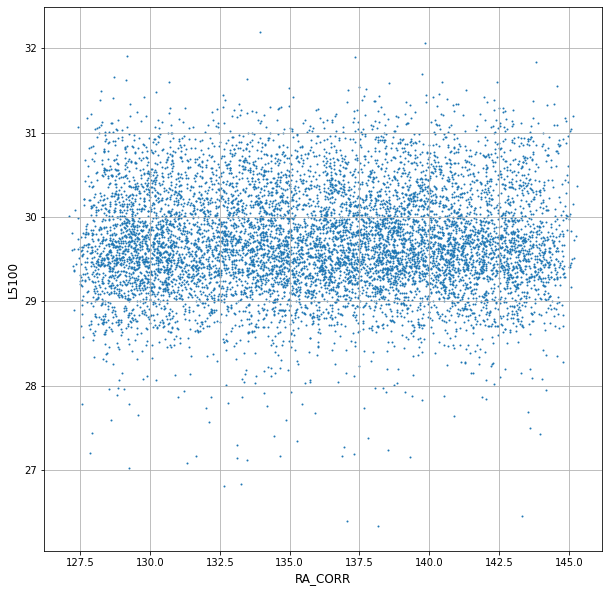

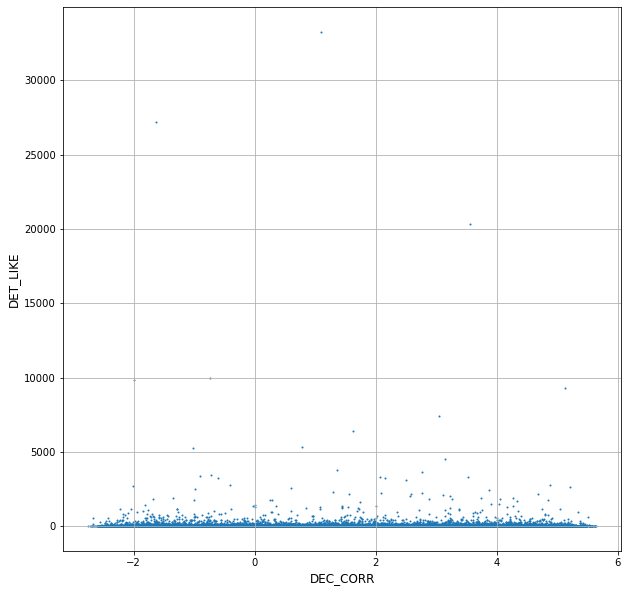

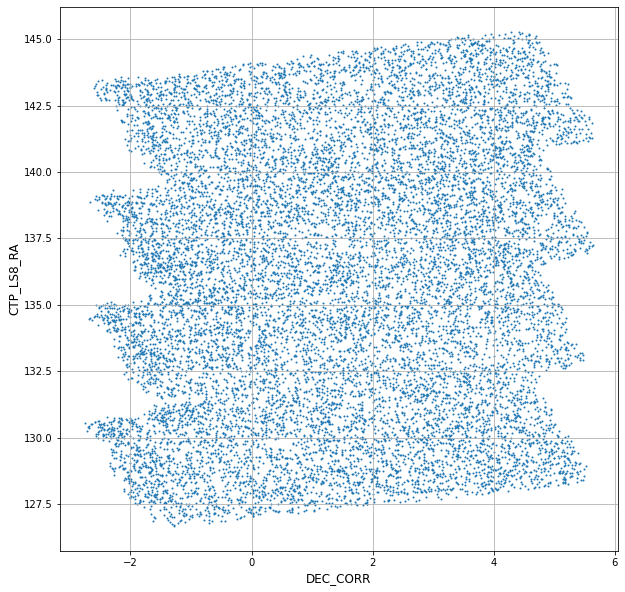

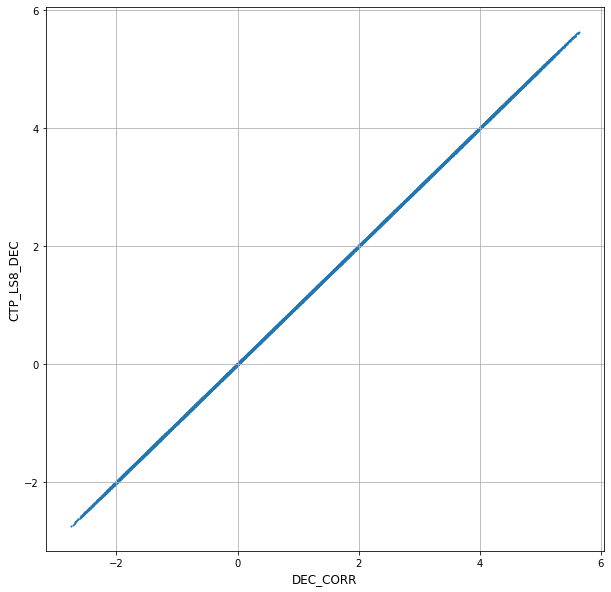

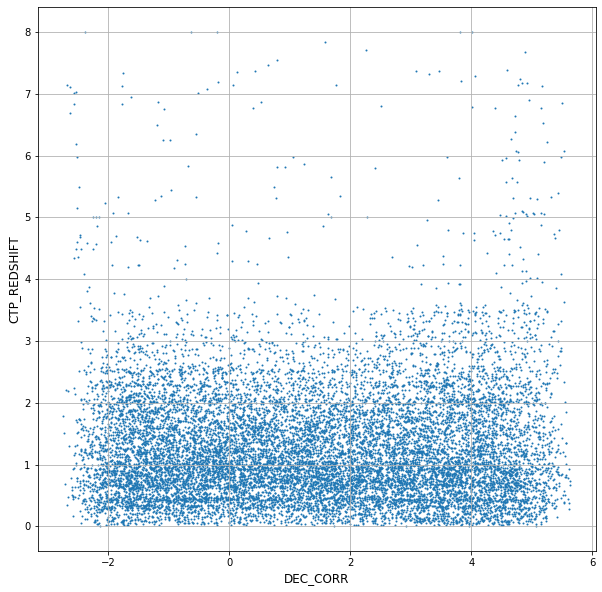

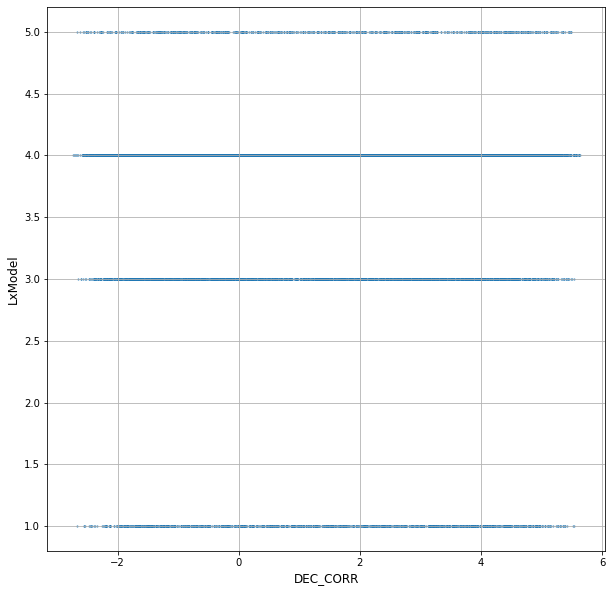

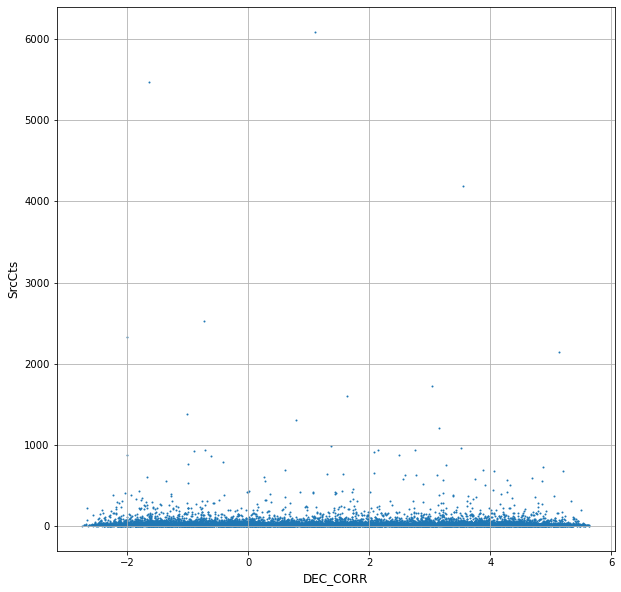

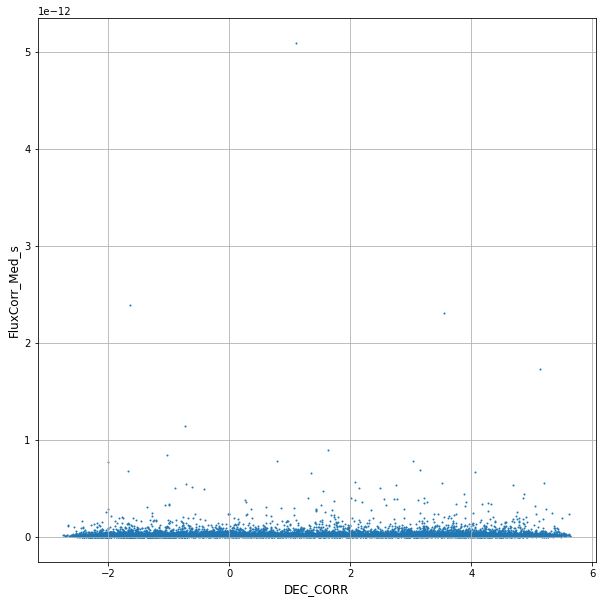

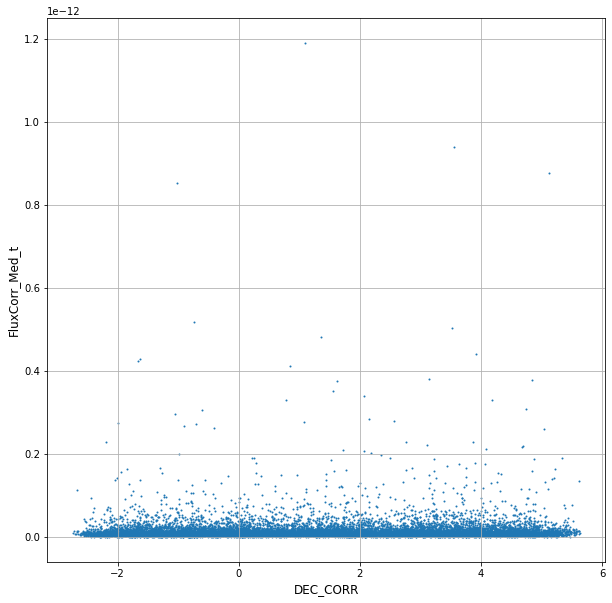

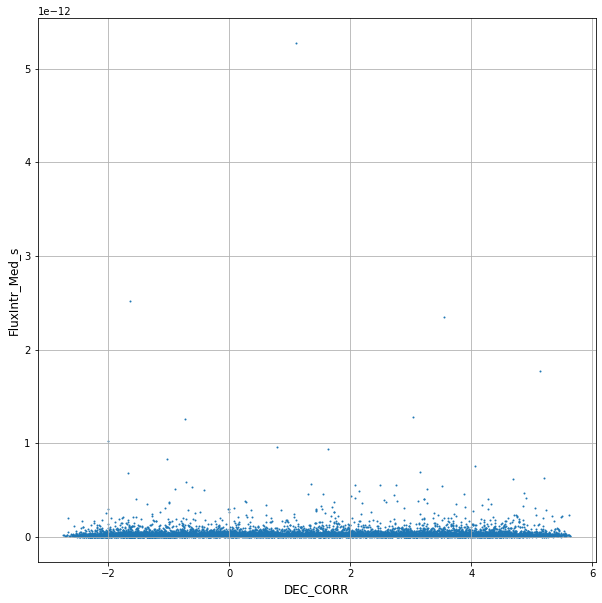

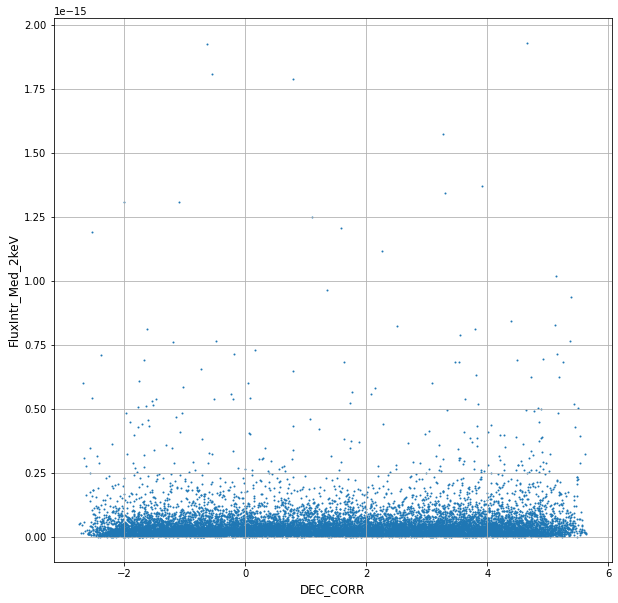

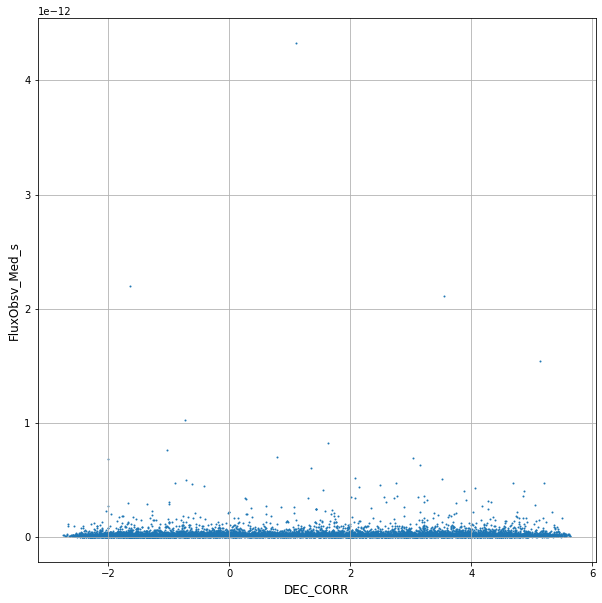

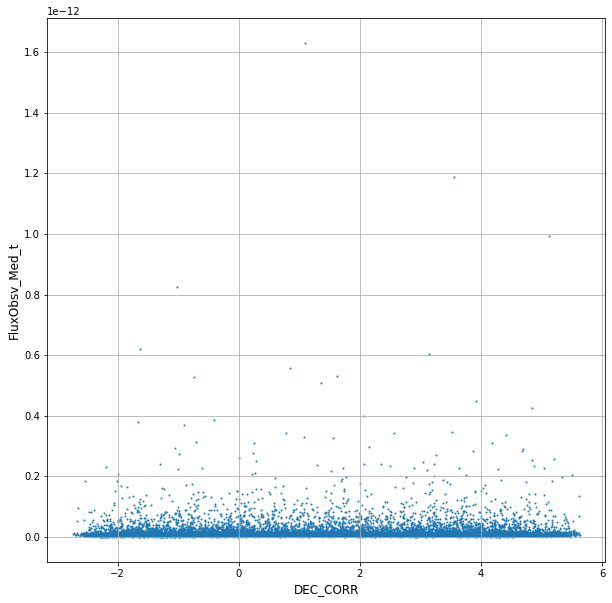

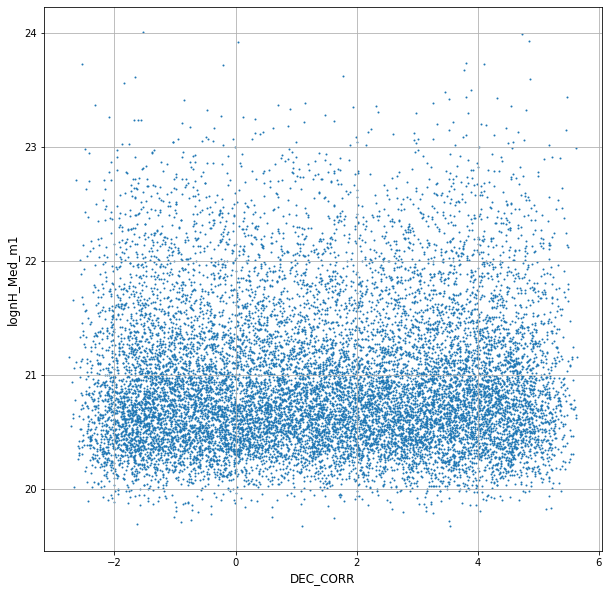

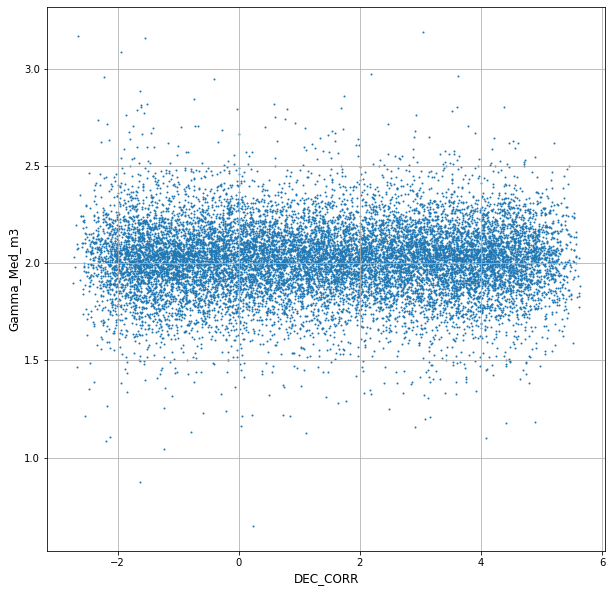

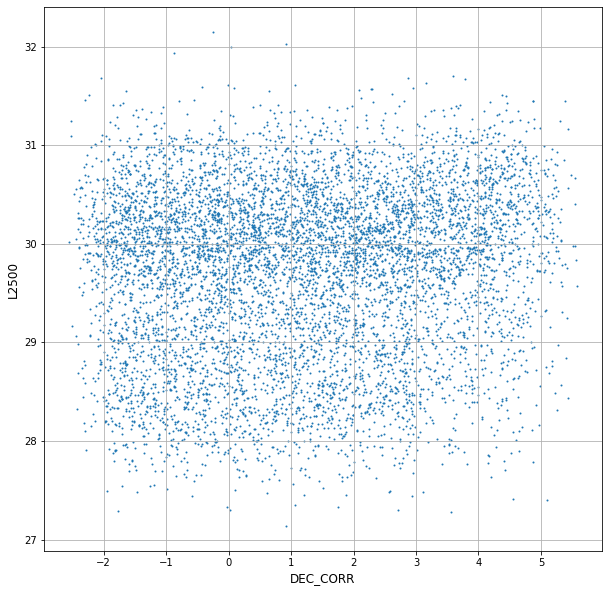

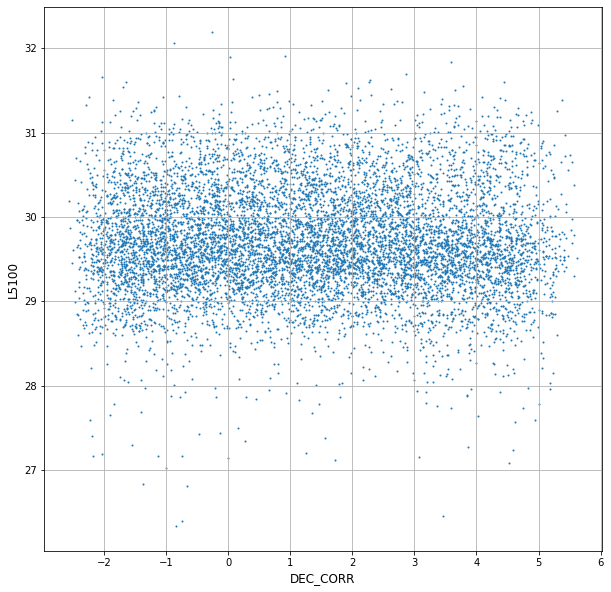

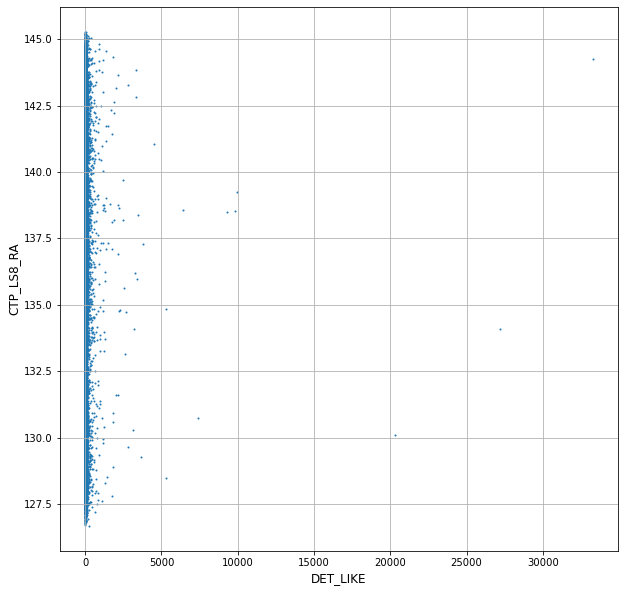

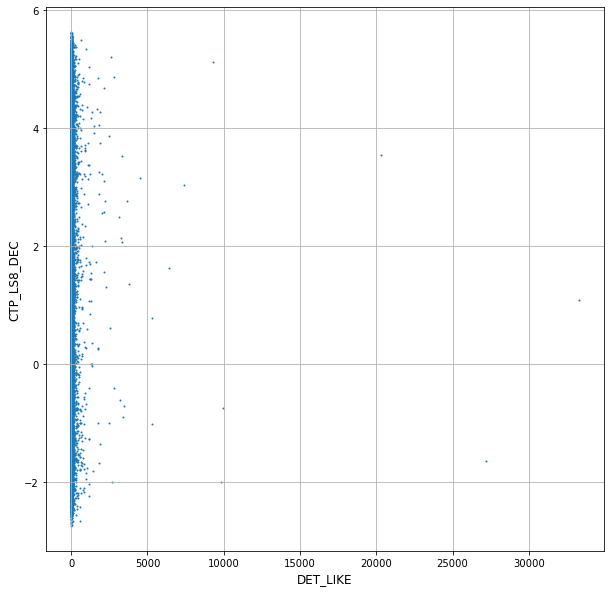

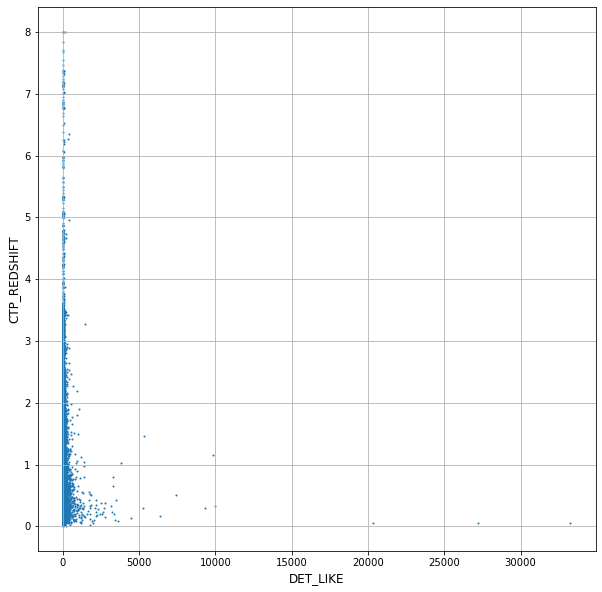

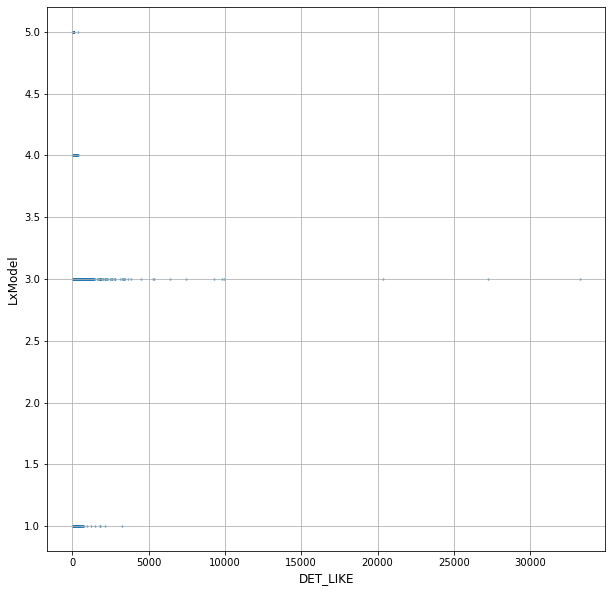

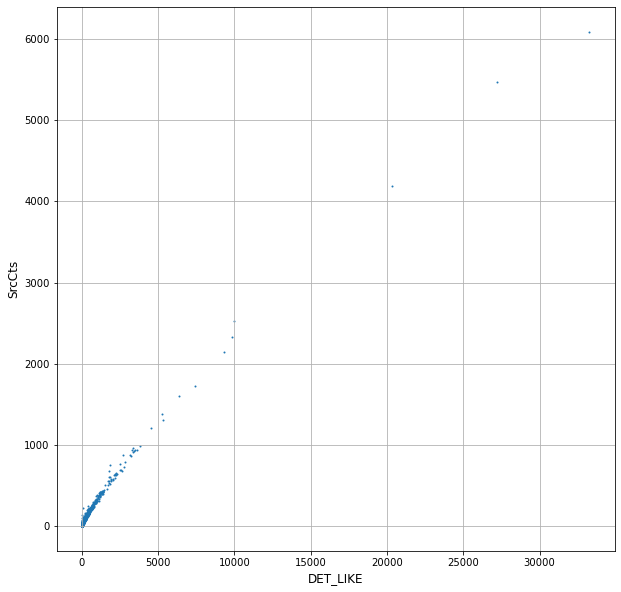

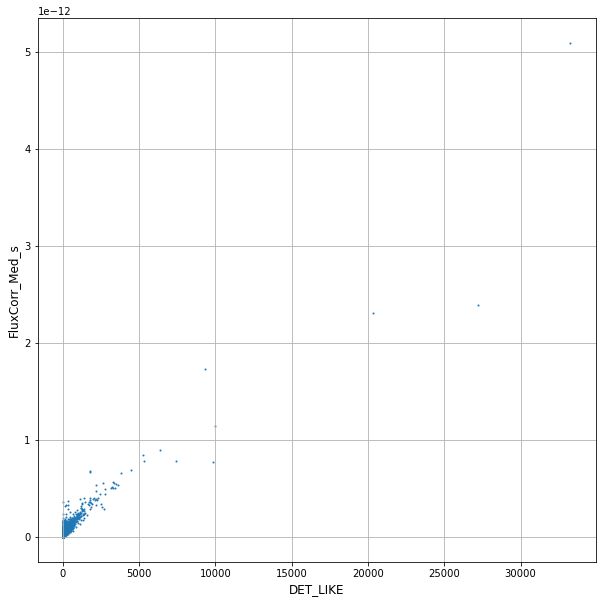

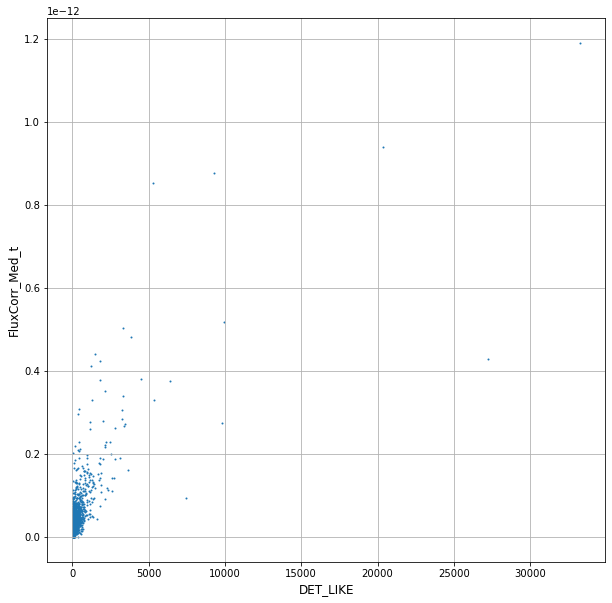

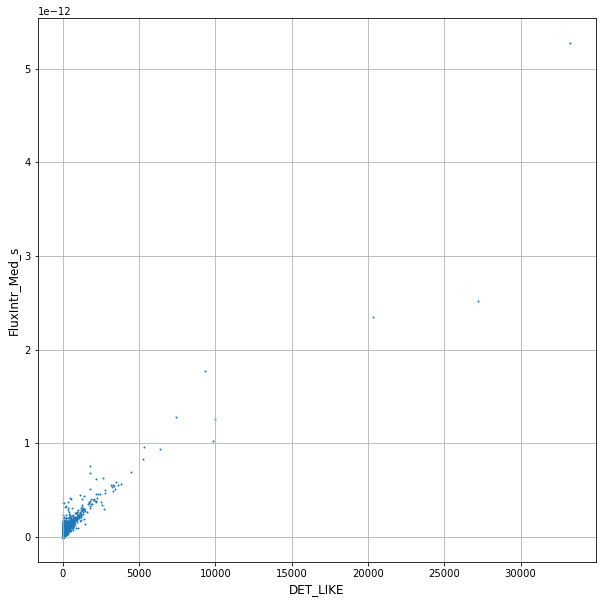

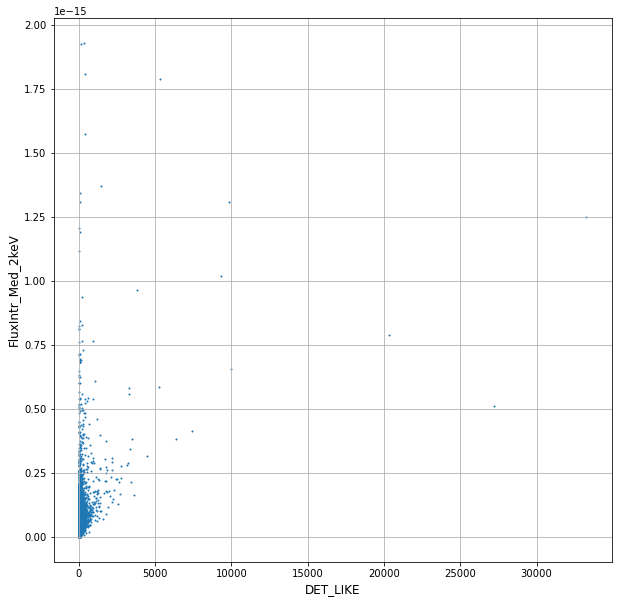

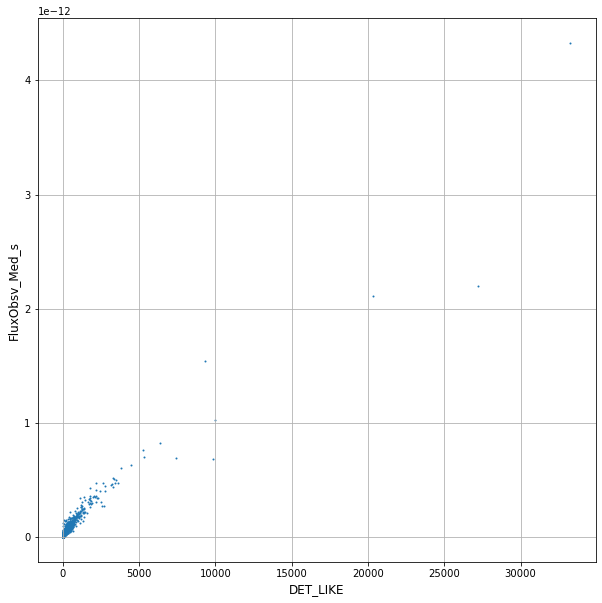

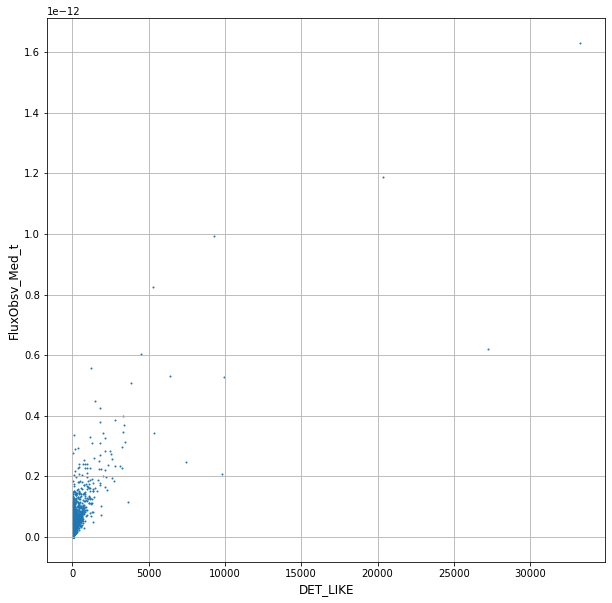

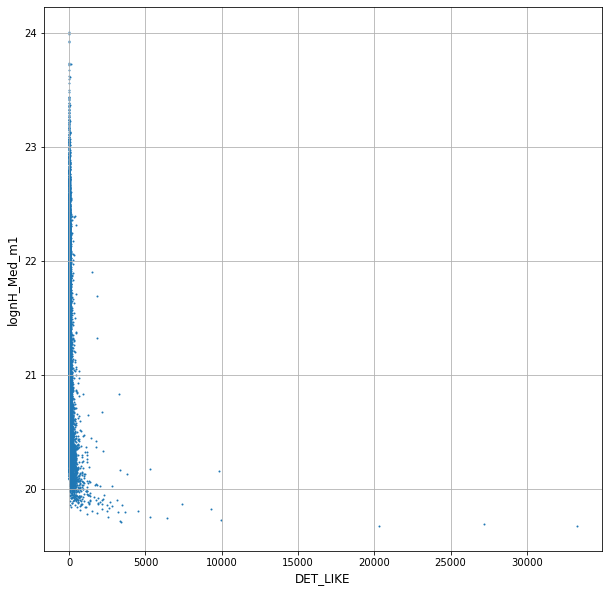

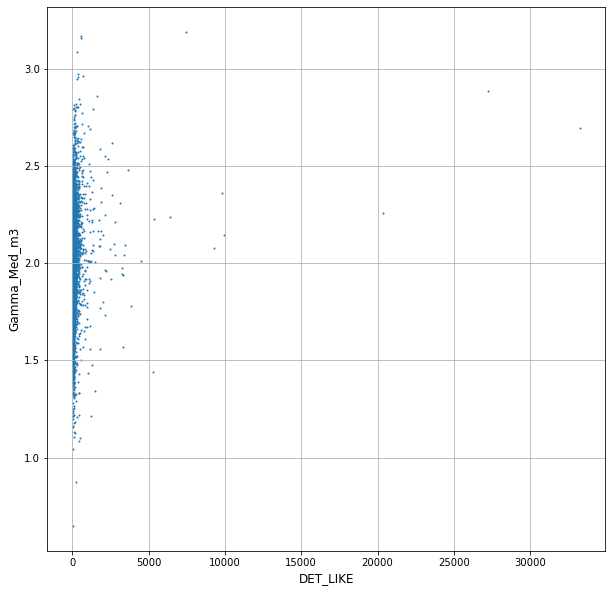

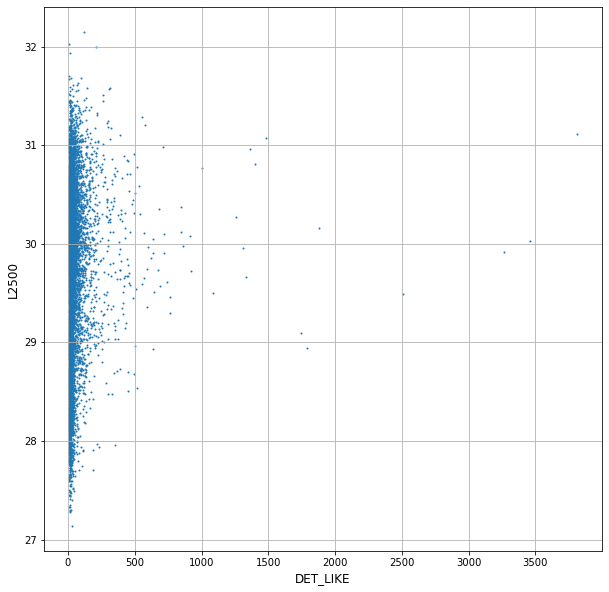

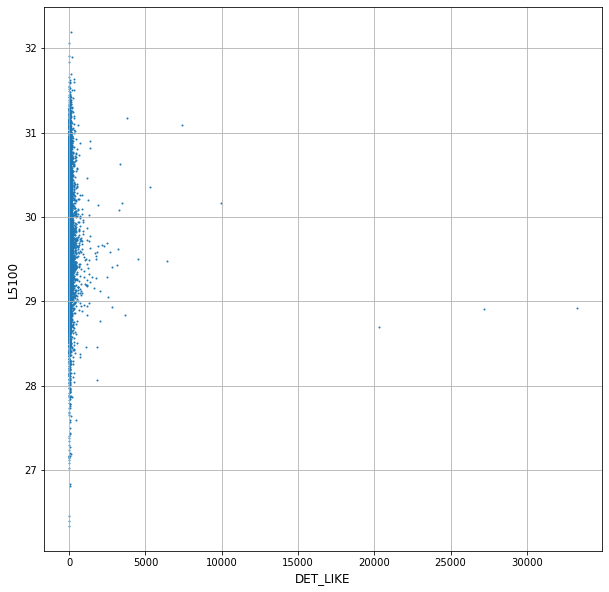

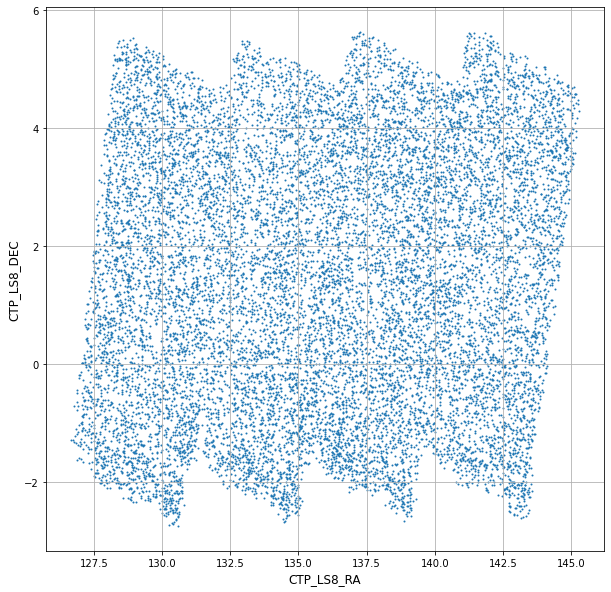

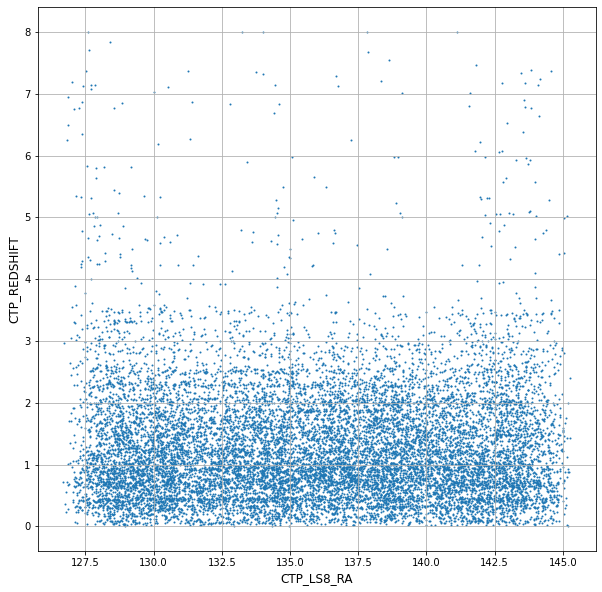

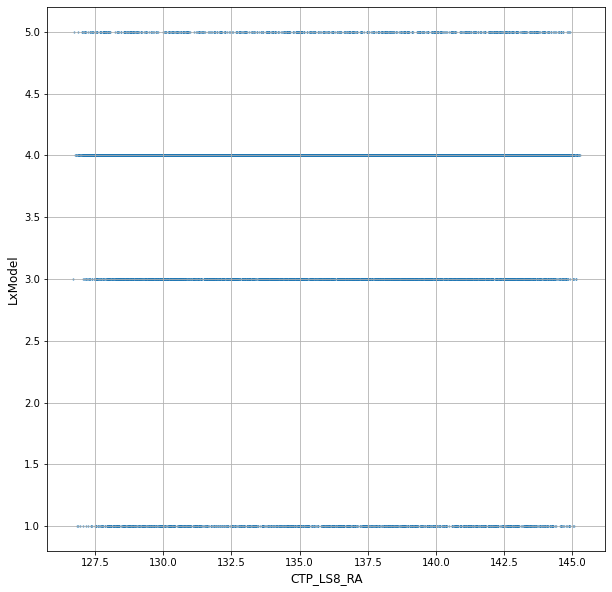

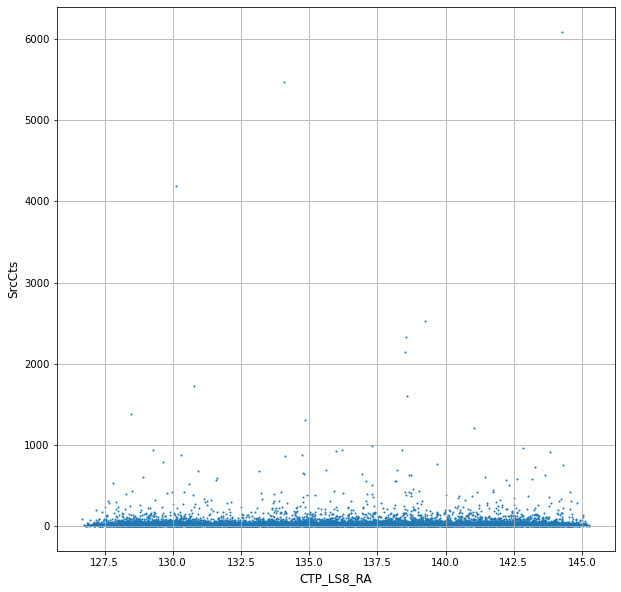

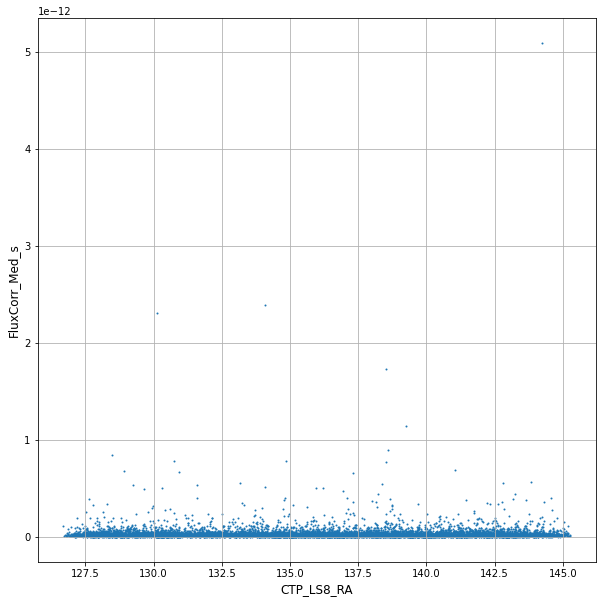

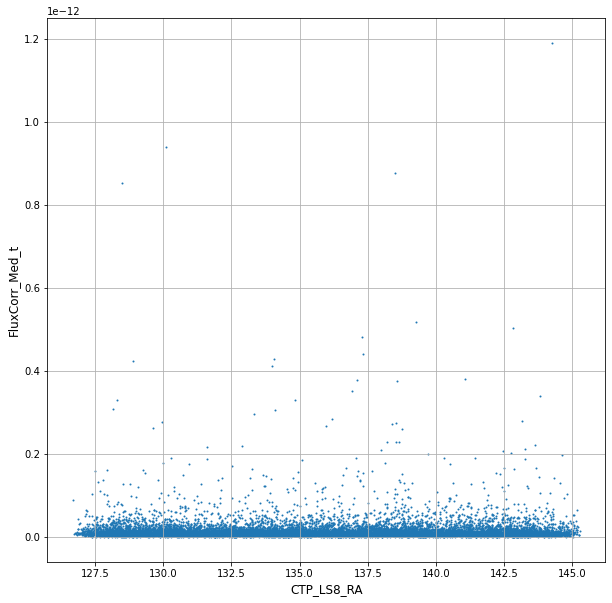

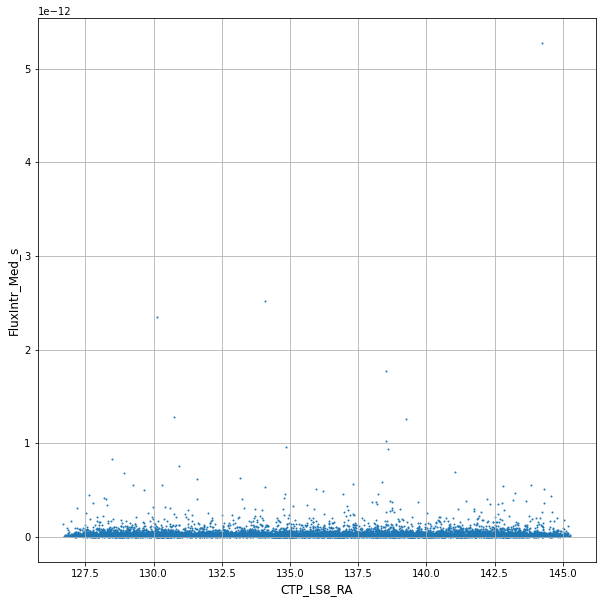

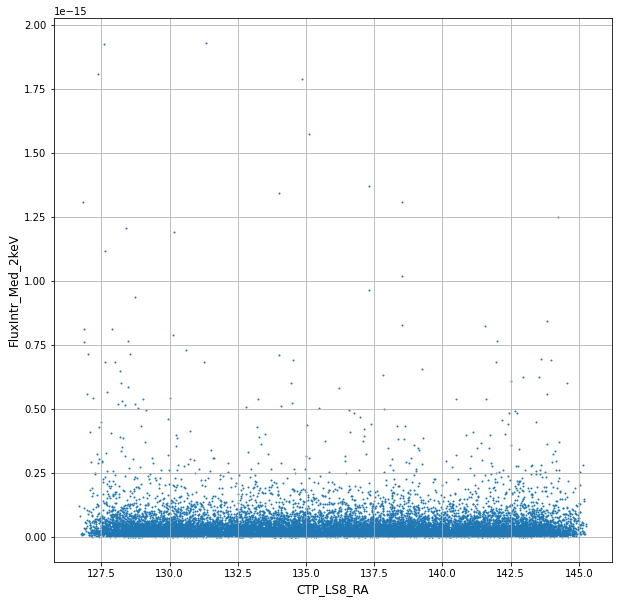

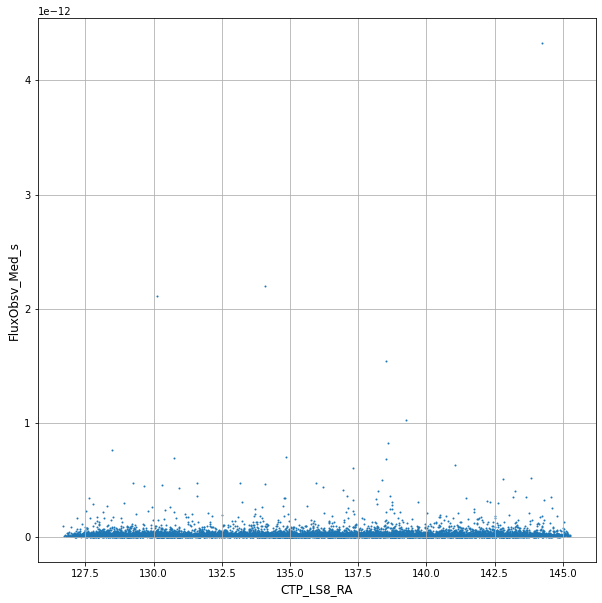

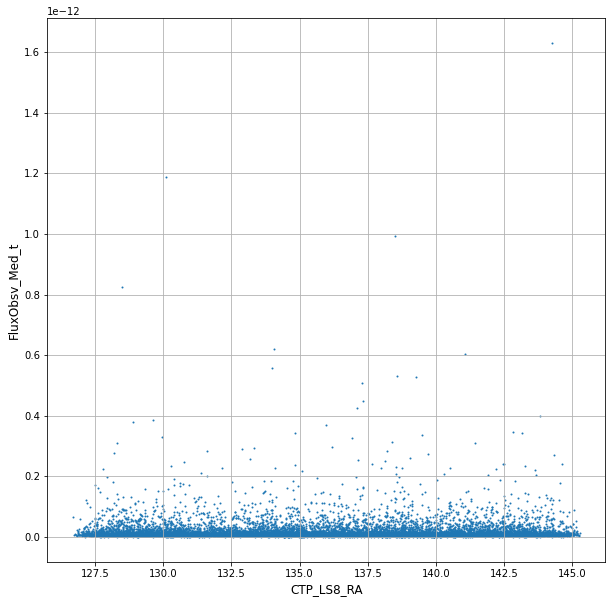

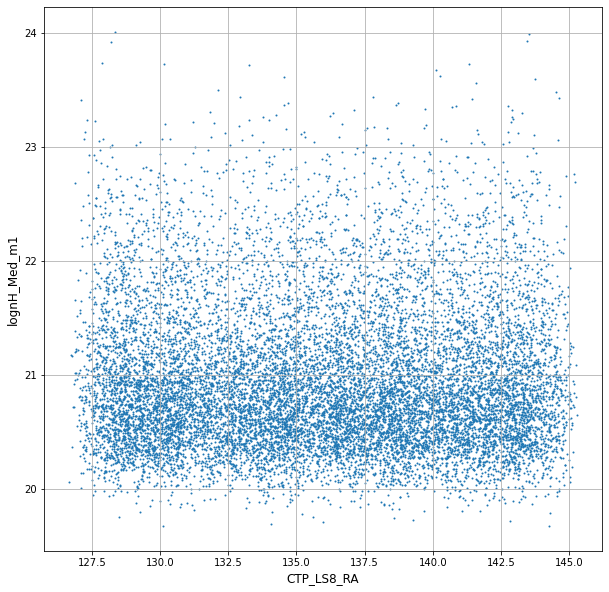

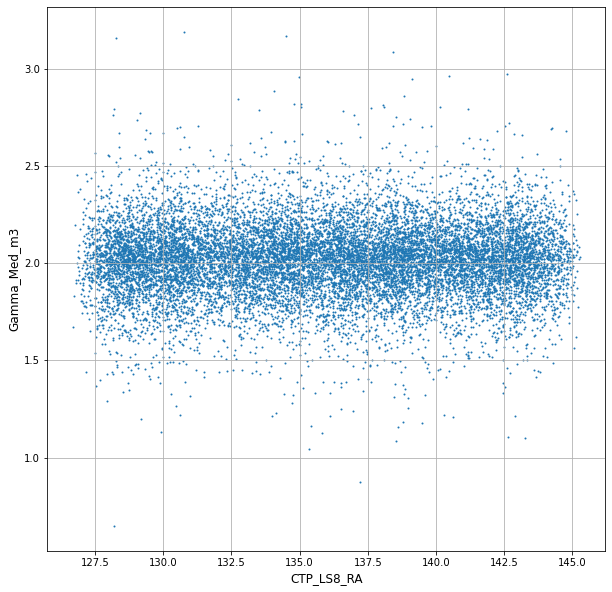

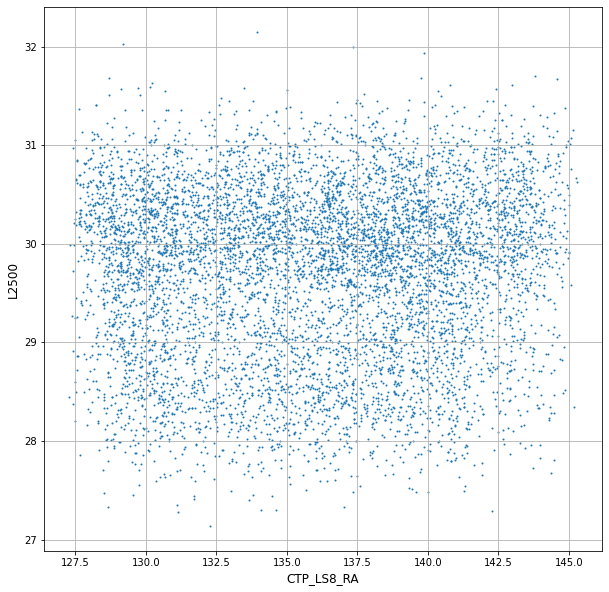

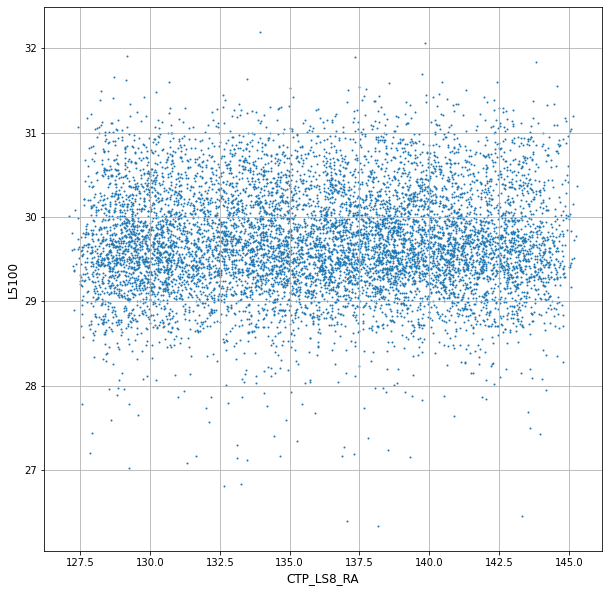

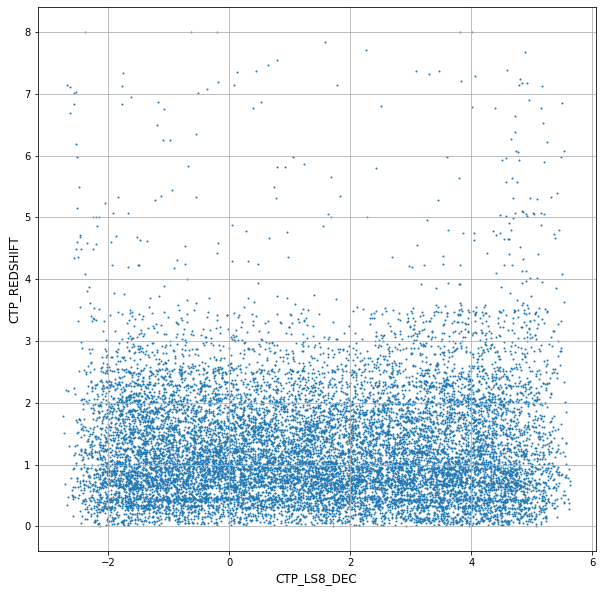

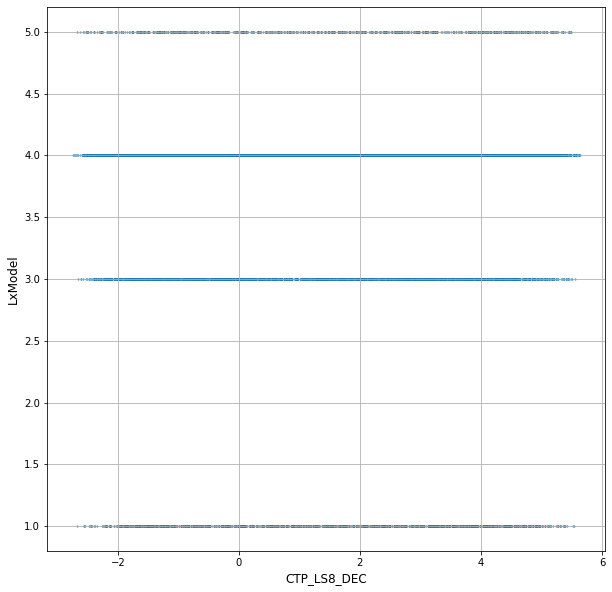

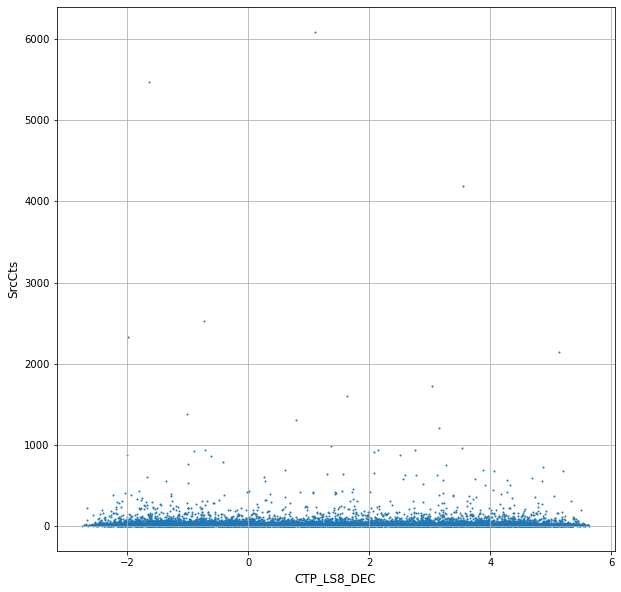

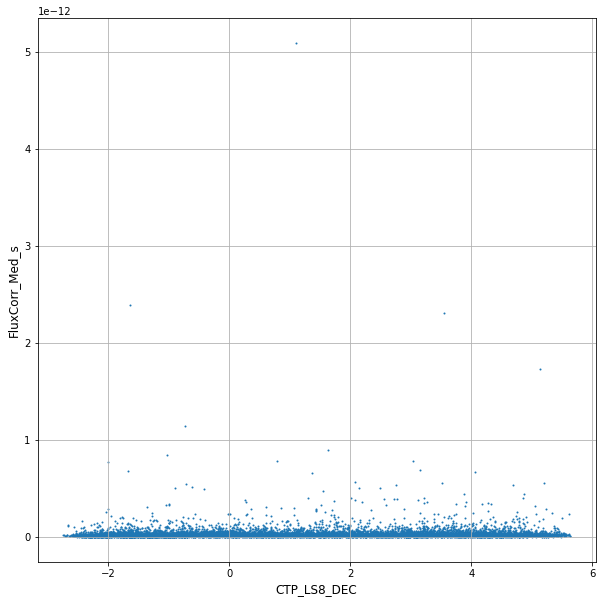

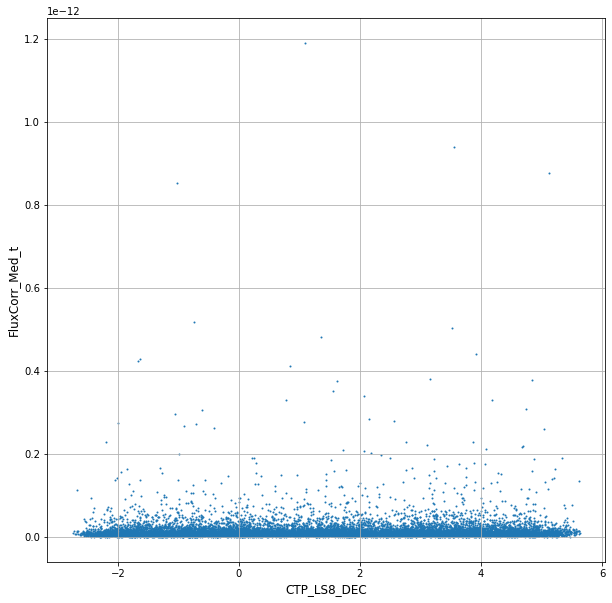

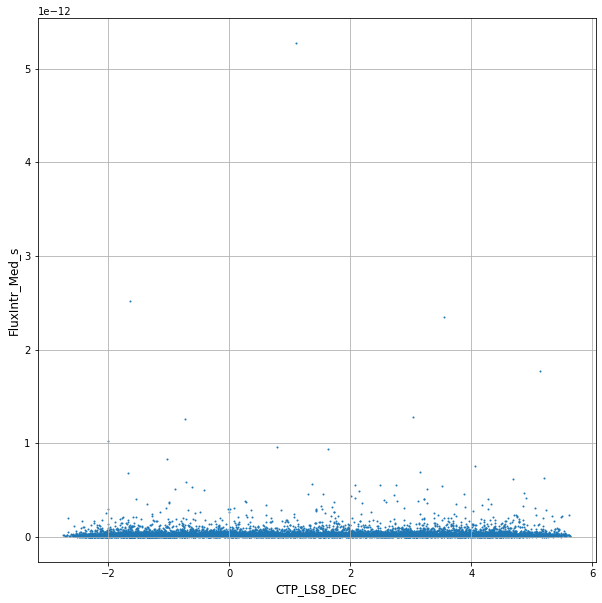

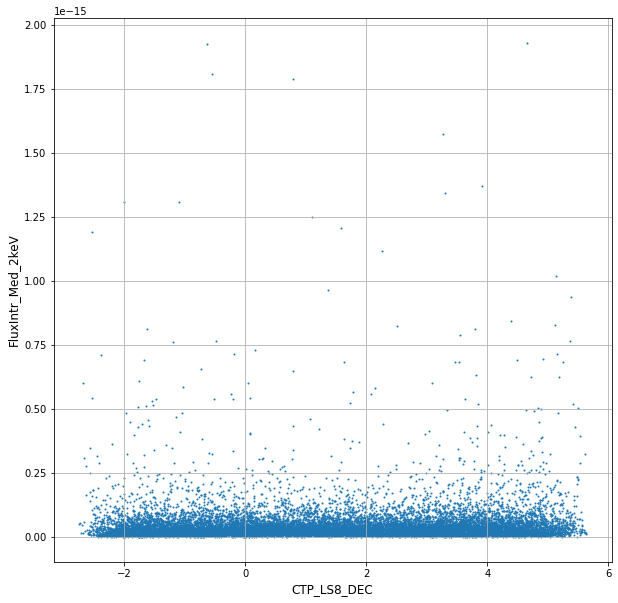

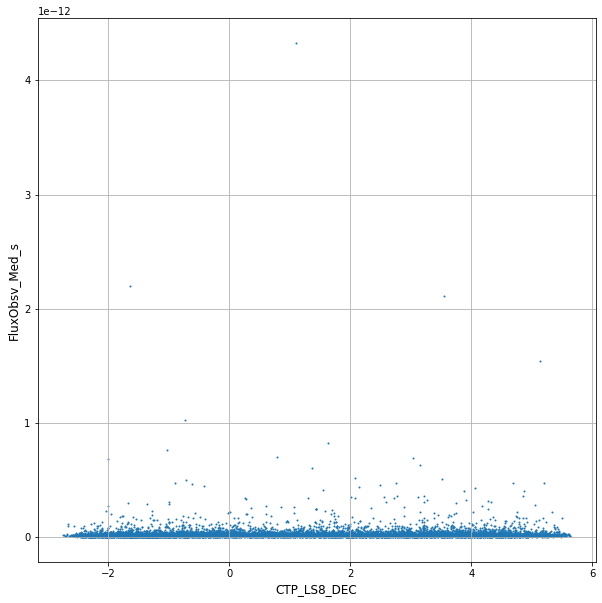

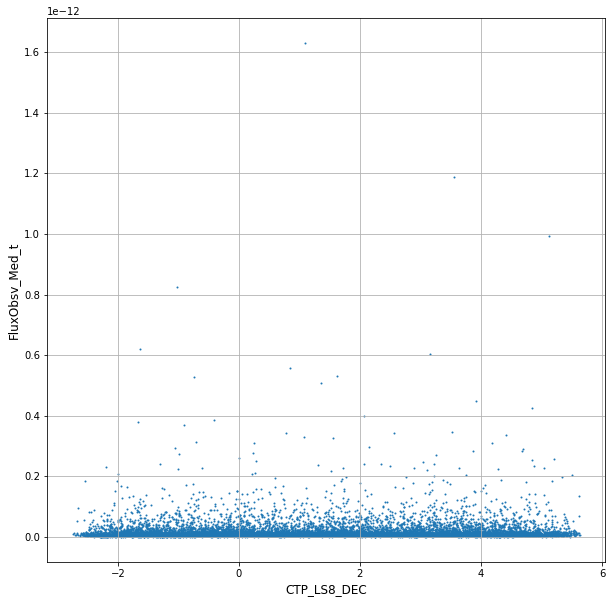

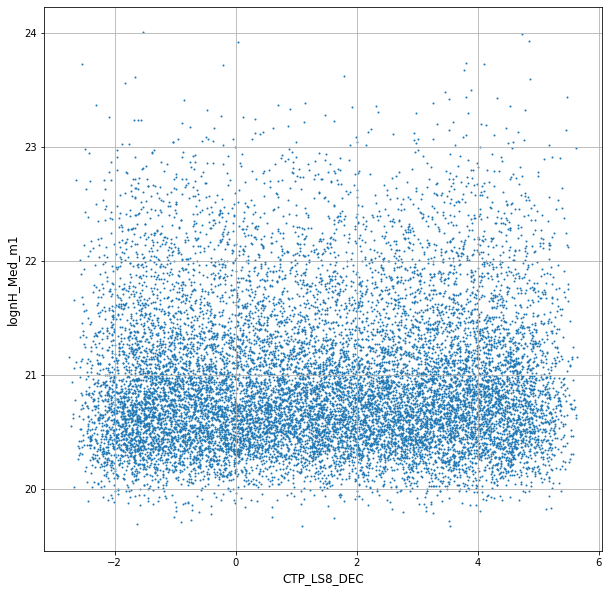

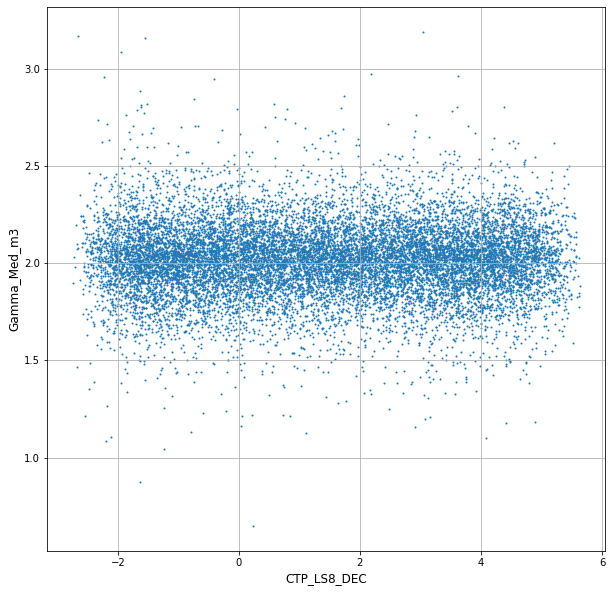

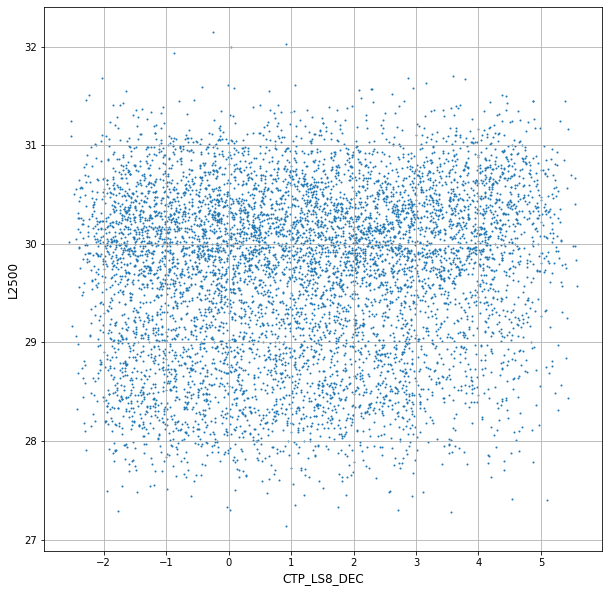

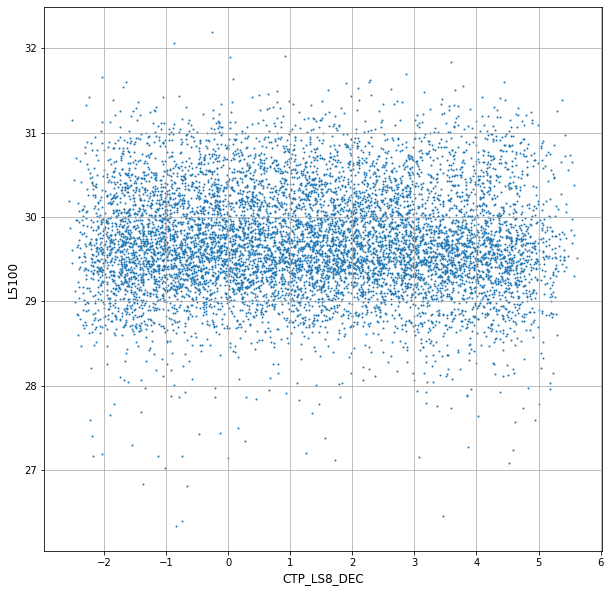

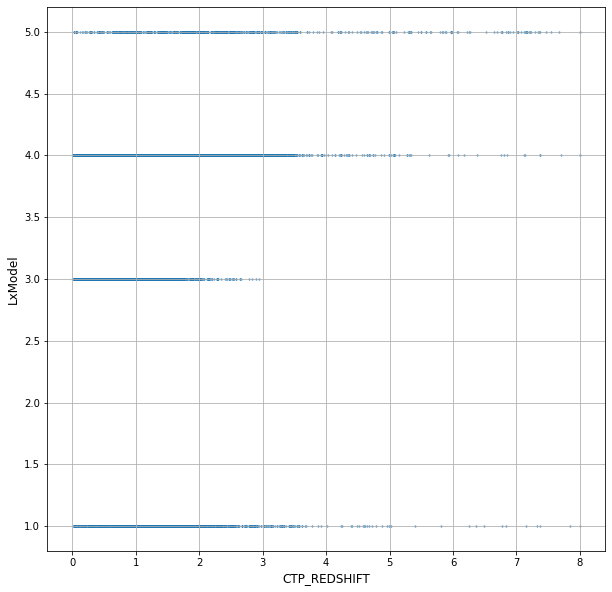

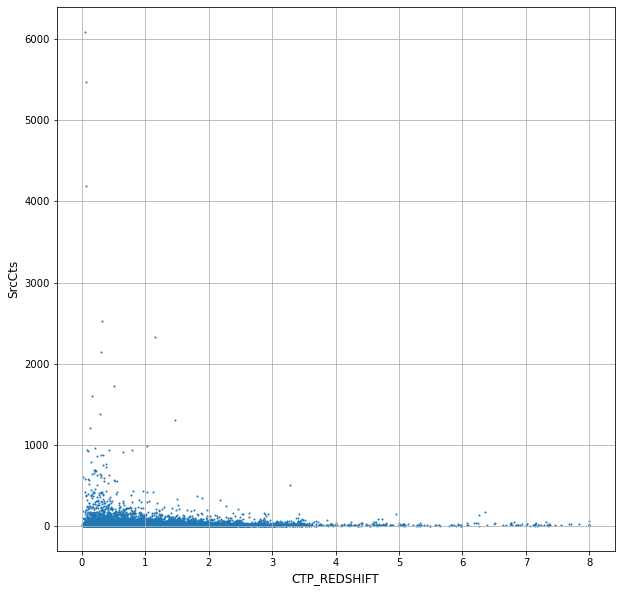

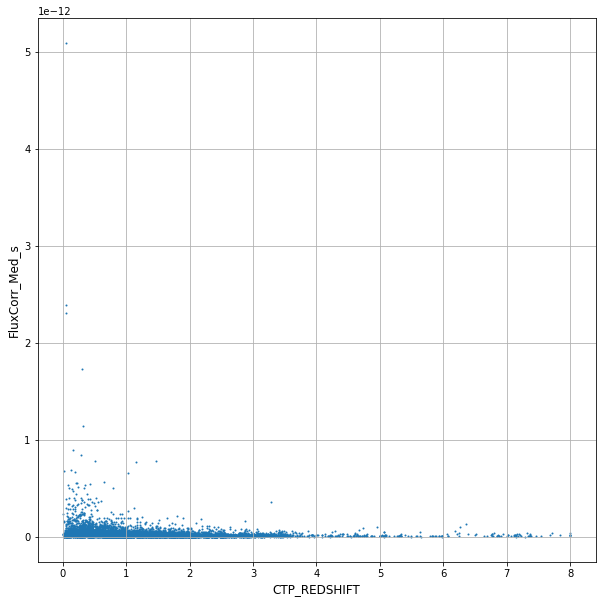

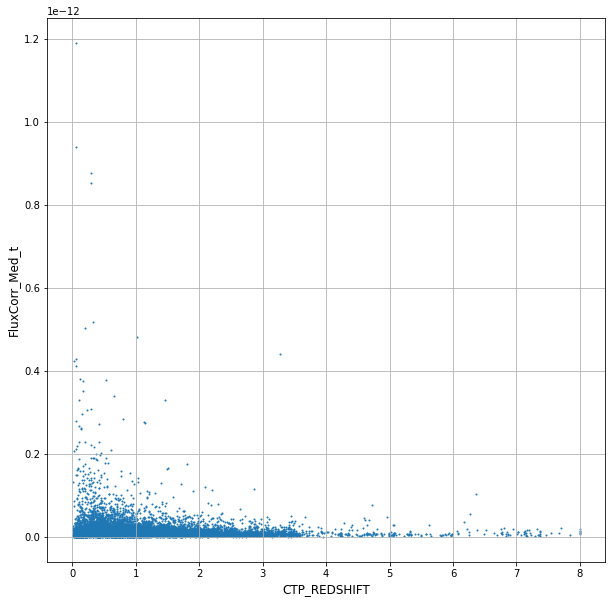

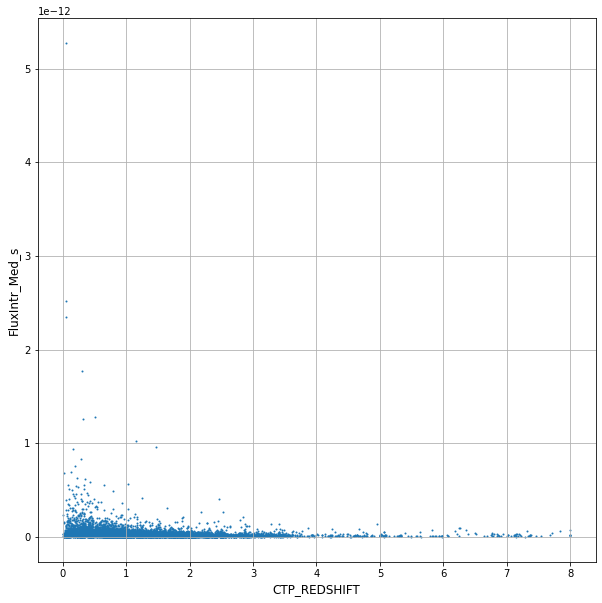

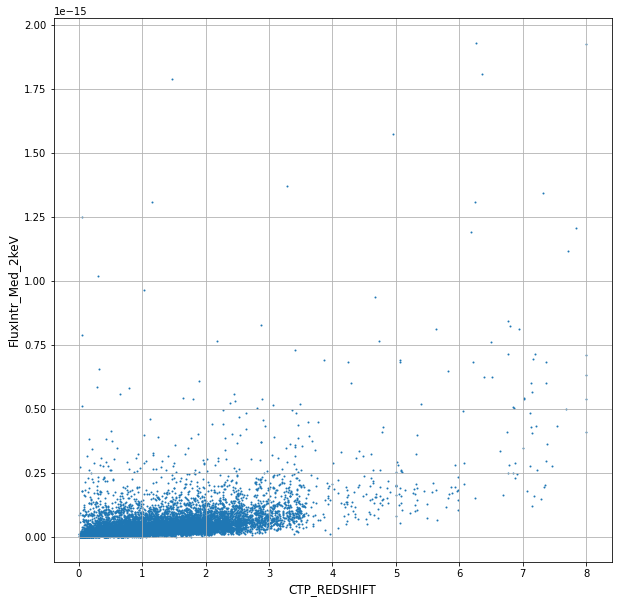

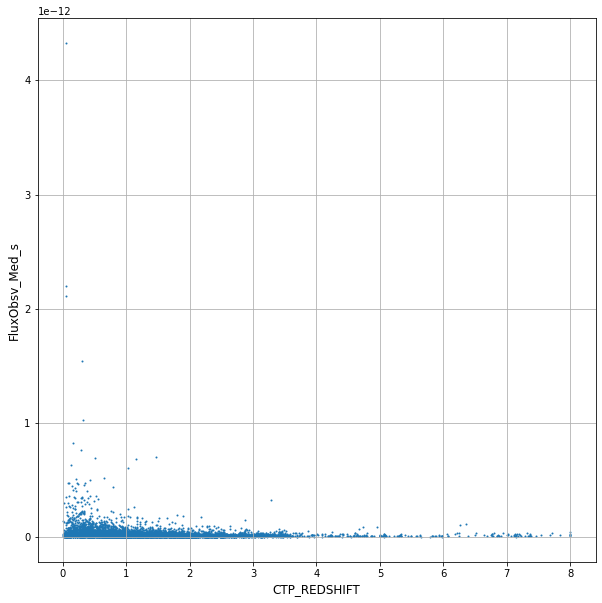

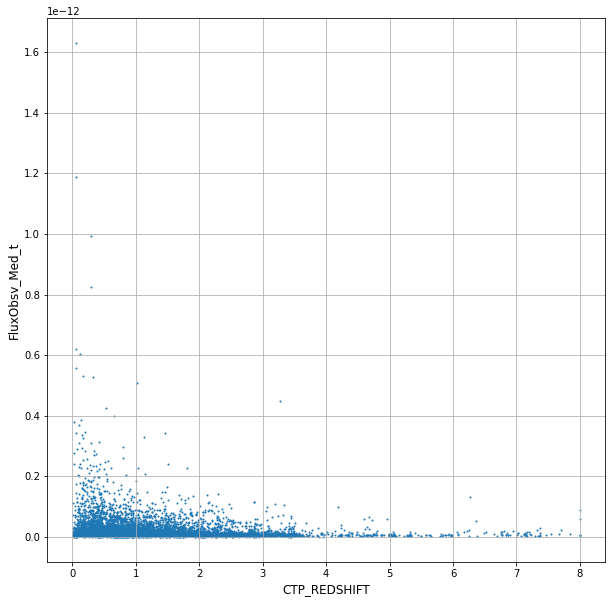

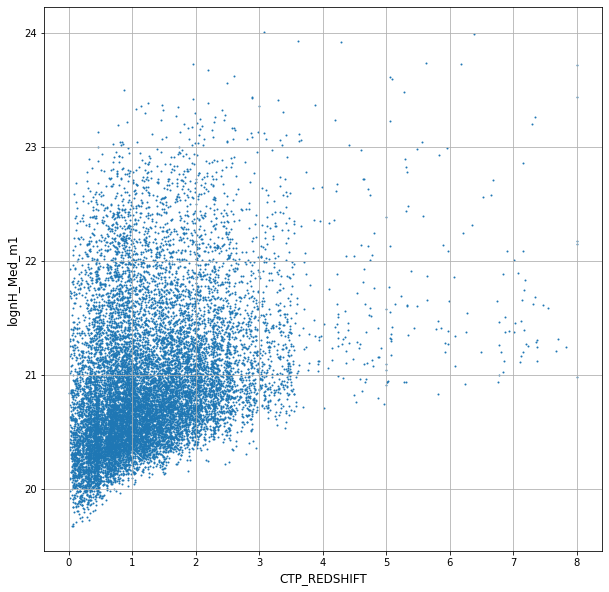

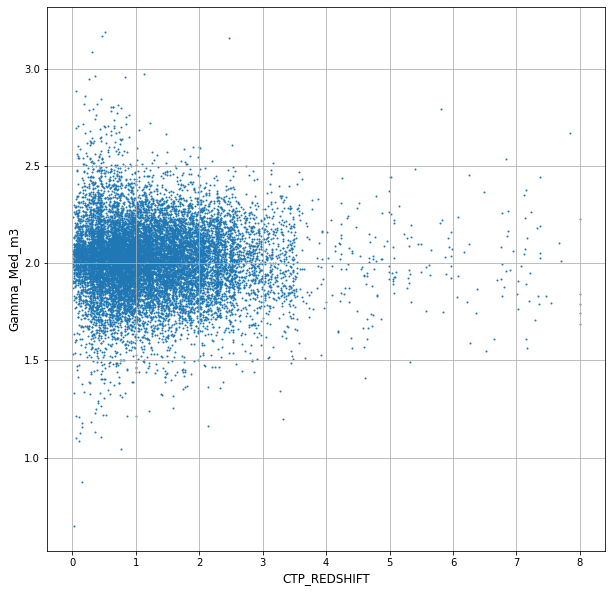

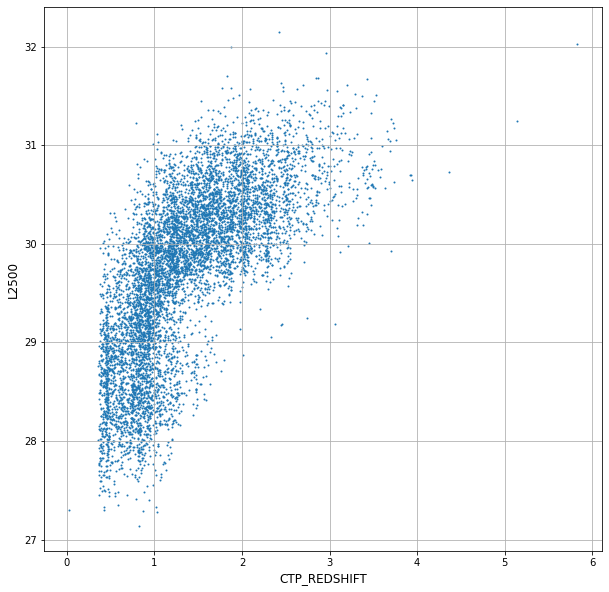

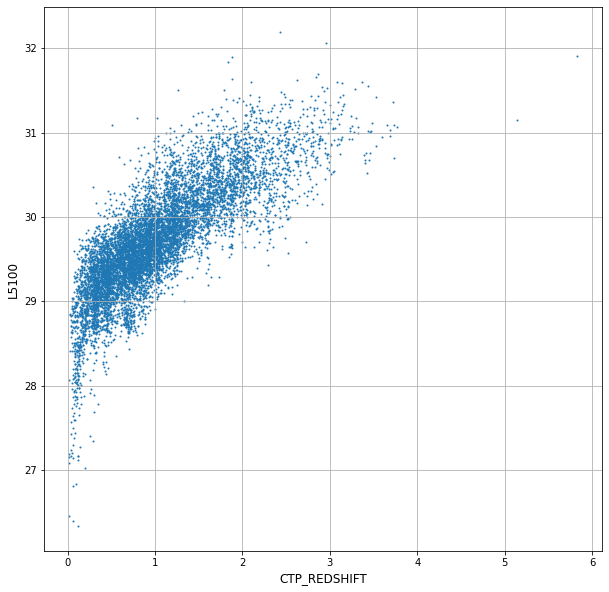

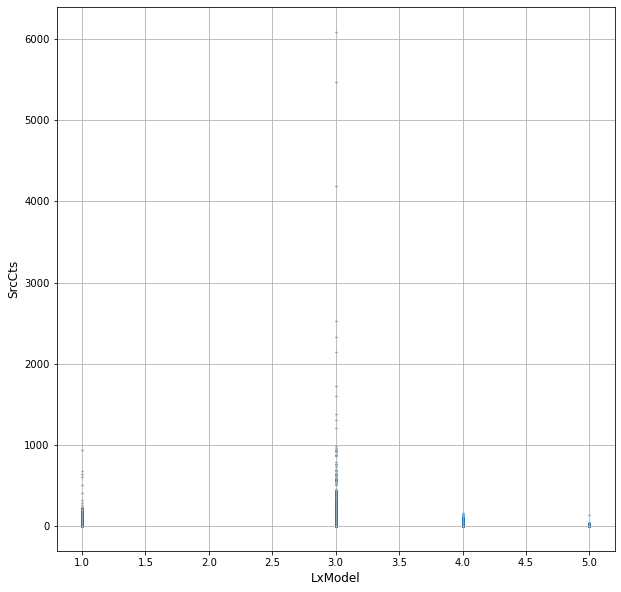

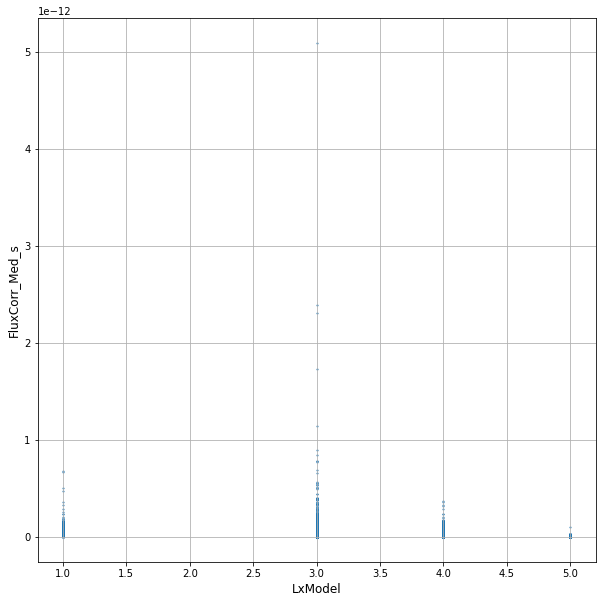

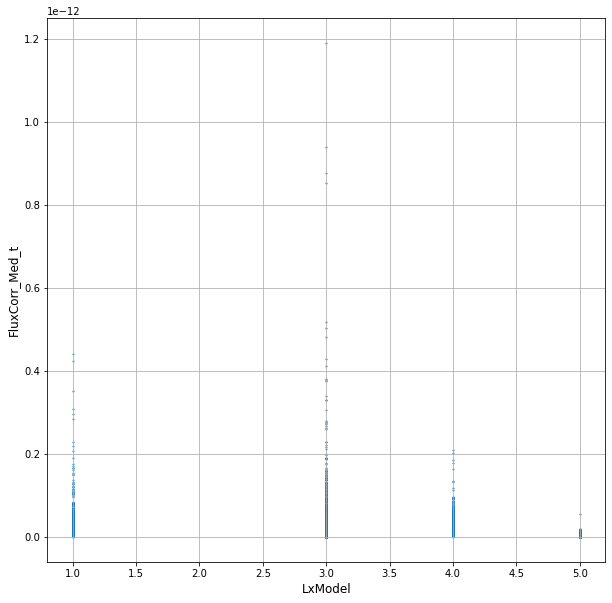

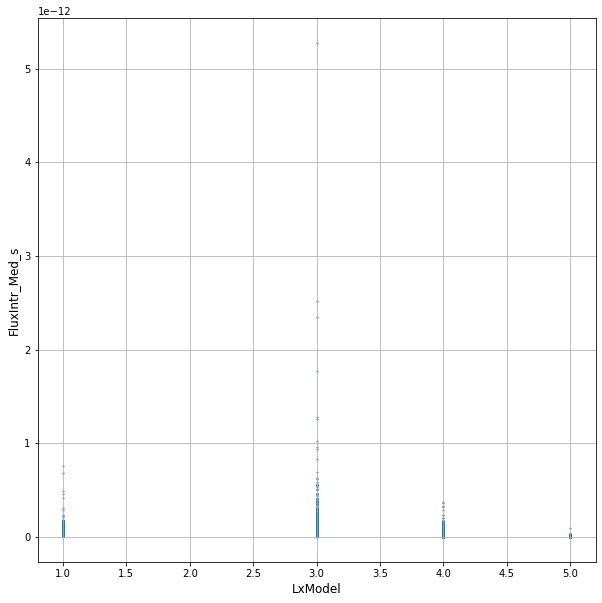

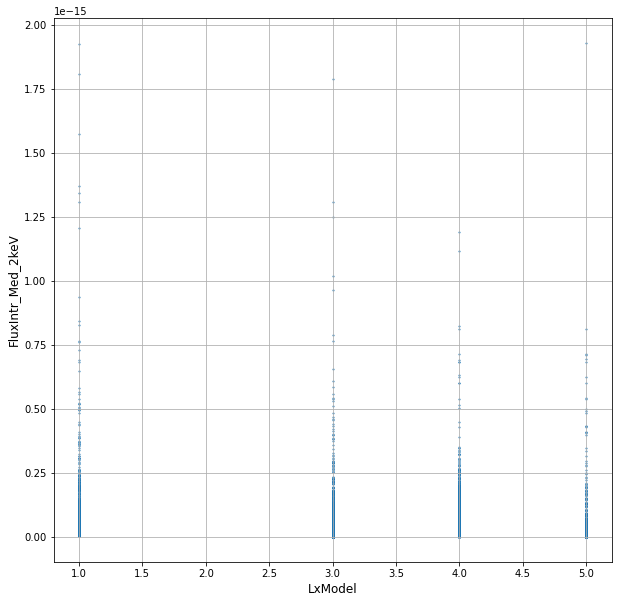

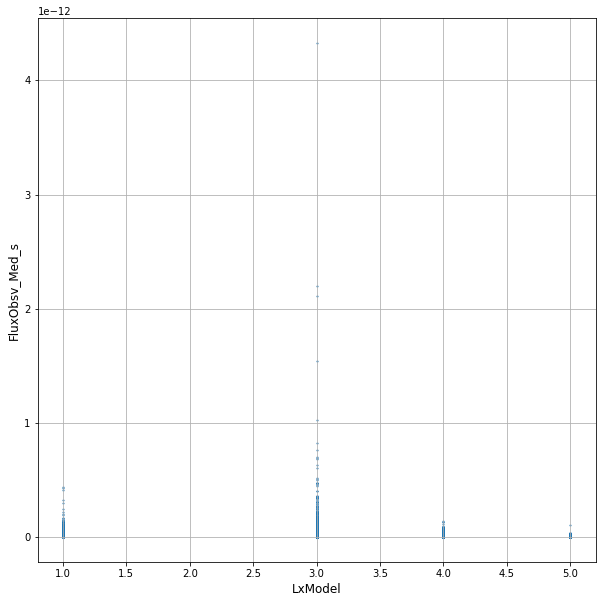

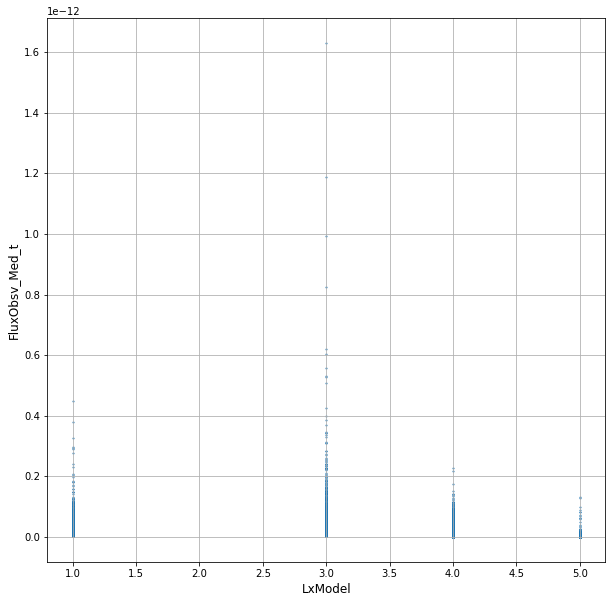

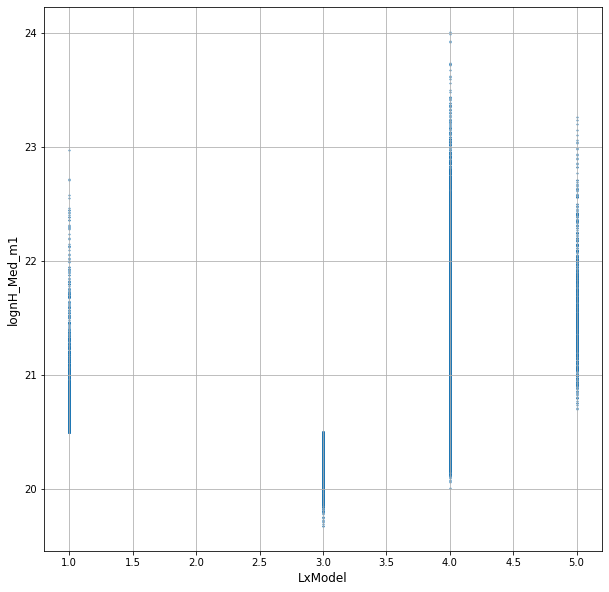

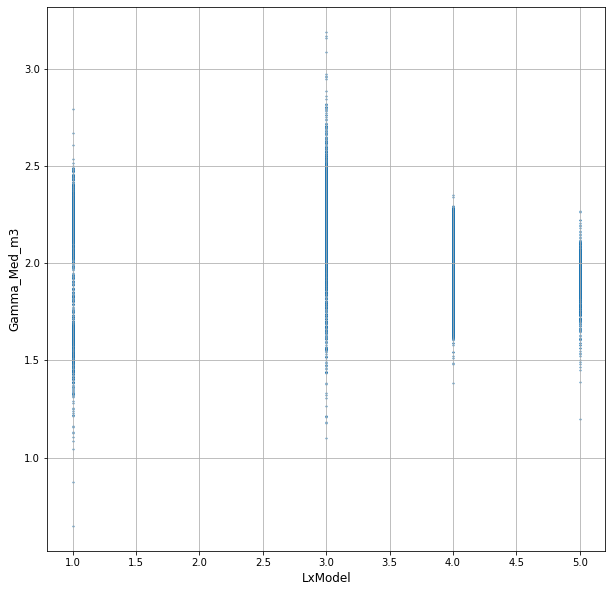

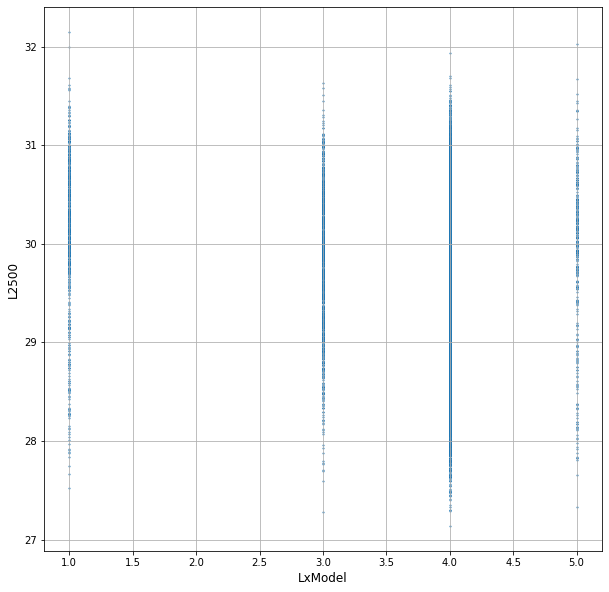

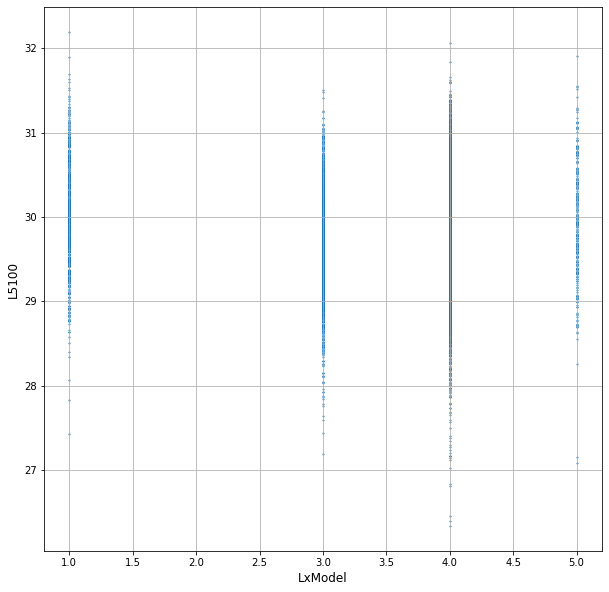

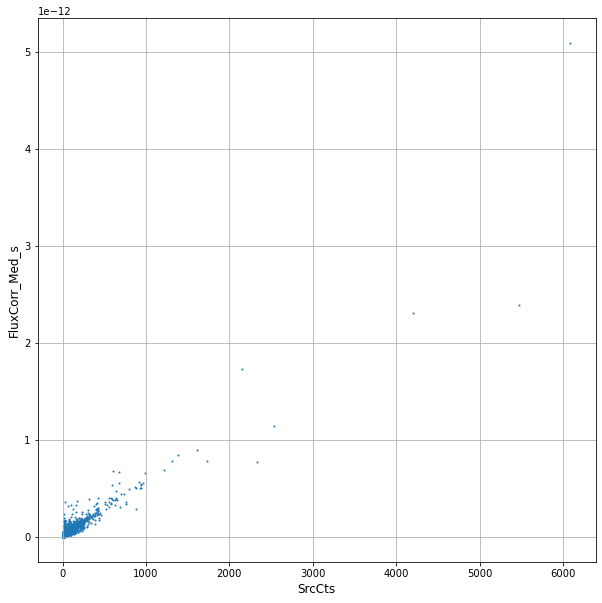

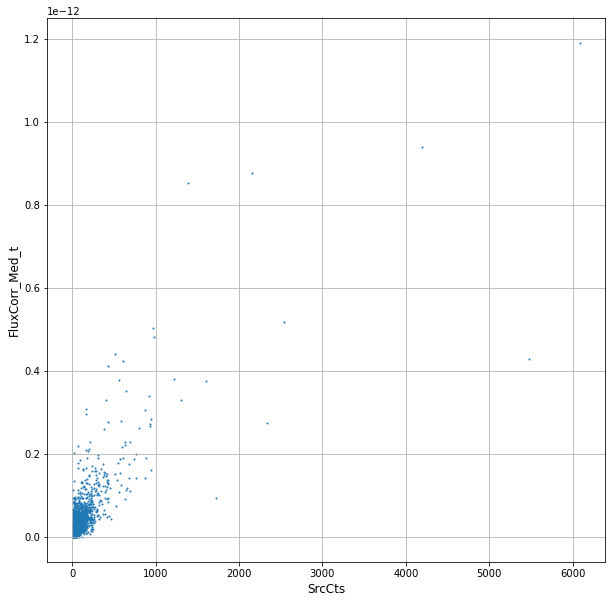

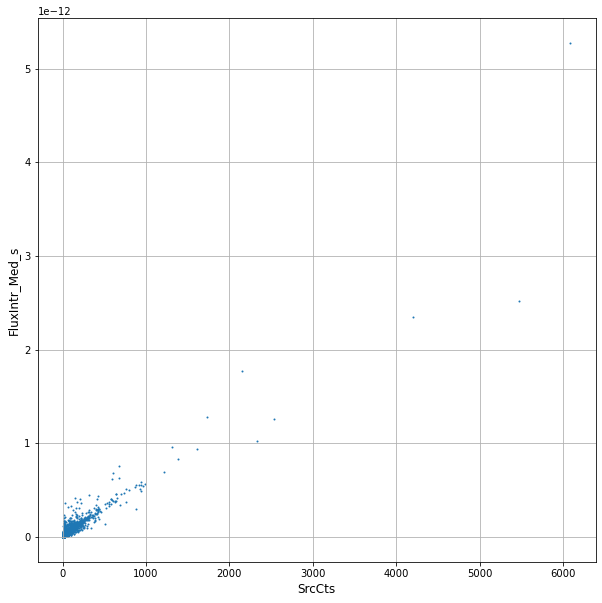

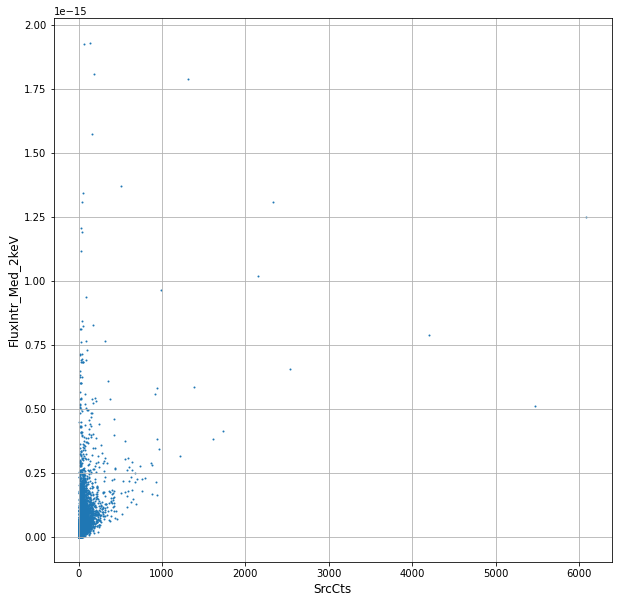

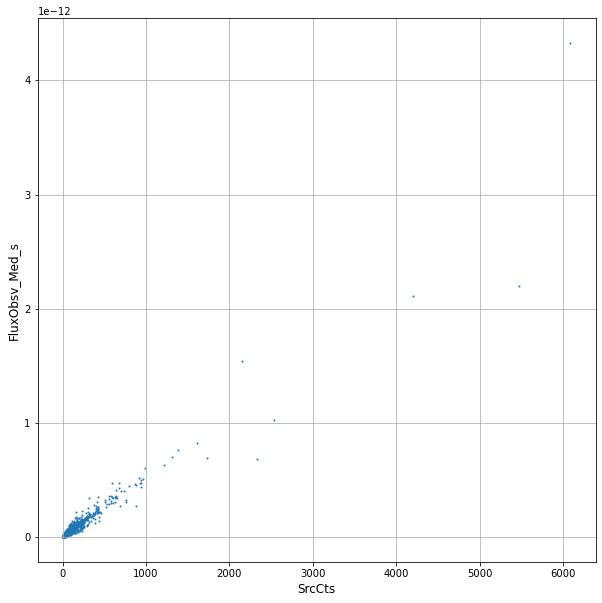

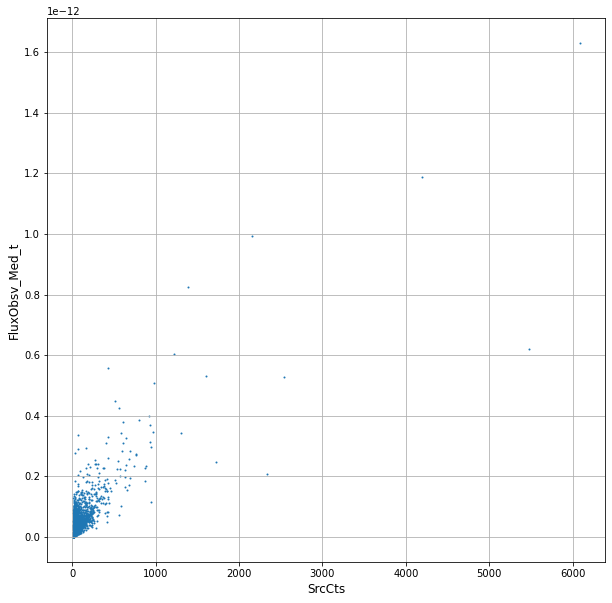

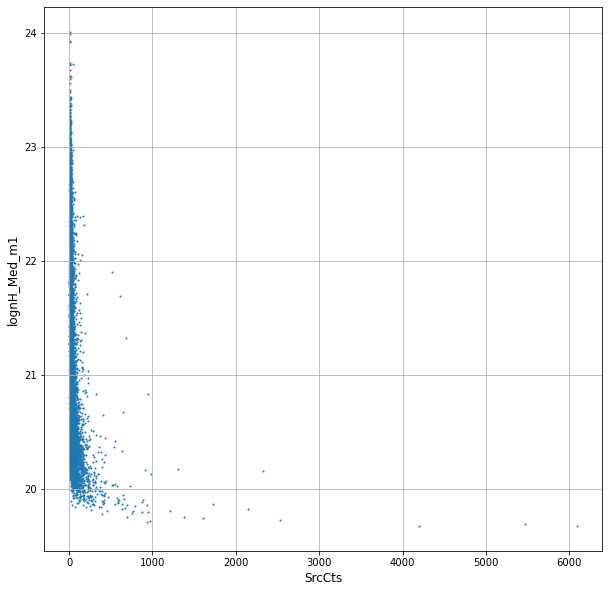

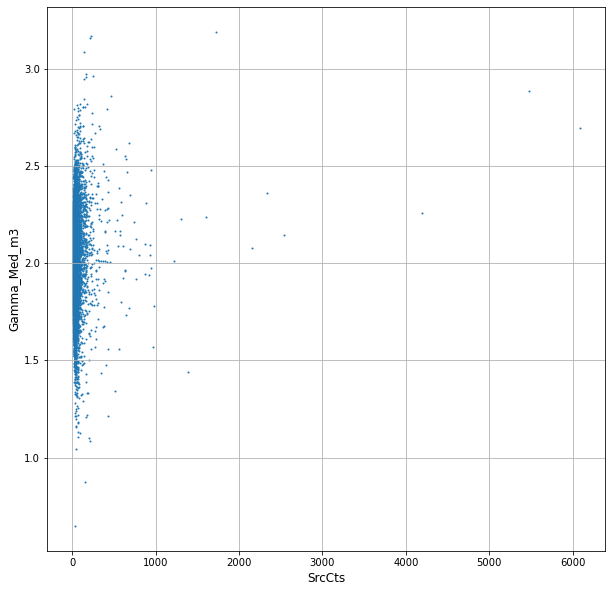

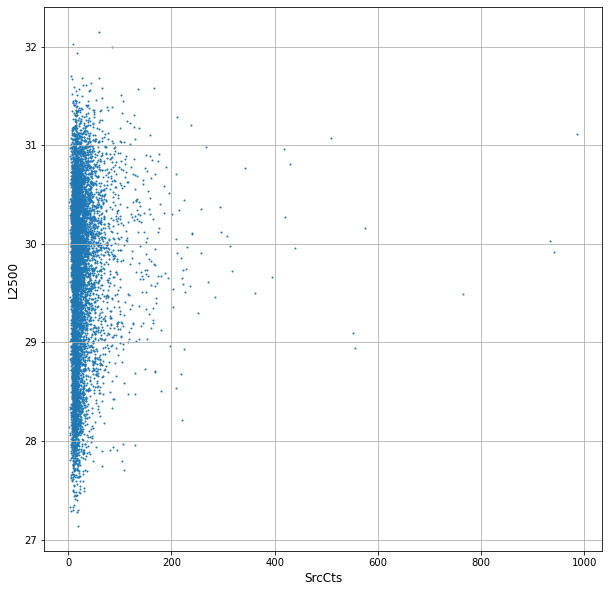

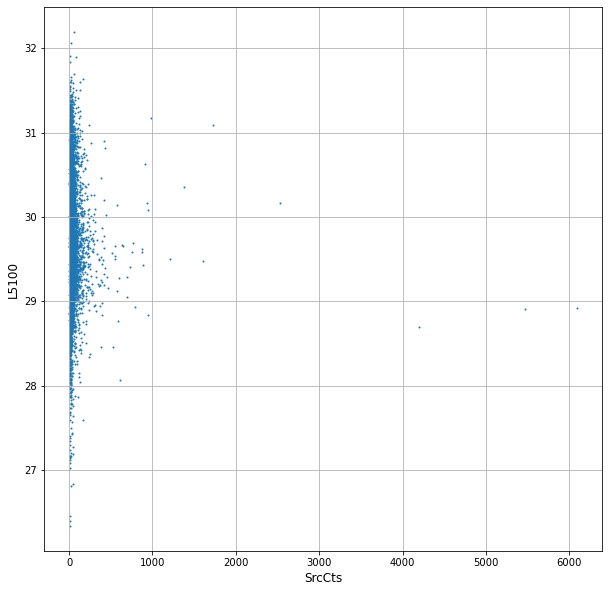

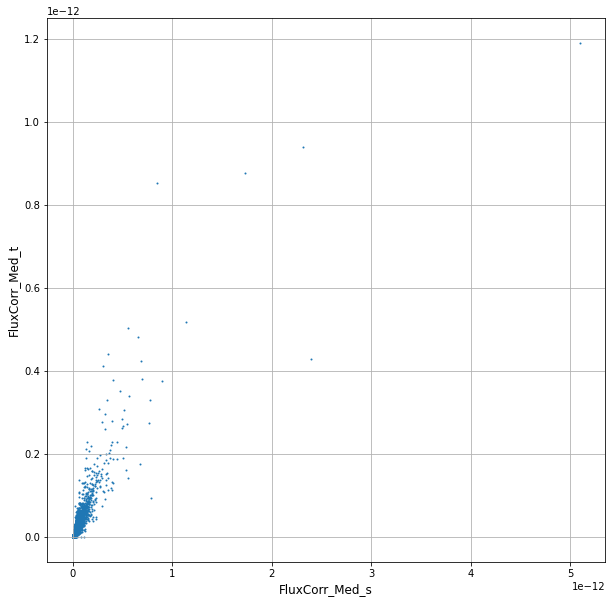

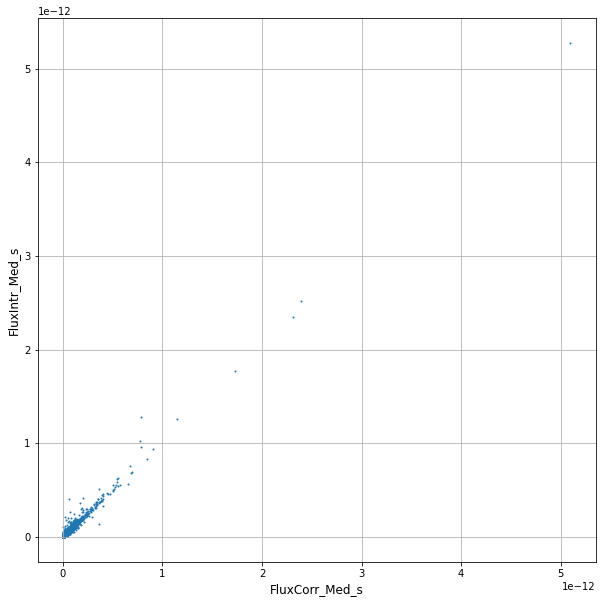

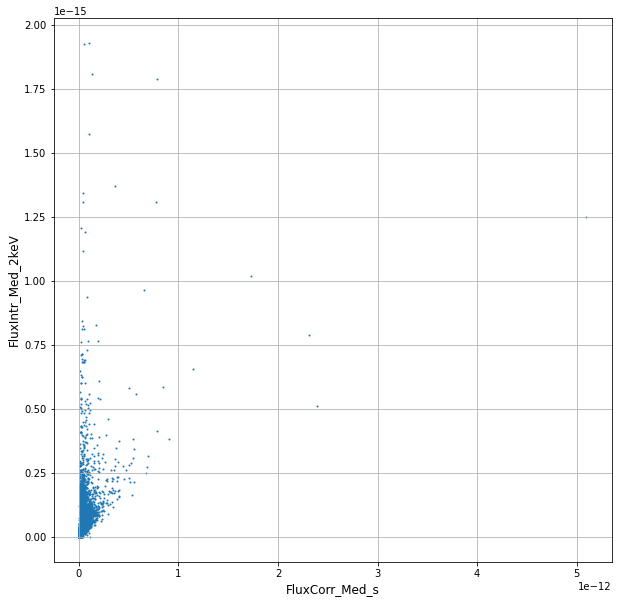

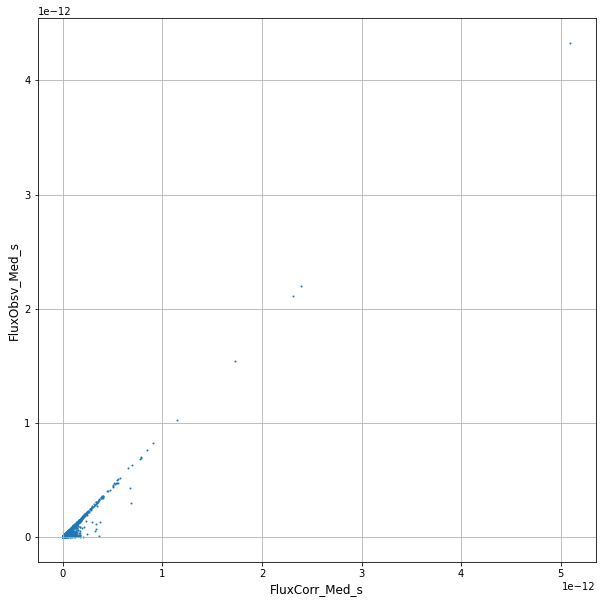

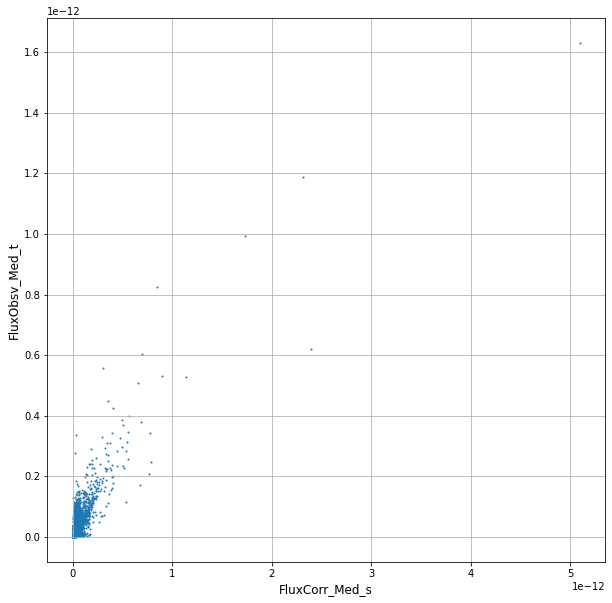

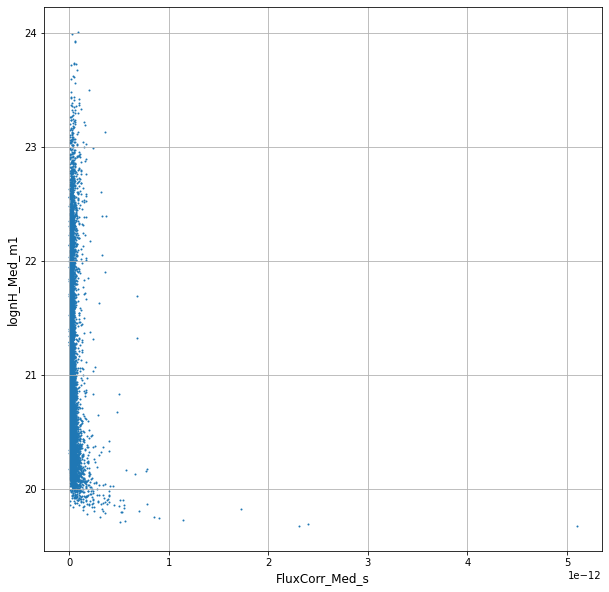

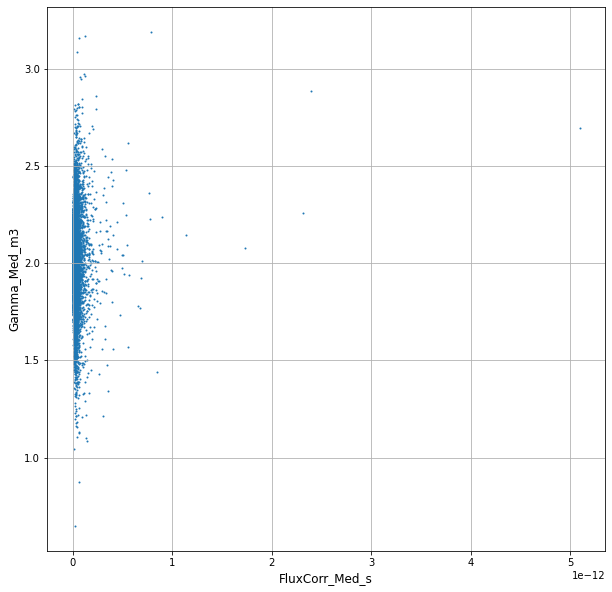

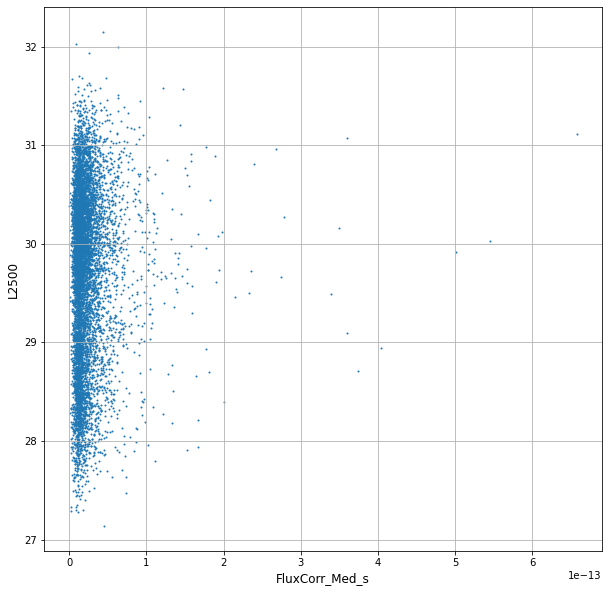

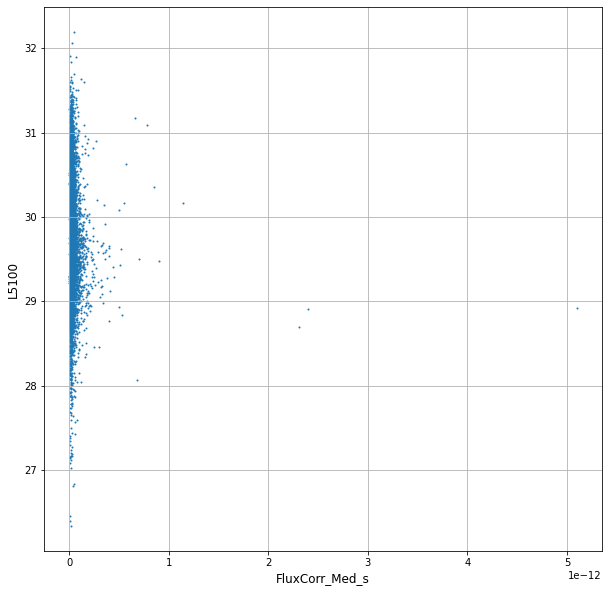

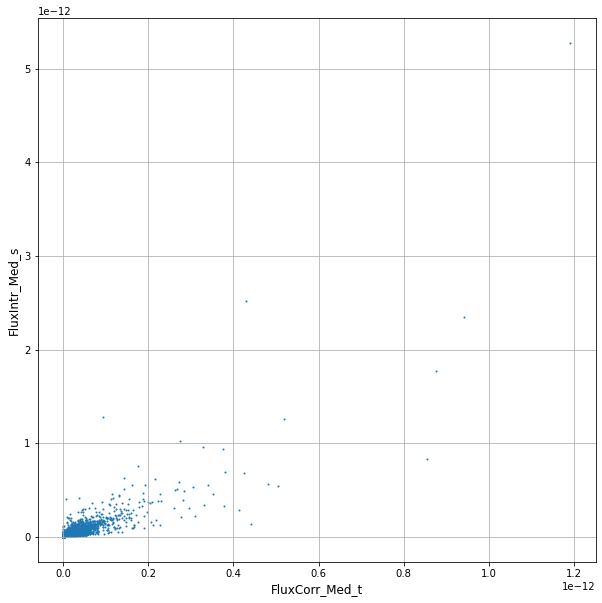

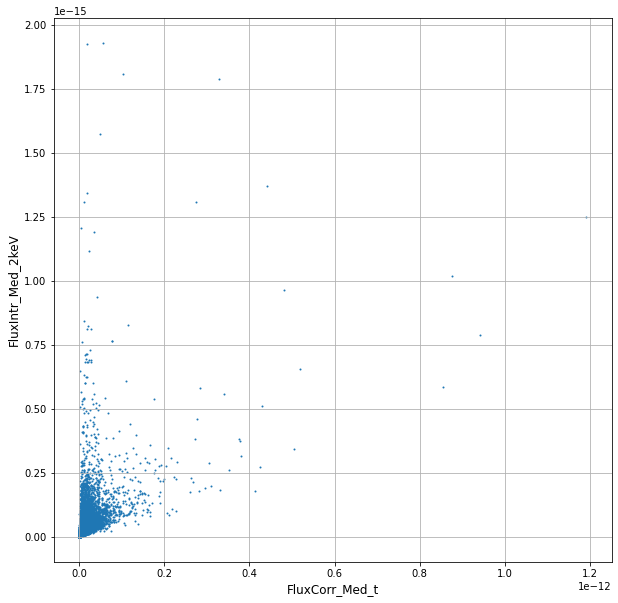

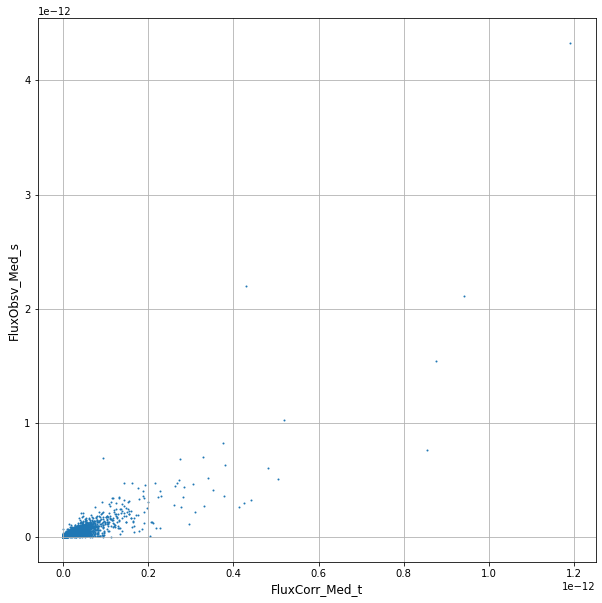

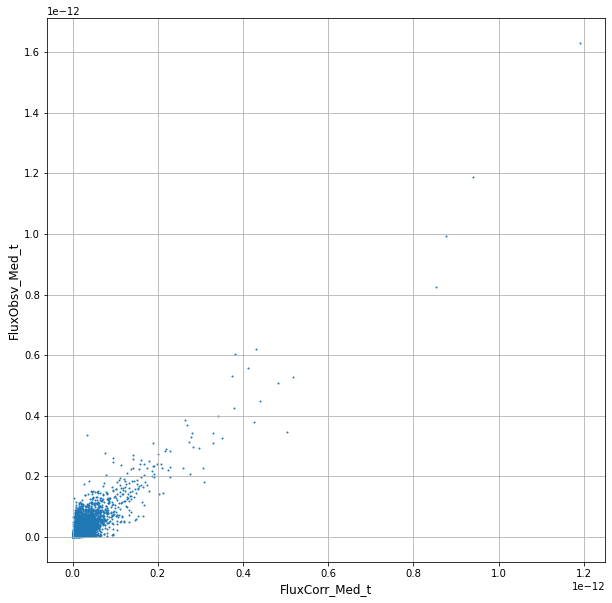

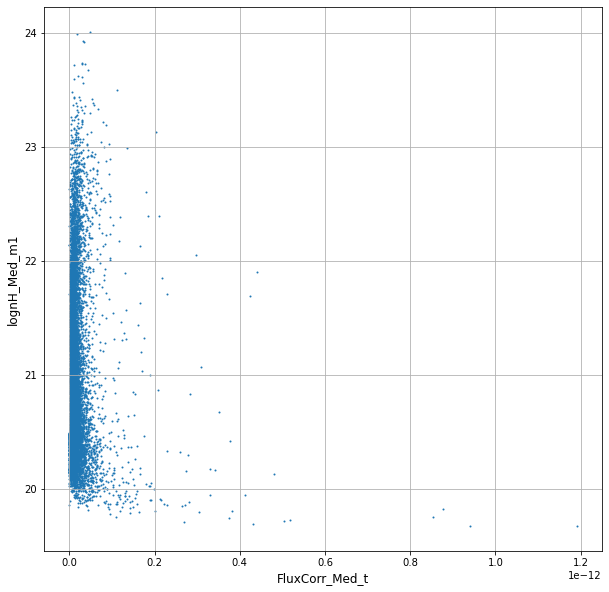

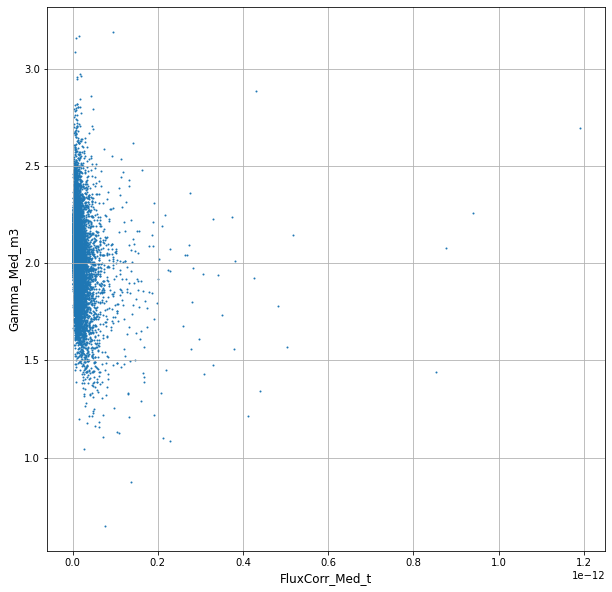

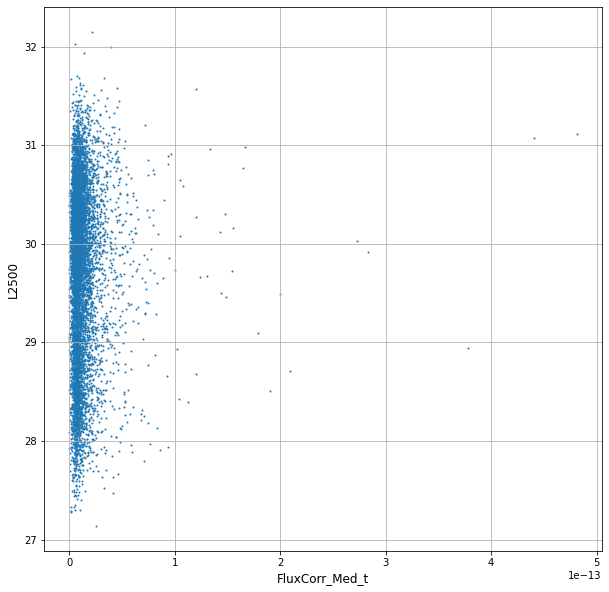

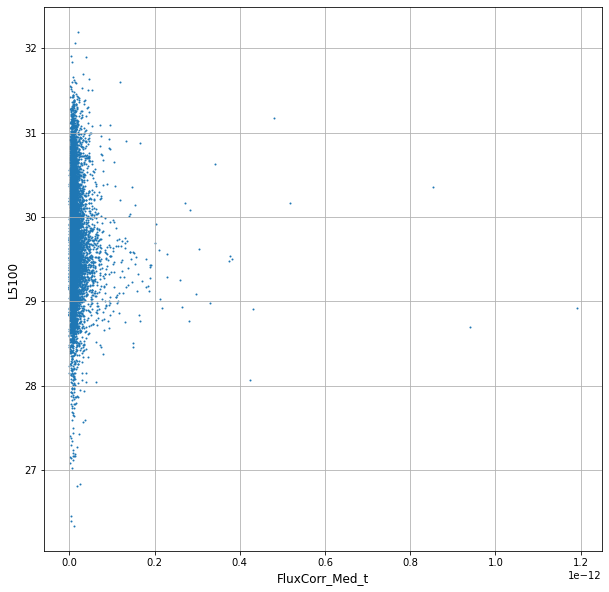

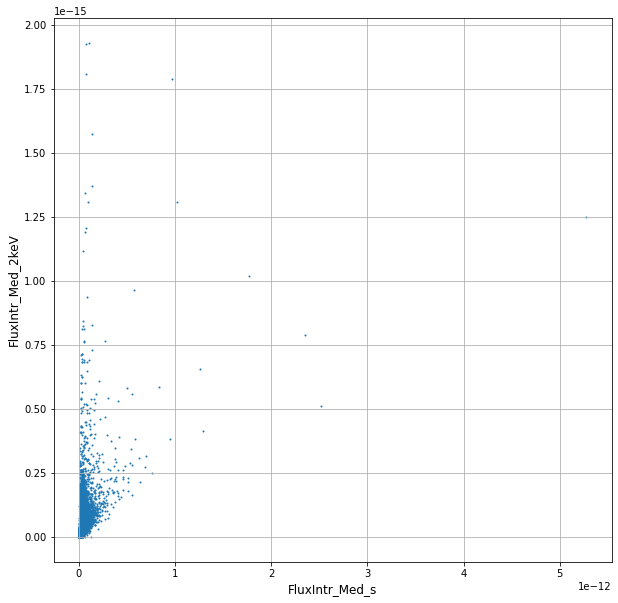

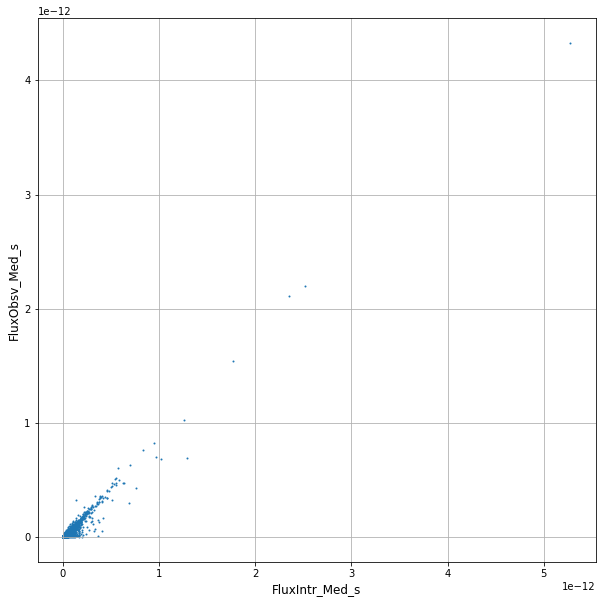

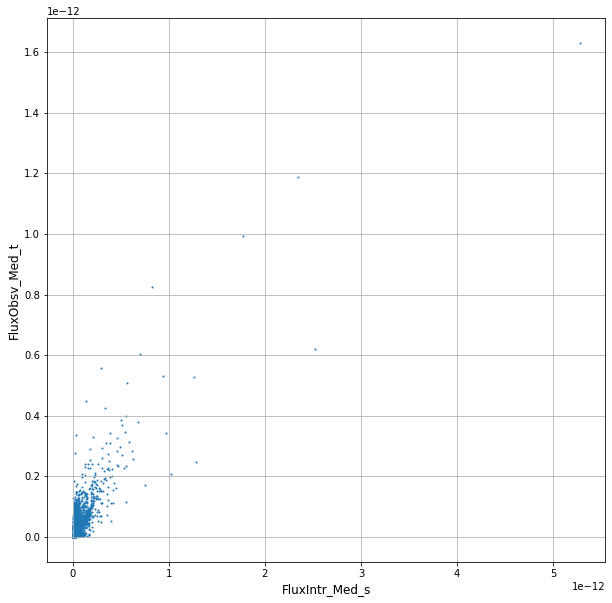

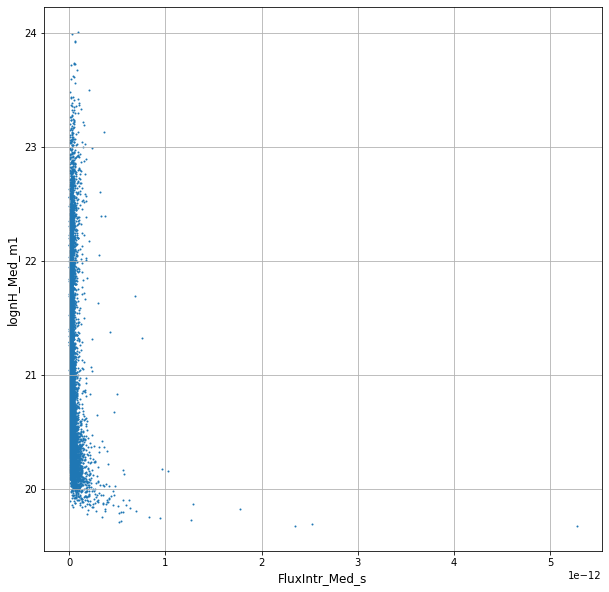

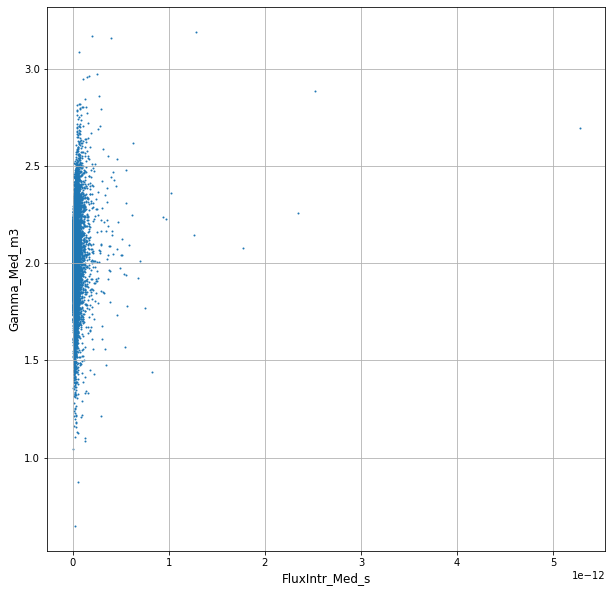

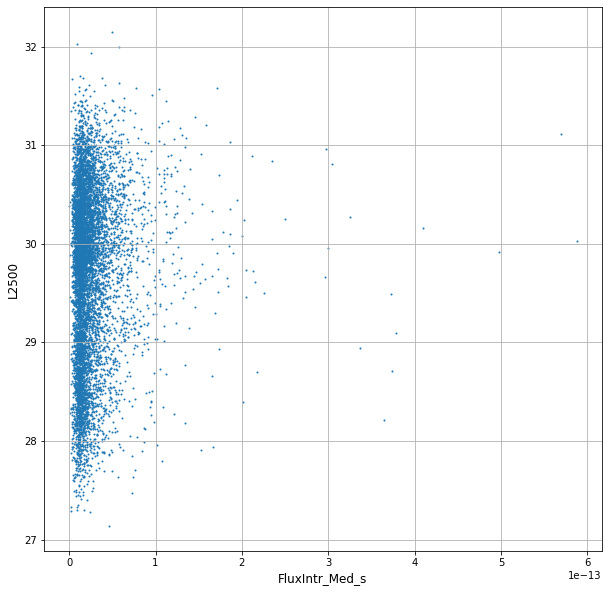

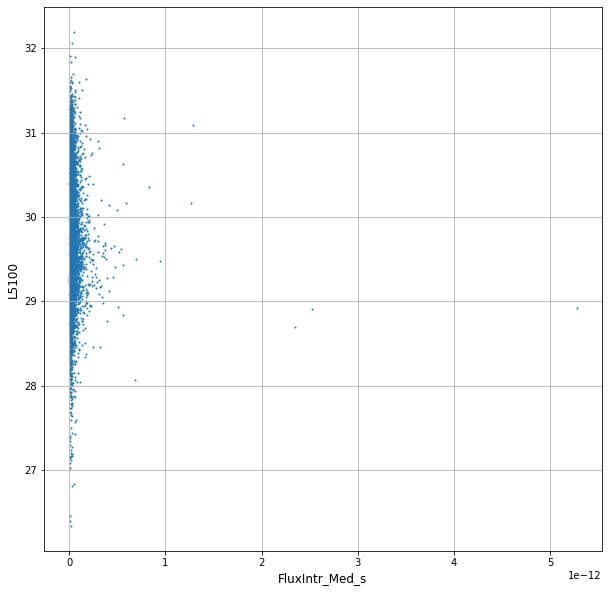

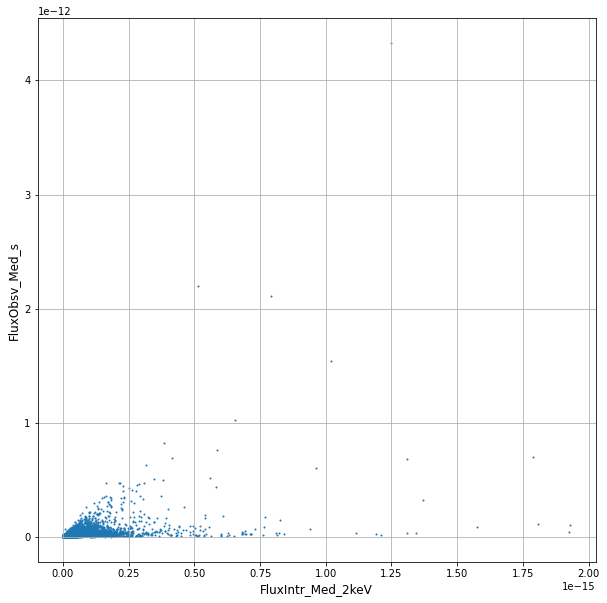

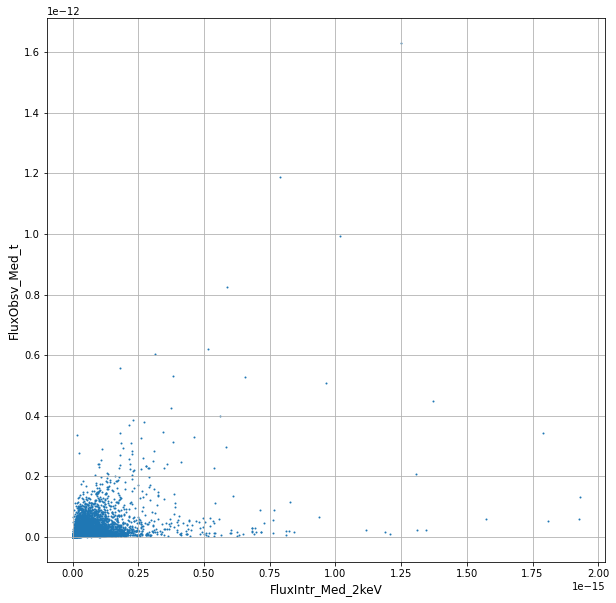

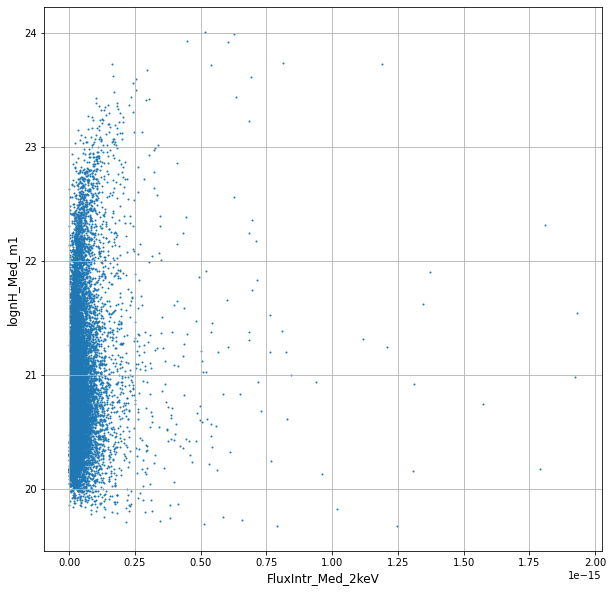

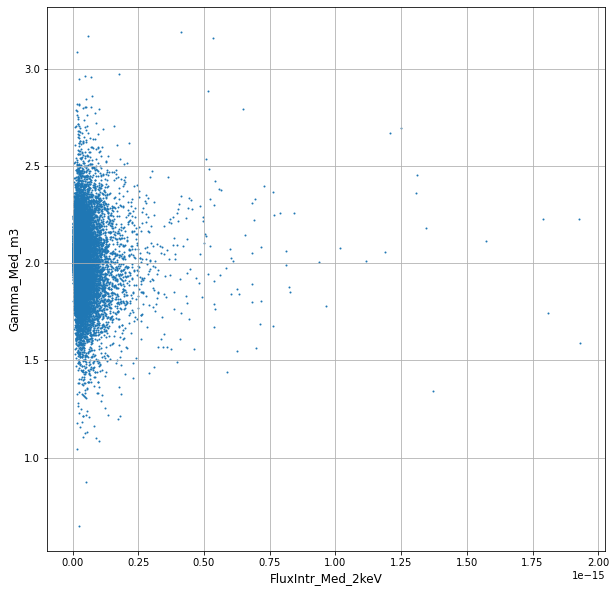

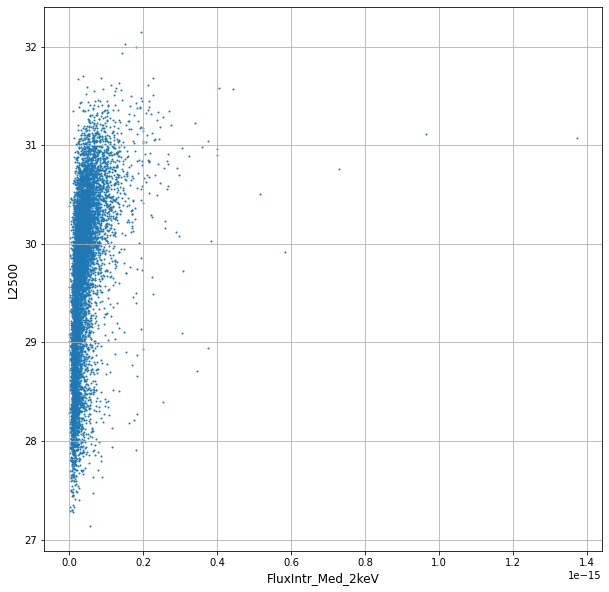

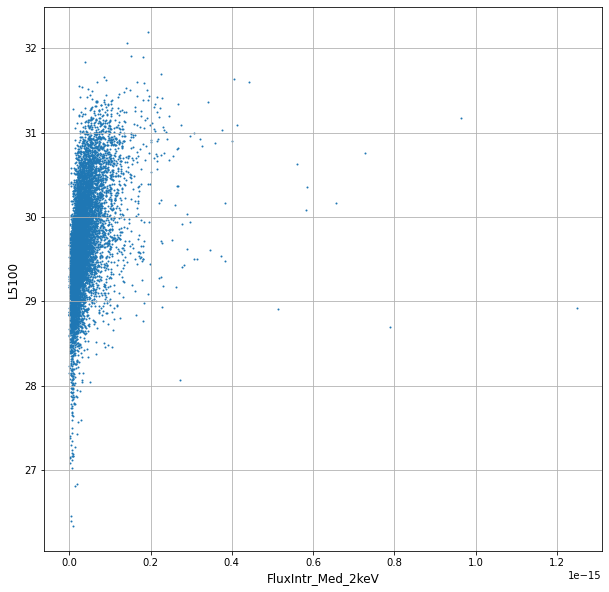

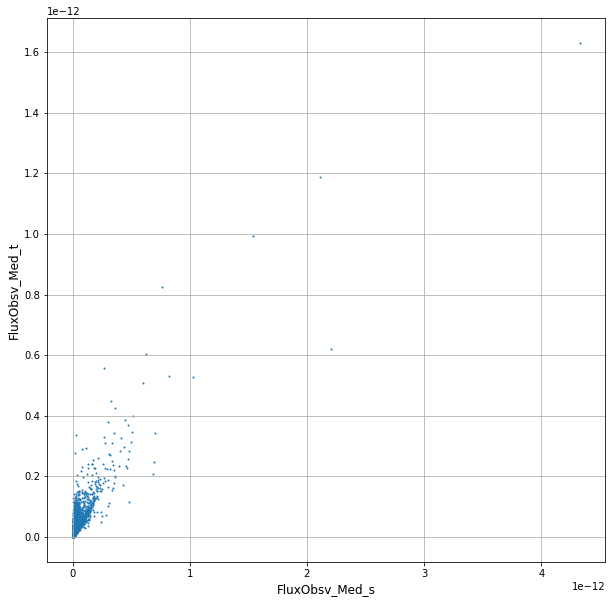

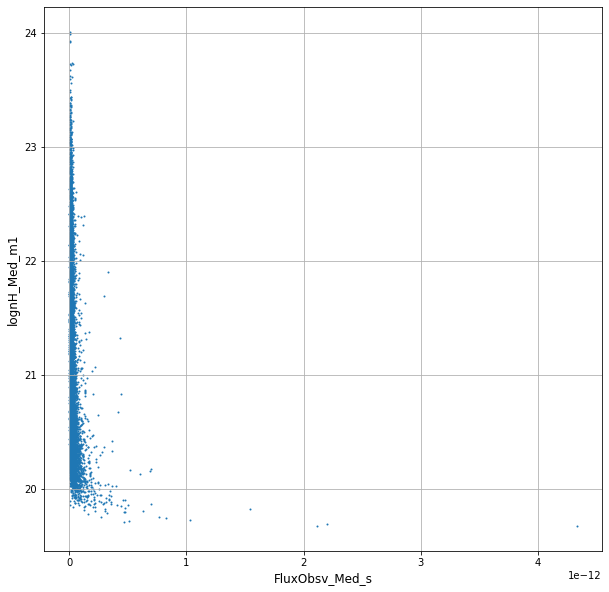

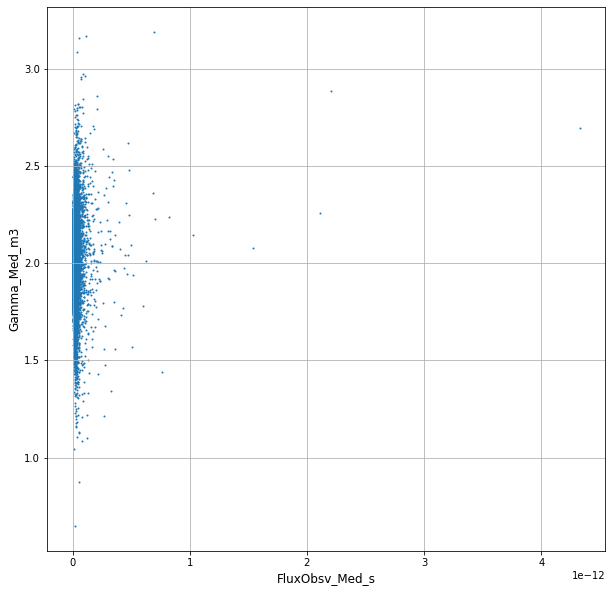

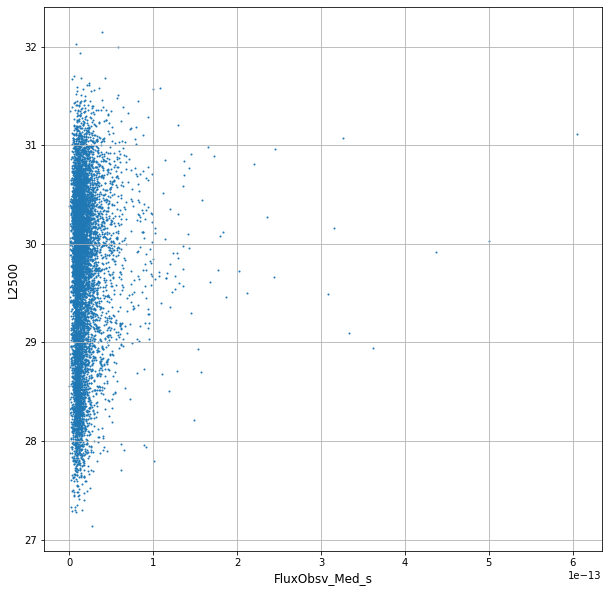

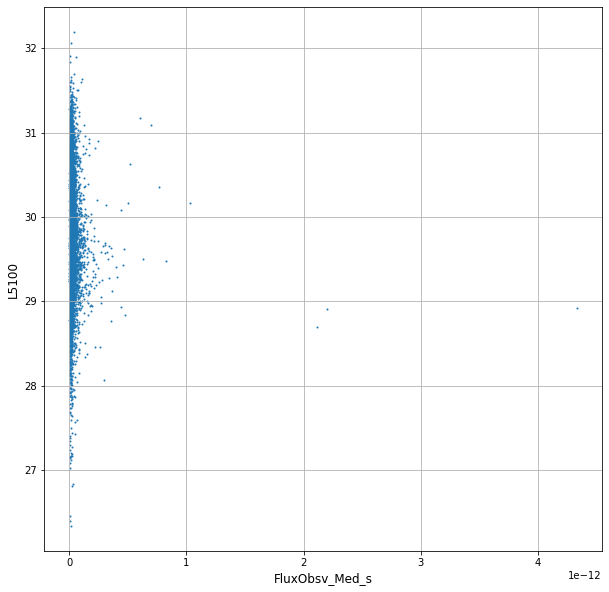

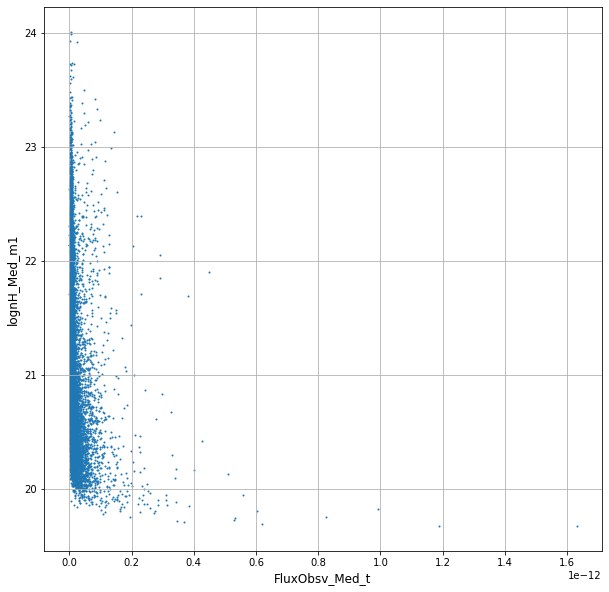

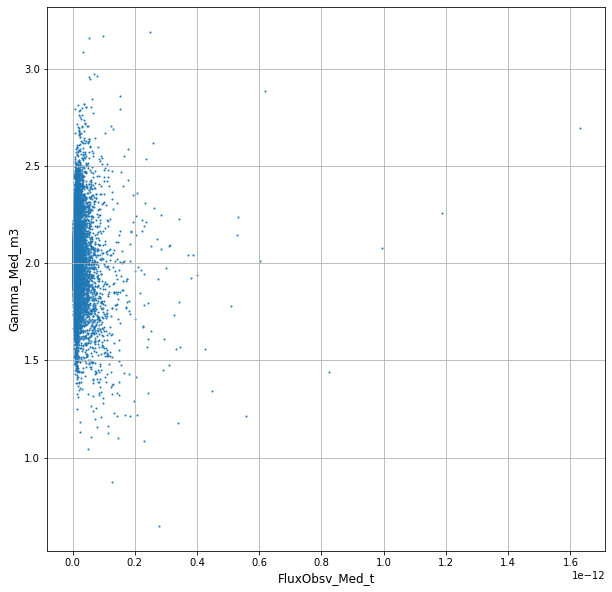

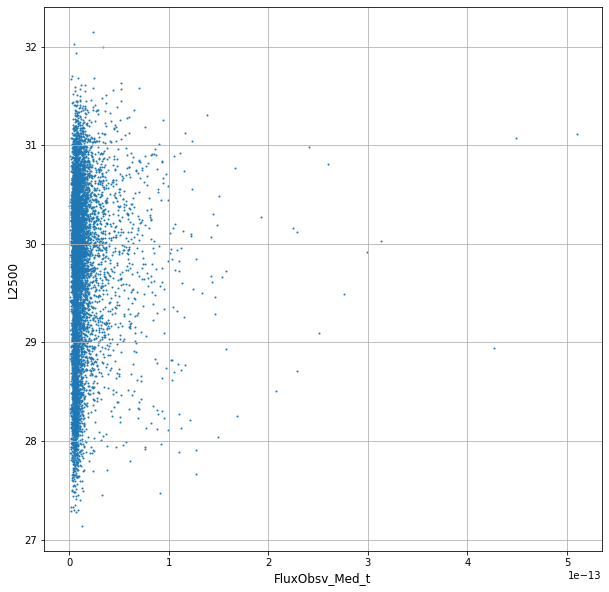

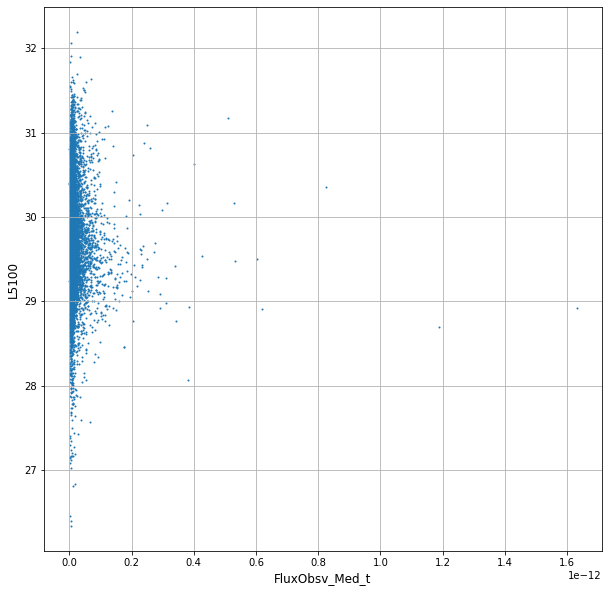

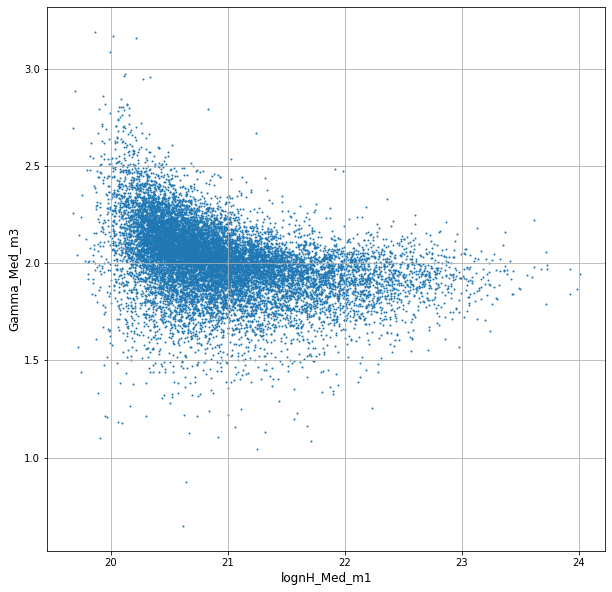

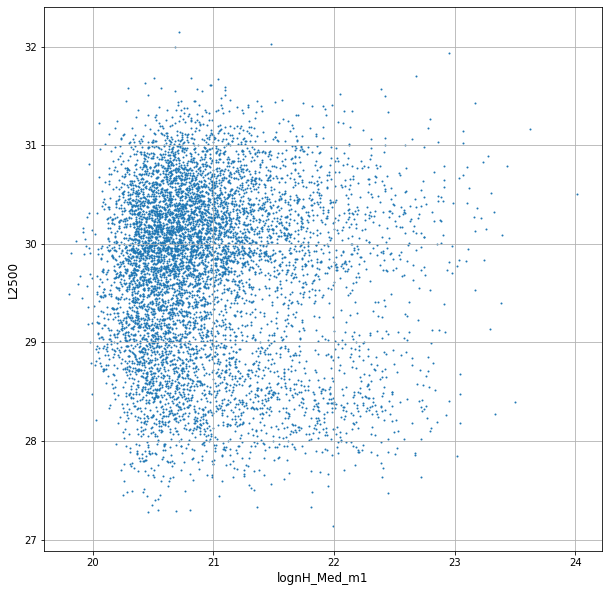

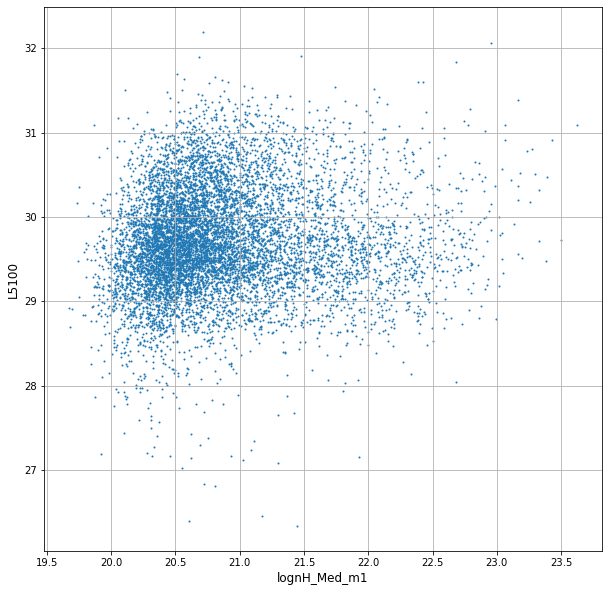

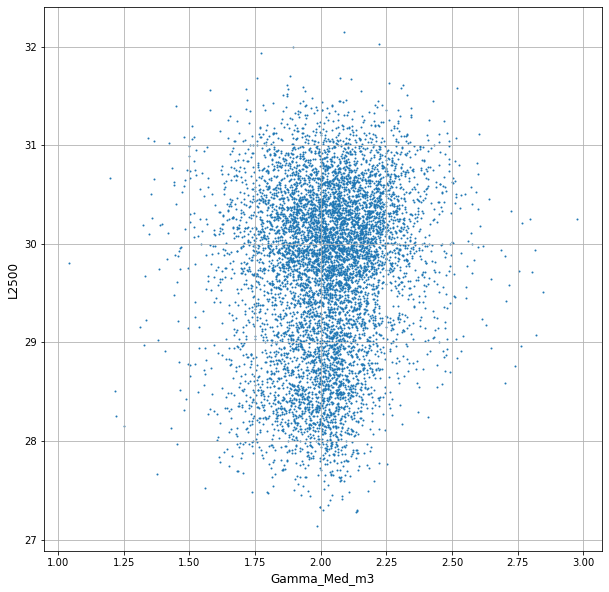

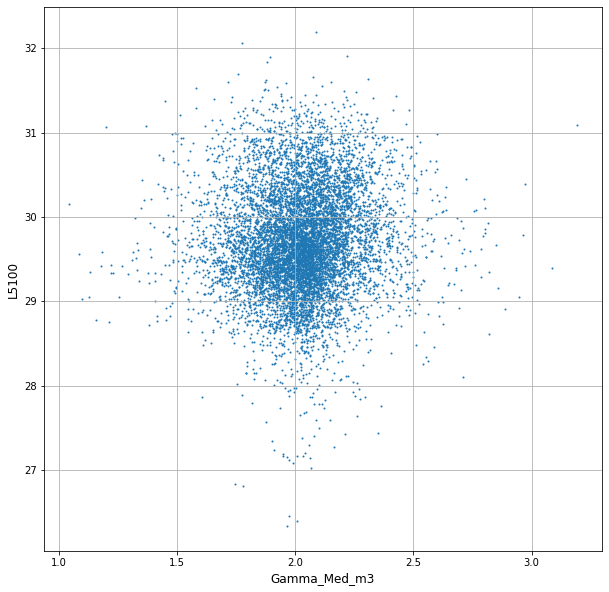

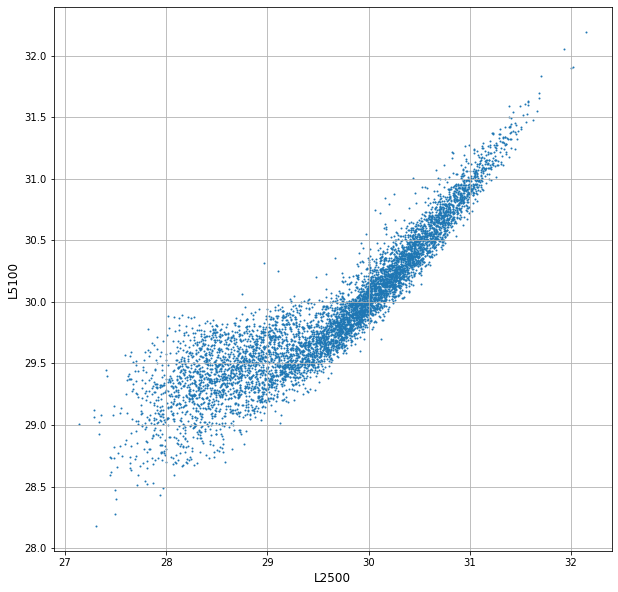

In [339]:
for i in plots_df.columns:
    b = plots_df.columns.get_loc(i)
    for j in plots_df.columns[b:]:
        if i != j:
            fig, ax = plt.subplots(1,1, figsize=(10,10))
            ax.grid()
            ax.scatter(plots_df[i][(plots_df[i]!=-99) & (plots_df[j]!=-99)], plots_df[j][(plots_df[i]!=-99) & (plots_df[j]!=-99)], s=1)
            ax.set_xlabel(i, fontsize = 12)
            ax.set_ylabel(j, fontsize = 12)
            plt.show()
            plt.close(fig)

Defining various arrays from the eROSITA dataframe for easier access:

In [10]:
l5100 = erosita_df['L5100']
l2500 = erosita_df['L2500']
log_nh = erosita_df['lognH_Med_m1']
ctp_redshift = np.round(erosita_df['CTP_REDSHIFT'],6)
ctp_redshift_grade = erosita_df['CTP_REDSHIFT_GRADE']
ctp_quality = erosita_df['CTP_quality']
ctp_class = erosita_df['CTP_CLASS']
spec_index = erosita_df['Gamma_Med_m3']
soft_lum = erosita_df['LumiIntr_Med_s']
log_nh_kl = erosita_df['lognH_KL_m1']
gal_nh = erosita_df['galNH']
l2kev = erosita_df['LumiIntr_Med_2keV']
redshift_bins = np.linspace(0.5,7.5,8)
nh_bins = np.linspace(19.5, 24.5, 6)

Plotting histogram of observed x-ray flux:

Text(0, 0.5, 'Number of sources')

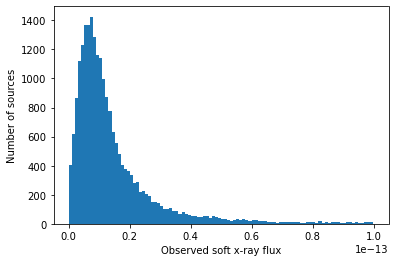

In [124]:
plt.hist(erosita_df['FluxObsv_Med_s'][erosita_df['FluxObsv_Med_s']<1e-13], bins=100);
plt.xlabel('Observed soft x-ray flux')
plt.ylabel('Number of sources')

Definfing a function that plots a straight line to be used later for curvefitting linear models with scipy:

In [125]:
def f(x, a, b):
    return a*x + b

We calculate both the mean hydrogen column density and detection fraction (fractions of sources where we can constrain optical luminosity) for binned redshifts and then plot. The first plot shows 5100 luminosity against redshift. We suspect their may be a selection effect in measuring the optical luminosity; at higher redshifts only the most luminous sources can have there luminosity constrained as the flux will be fainter, which could explain the large luminosity values at high redshifts. We then plot the average AGN hydrogen column density against binned redshift and find that at higher redshifts, the AGN show higher values of hydrogen column density. The next 2 plots show 5100 and 2500 detection rate against binned redshift respectively. The negative correlation shown in these plots may support the selection effect described for the first plot. The final 2 plots show 5100 and 2500 detection rate against binned hydrogen column density respectively. A negative correlation is expected based on the plots shown above it:

In [126]:
mean_log_nh = []
for i in range(0,8):
    if i != 7:
        pase = (ctp_redshift>=i) & (ctp_redshift<i+1)
    else:
        pase = (ctp_redshift>=i) & (ctp_redshift<=i+1)
    mean_log_nh.append(np.mean(log_nh[pase]))

In [127]:
det_frac_redshift_5100 = []
for i in range(0,8):
    if i != 7:
        pase = (ctp_redshift>=i) & (ctp_redshift<i+1)
    else:
        pase = (ctp_redshift>=i) & (ctp_redshift<=i+1)
    num = len(l5100[(pase) & (l5100!=-99)])
    den = len(l5100[pase])
    det_frac_redshift_5100.append(num/den)   

In [128]:
det_frac_redshift_2500 = []
for i in range(0,8):
    if i != 7:
        pase = (ctp_redshift>=i) & (ctp_redshift<i+1)
    else:
        pase = (ctp_redshift>=i) & (ctp_redshift<=i+1)
    num = len(l2500[(pase) & (l2500!=-99)])
    den = len(l2500[pase])
    det_frac_redshift_2500.append(num/den)   

In [129]:
det_frac_nh_5100 = []
for i in range(19,25):
    if i != 24:
        pase = (log_nh>=i) & (log_nh<i+1)
    else:
        (log_nh>=i) & (log_nh<=i+1)
    num = len(log_nh[(pase) & (l5100!=-99)])
    den = len(log_nh[pase])
    det_frac_nh_5100.append(num/den)   

In [130]:
det_frac_nh_2500 = []
for i in range(19,25):
    if i != 24:
        pase = (log_nh>=i) & (log_nh<i+1)
    else:
        (log_nh>=i) & (log_nh<=i+1)
    num = len(log_nh[(pase) & (l2500!=-99)])
    den = len(log_nh[pase])
    det_frac_nh_2500.append(num/den)

Text(0, 0.5, 'Detection fraction $\\mathrm{L_{2500}}$')

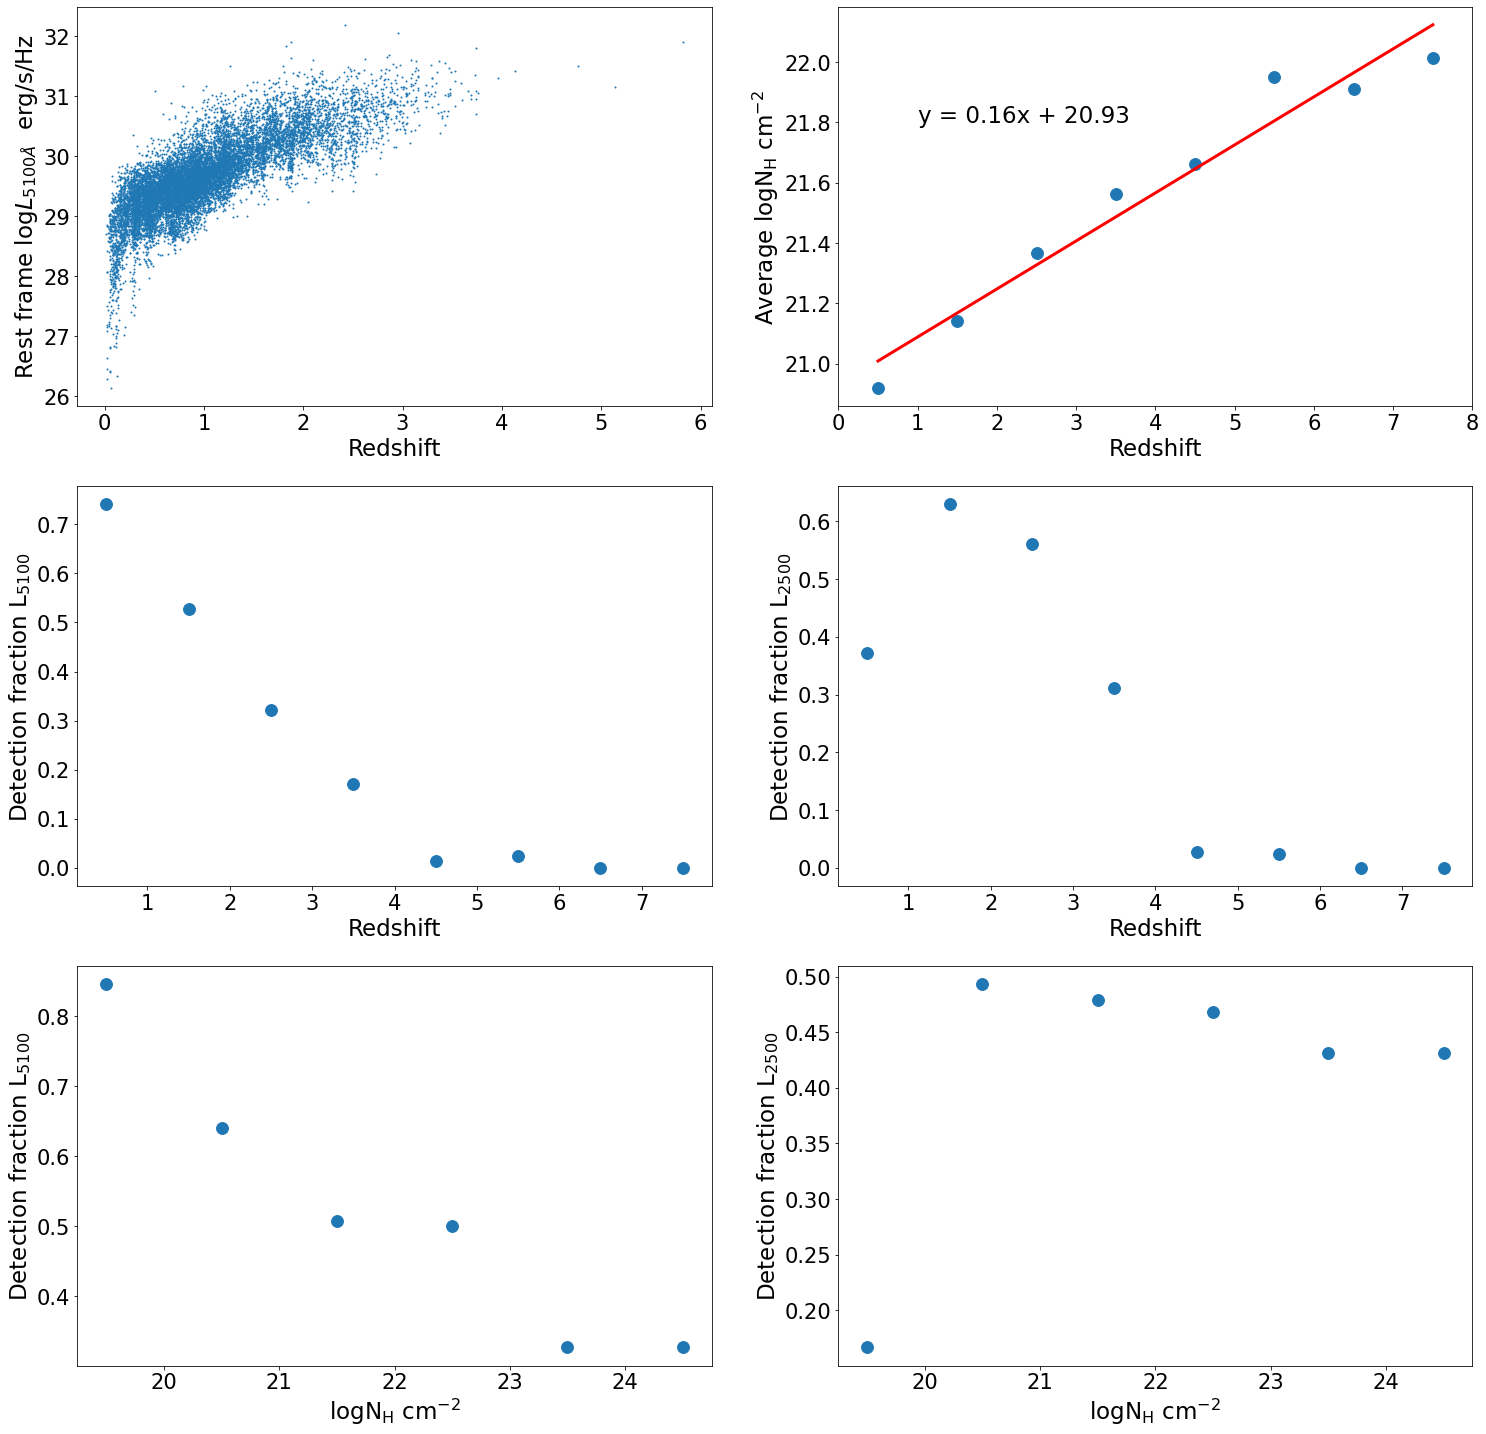

In [131]:
fig, axes = plt.subplots(3,2, figsize=(25,25))
ax = axes[0][0]
ax.scatter(ctp_redshift[l5100!=-99], l5100[l5100!=-99], s=1)
ax.tick_params(axis='both', labelsize=21)
ax.set_xlabel('Redshift', fontsize=23)
ax.set_ylabel('Rest frame log$L_{5100 \u212b}$  erg/s/Hz', fontsize=23)
ax = axes[0][1]
popt,pcov = curve_fit(f, redshift_bins, mean_log_nh, p0=(1,1))
model=f(redshift_bins, *popt)
ax.plot(redshift_bins, model, color='red', lw=3)
ax.scatter(redshift_bins, mean_log_nh, s=140)
ax.tick_params(axis='both', labelsize=21)
ax.set_xlabel('Redshift', fontsize=23)
ax.set_ylabel('Average log$\mathrm{N_{H}}$ $\mathrm{cm^{-2}}$', fontsize=23)
ax.set_xticks(np.linspace(0,8,9))
ax.text(1,21.8, f'y = {np.round(popt[0],2)}x + {np.round(popt[1],2)}', fontsize=23)
ax = axes[1][0]
ax.scatter(redshift_bins, det_frac_redshift_5100, s=140)
ax.tick_params(axis='both', labelsize=21)
ax.set_xlabel('Redshift', fontsize=23)
ax.set_ylabel('Detection fraction $\mathrm{L_{5100}}$', fontsize=23)
ax = axes[1][1]
ax.scatter(redshift_bins, det_frac_redshift_2500, s=140)
ax.tick_params(axis='both', labelsize=21)
ax.set_xlabel('Redshift', fontsize=23)
ax.set_ylabel('Detection fraction $\mathrm{L_{2500}}$', fontsize=23)
ax = axes[2][0]
ax.scatter(nh_bins, det_frac_nh_5100, s=140)
ax.tick_params(axis='both', labelsize=21)
ax.set_xlabel('log$\mathrm{N_{H}}$ $\mathrm{cm^{-2}}$', fontsize=23)
ax.set_ylabel('Detection fraction $\mathrm{L_{5100}}$', fontsize=23)
ax = axes[2][1]
ax.scatter(nh_bins, det_frac_nh_2500, s=140)
ax.tick_params(axis='both', labelsize=21)
ax.set_xlabel('log$\mathrm{N_{H}}$ $\mathrm{cm^{-2}}$', fontsize=23)
ax.set_ylabel('Detection fraction $\mathrm{L_{2500}}$', fontsize=23)

Plotting the optical/2kev x-ray luminosity fraction vs the 2kev x-ray luminosity for 5100 and 2500 respectively:

Text(0, 0.5, '$\\mathrm{logL_{2500}/logL_{2keV}}$')

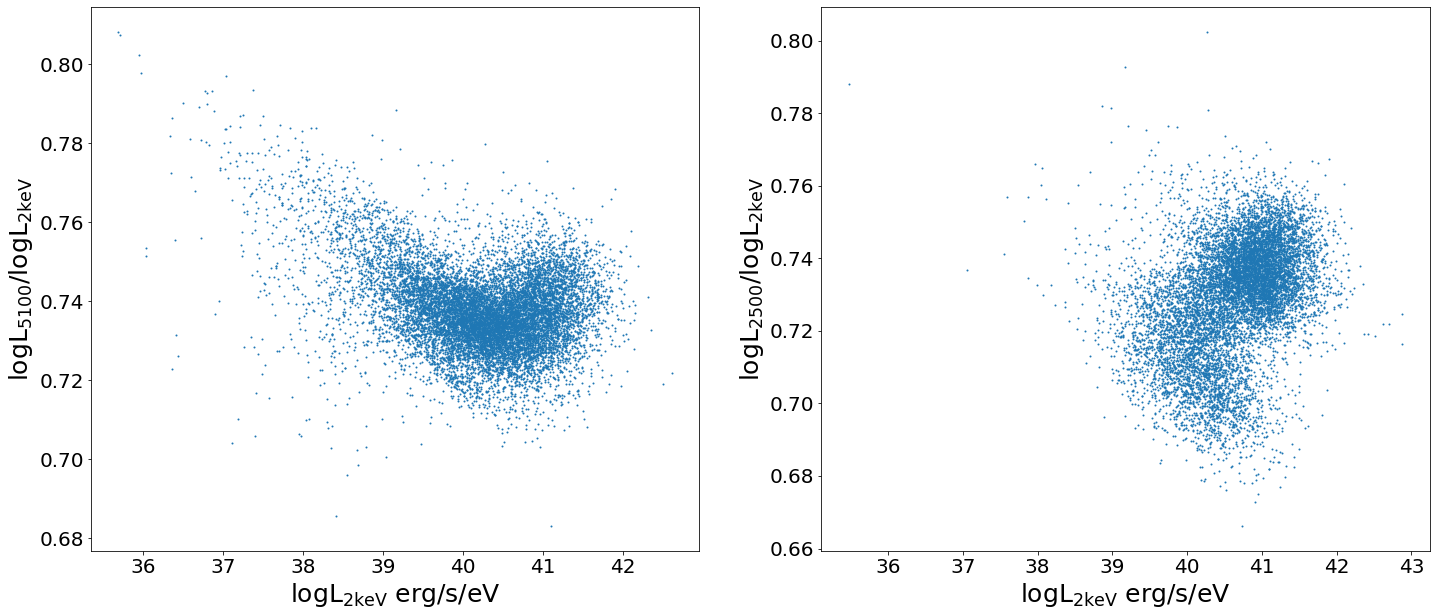

In [132]:
fig, axes = plt.subplots(1,2, figsize = (24,10))
ax = axes[0]
ax.tick_params(axis='both', labelsize=20)
ax.scatter(l2kev[l5100!=-99], l5100[l5100!=-99]/l2kev[l5100!=-99], s=1)
ax.set_xlabel('log$\mathrm{L_{2keV}}$ erg/s/eV', fontsize=25)
ax.set_ylabel('$\mathrm{logL_{5100}/logL_{2keV}}$', fontsize=25)
ax = axes[1]
ax.tick_params(axis='both', labelsize=20)
ax.scatter(l2kev[l2500!=-99], l2500[l2500!=-99]/l2kev[l2500!=-99], s=1)
ax.set_xlabel('log$\mathrm{L_{2keV}}$ erg/s/eV', fontsize=25)
ax.set_ylabel('$\mathrm{logL_{2500}/logL_{2keV}}$', fontsize=25)

We plot the log of redshift vs log of soft x-ray luminosity:

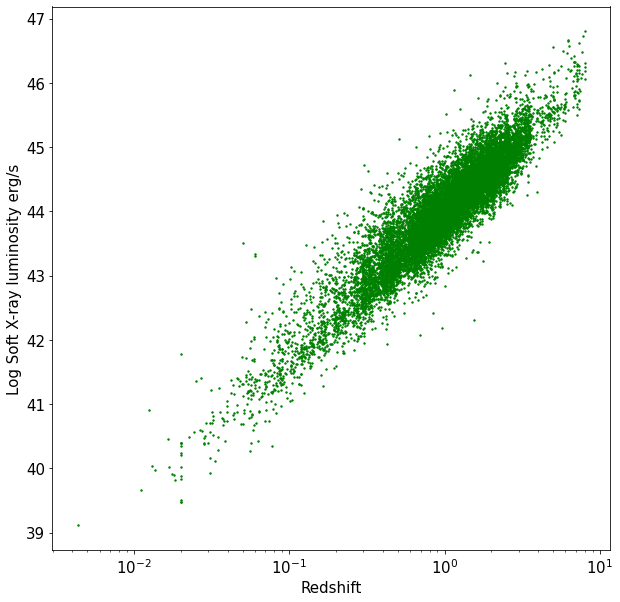

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(ctp_redshift, soft_lum, s=2, color='green')
plt.xscale('log')
plt.xlabel('Redshift', fontsize=15)
plt.ylabel('Log Soft X-ray luminosity erg/s', fontsize=15)
plt.tick_params(axis='both', labelsize=15)

Plotting various data sets, specifically a histogram representing the number of sources at various redshift bins, a histogram representing the number of sources at each discrete redshift grade, a histogram representing the number of sources at each discrete counterpart quality, and finally a histogram representing the number of sources at each discrete counterpart class:

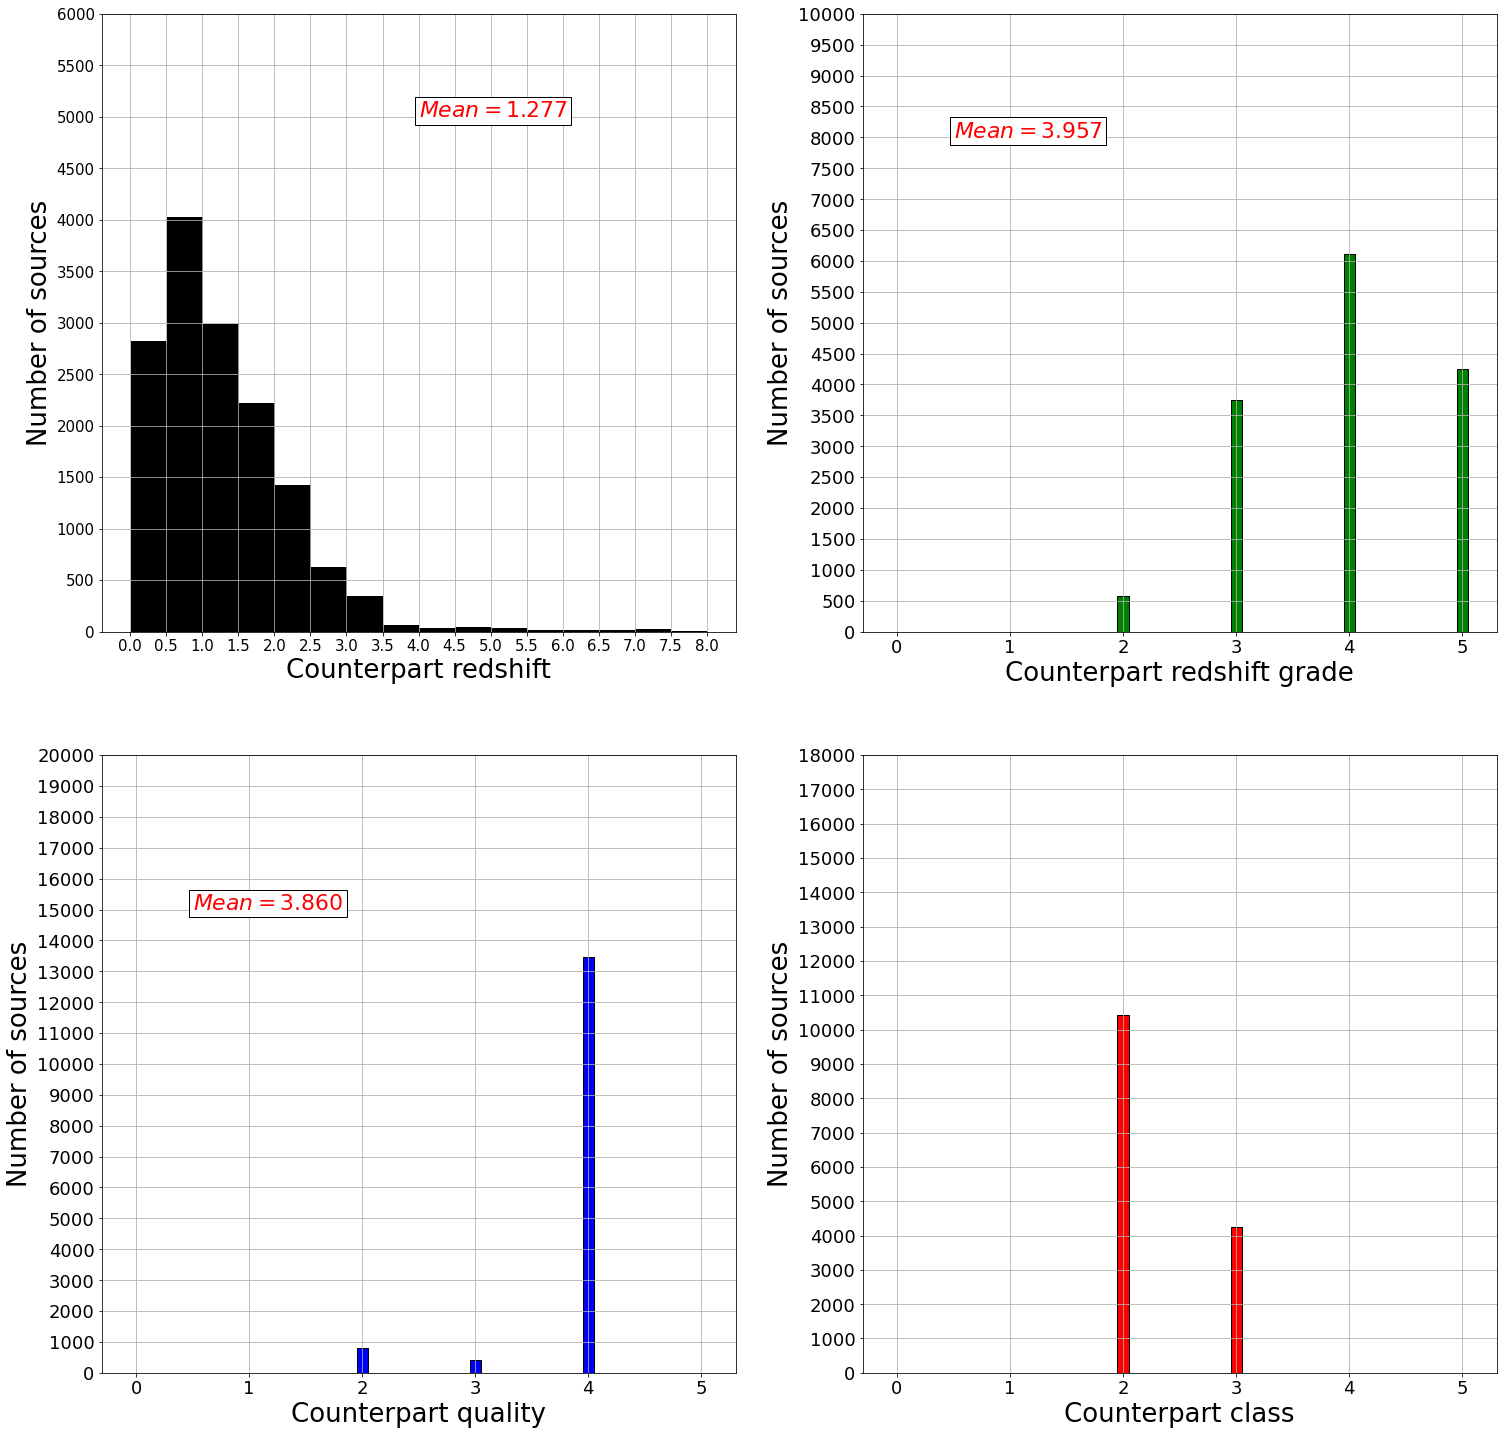

In [350]:
fig, axes = plt.subplots(2, 2, figsize = (25,25))
ax = axes[0,0]
ax.grid()
ax.hist(ctp_redshift, bins=16, color='black')
ax.tick_params(axis='both', labelsize=15)
ax.set_xlabel('Counterpart redshift', fontsize=26)
ax.set_ylabel('Number of sources', fontsize=26)
textstr1 = r'$Mean = %.3f$' % np.mean(erosita_df['CTP_REDSHIFT'])
ax.text(4, 5000, textstr1, color='red', fontsize=22, bbox=dict(facecolor='white', edgecolor='black'))
ax.set_xticks(np.linspace(0,8,17))
ax.set_yticks(np.linspace(0,6000,13))
ax=axes[0,1]
ax.grid()
ax.hist(ctp_redshift_grade, color='green', bins=np.arange(0, 7)-0.5, edgecolor='black', rwidth=0.1)
ax.set_xticks(np.linspace(0,5,6))
ax.set_xlabel('Counterpart redshift grade', fontsize=26)
ax.set_ylabel('Number of sources', fontsize=26)
ax.tick_params(axis='both', labelsize=18)
textstr2 = r'$Mean = %.3f$' % np.mean(erosita_df['CTP_REDSHIFT_GRADE'])
ax.text(0.5, 8000, textstr2, color='red', fontsize=22, bbox=dict(facecolor='white', edgecolor='black'))
ax.set_yticks(np.linspace(0,10000,21))
ax=axes[1,0]
ax.grid()
ax.hist(ctp_quality, color='blue', bins=np.arange(0, 7)-0.5, edgecolor='black', rwidth=0.1)
ax.set_xlabel('Counterpart quality', fontsize=26)
ax.set_ylabel('Number of sources', fontsize=26)
ax.tick_params(axis='both', labelsize=18)
textstr3 = r'$Mean = %.3f$' % np.mean(erosita_df['CTP_quality'])
ax.text(0.5, 15000, textstr3, color='red', fontsize=22, bbox=dict(facecolor='white', edgecolor='black'))
ax.set_yticks(np.linspace(0,20000,21))
ax=axes[1,1]
ax.grid()
ax.hist(ctp_class, color='red', bins=np.arange(0, 7)-0.5, edgecolor='black', rwidth=0.1)
ax.set_xlabel('Counterpart class', fontsize=26)
ax.set_ylabel('Number of sources', fontsize=26)
ax.tick_params(axis='both', labelsize=18)
ax.set_yticks(np.linspace(0,18000,19));

Creating a list containing the mean of the counterpart redshift grades at redshift bins ranging from 0-8 with a bin length of 1:

In [351]:
mean_ctp_redshift_grade = []
for i in range(0,8):
    if i != 7:
        pase = (ctp_redshift>=i) & (ctp_redshift<i+1)
    else:
        pase = (ctp_redshift>=i) & (ctp_redshift<=i+1)
    mean_ctp_redshift_grade.append(np.mean(ctp_redshift_grade[pase]))

Plotting the mean counterpart redshift grade for the various redshift bins and using curvefit to plot a line of best fit, demonstrating a clear anti-correlation:

Text(4.5, 4, 'y = -0.34x + 4.4')

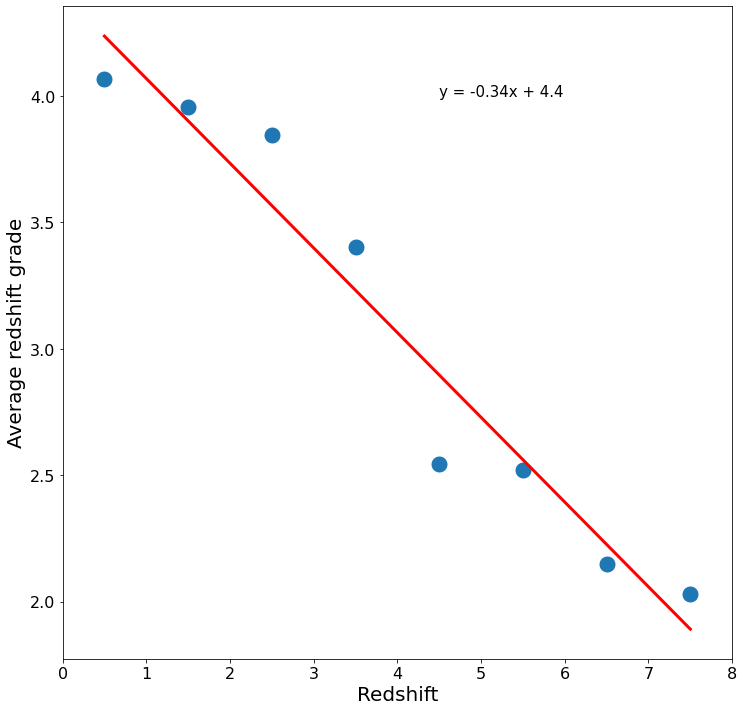

In [352]:
plt.figure(figsize=(12,12))
popt,pcov = curve_fit(f, redshift_bins, mean_ctp_redshift_grade, p0=(1,1))
model=f(redshift_bins, *popt)
plt.plot(redshift_bins, model, color='red', lw=3)
plt.scatter(redshift_bins, mean_ctp_redshift_grade, lw=10)
plt.tick_params(axis='both', labelsize=16)
plt.xlabel('Redshift', fontsize=20)
plt.ylabel('Average redshift grade', fontsize=20)
plt.xticks(np.linspace(0,8,9))
plt.text(4.5,4, f'y = {np.round(popt[0],2)}x + {np.round(popt[1],2)}', fontsize=15)

More plots, specifically a scatter of log$L_{5100}$ vs log$L_{2keV}$, a scatter of log$L_{2500}$ vs log$L_{5100}$, a histogram presenting the number of sources with various log$N_H$ bins, and finally a scatter of RA vs DEC. As expected, the first 2 plots show positive correlation.

Text(0, 0.5, 'DEC deg')

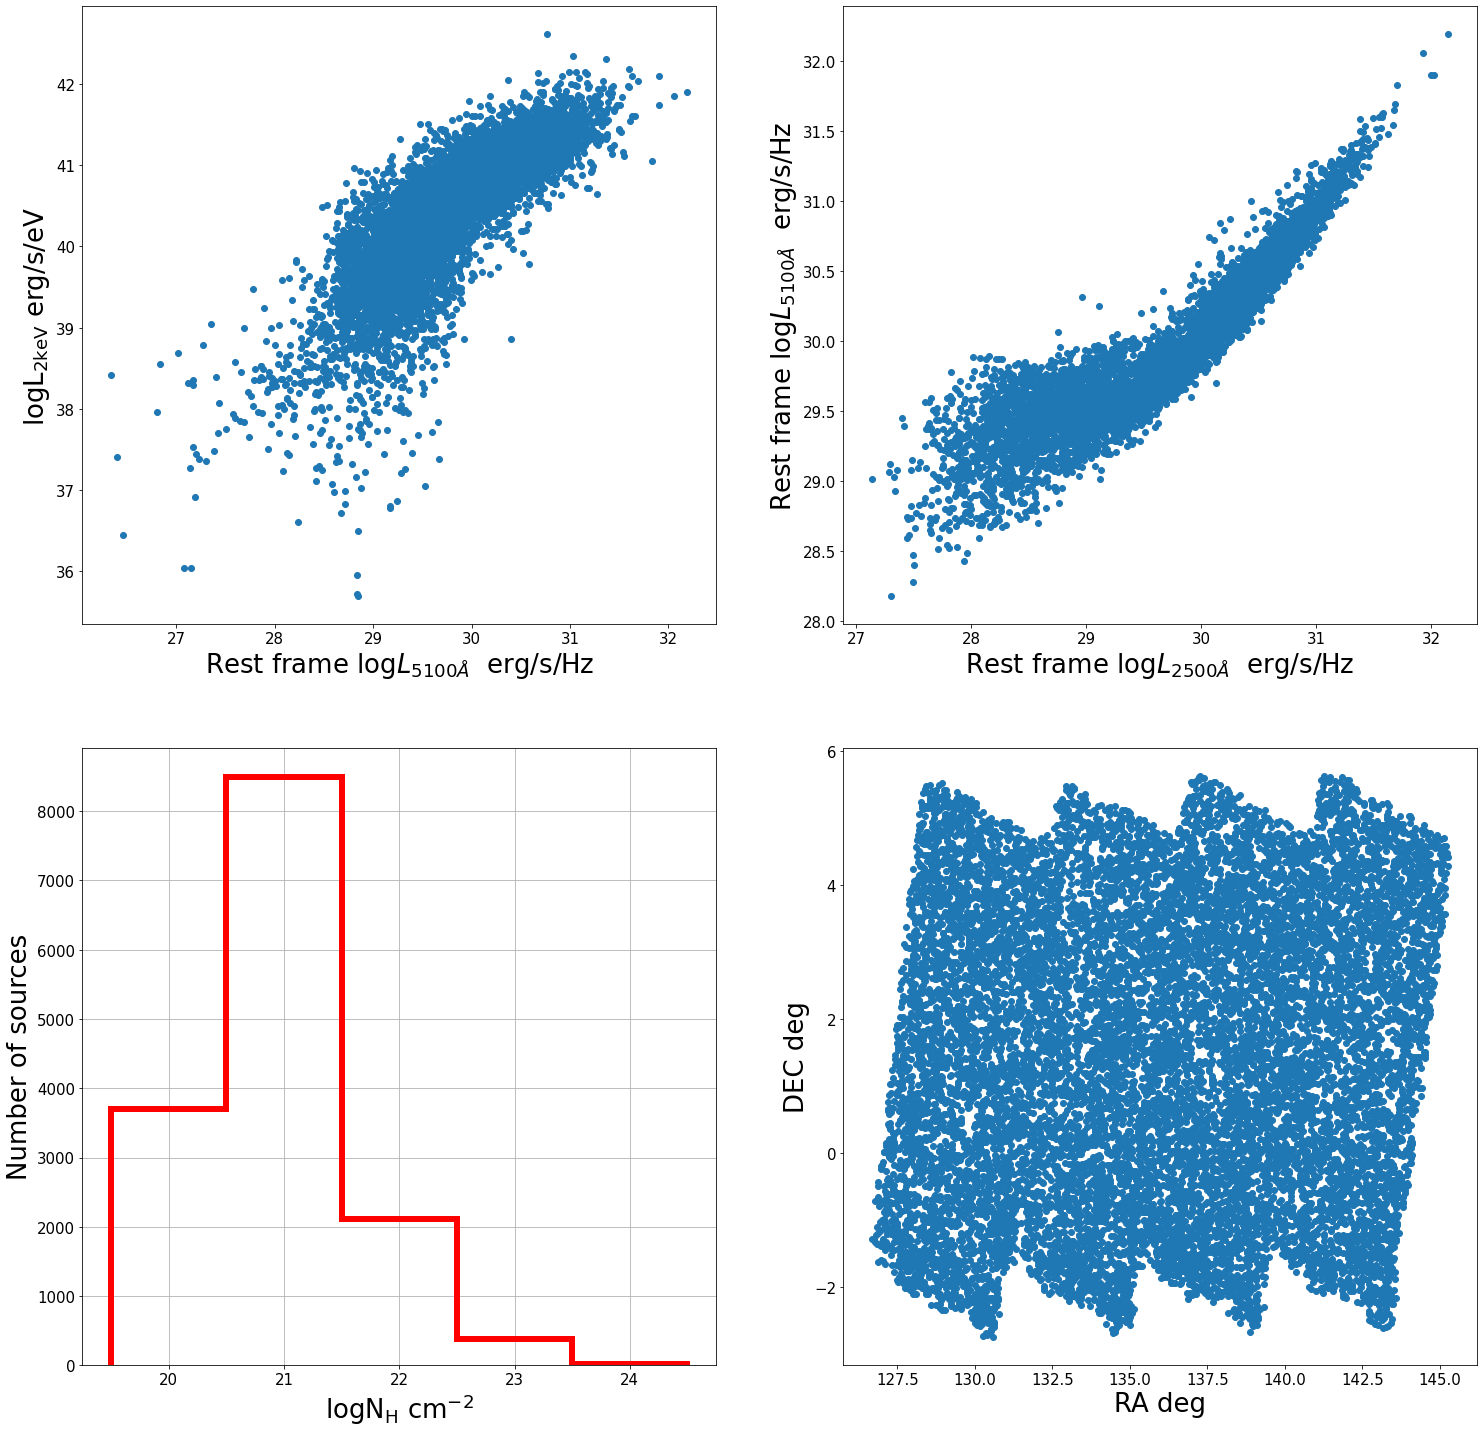

In [353]:
fig, axes = plt.subplots(2,2,figsize = (25,25))
ax = axes[0,0]
ax.scatter(l5100[l5100 != -99], l2kev[l5100 != -99])
ax.tick_params(axis='both', labelsize=15)
ax.set_xlabel('Rest frame log$L_{5100 \u212b}$  erg/s/Hz', fontsize=26)
ax.set_ylabel('log$\mathrm{L_{2keV}}$ erg/s/eV', fontsize=26)
ax = axes[0,1]
ax.scatter(l2500[(l5100 != -99) & (l2500 != -99)], l5100[(l5100 != -99) & (l2500 != -99)])
ax.tick_params(axis='both', labelsize=15)
ax.set_xlabel('Rest frame log$L_{2500 \u212b}$  erg/s/Hz', fontsize=26)
ax.set_ylabel('Rest frame log$L_{5100 \u212b}$  erg/s/Hz', fontsize=26)
ax = axes[1,0]
ax.hist(log_nh, histtype = 'step', color='red', lw=6, bins = nh_bins)
ax.tick_params(axis='both', labelsize=15)
ax.grid()
ax.set_xlabel('log$\mathrm{N_{H}}$ $\mathrm{cm^{-2}}$', fontsize=26)
ax.set_ylabel('Number of sources', fontsize=26)
ax = axes[1,1]
ax.scatter(erosita_df['RA_CORR'], erosita_df['DEC_CORR'])
ax.tick_params(axis='both', labelsize=15)
ax.set_xlabel('RA deg', fontsize=26)
ax.set_ylabel('DEC deg', fontsize=26)

Defining sloan digital sky survey quasar catalogue:

In [354]:
sdss = fits.open('./data/DR16Q_v4.fits')

Defining the catalogue's RA and DEC values:

In [355]:
sdss_RA = sdss[1].data['RA']
sdss_DEC = sdss[1].data['DEC']

Applying the skyarea to the eROSITA fit file and the sdss fits file;

In [356]:
with fits.open('./data/eFEDS_AGN_spec_V17.6.fits', mode = 'update') as hdul:
    hdul[1].header['SKYAREA'] = 142
    hdul.flush()

In [357]:
with fits.open('./data/DR16Q_v4.fits', mode = 'update') as hdul:
    hdul[1].header['SKYAREA'] = 7500
    hdul.flush()

Plotting the number of matched sources using the nway function for angular radii between 15" and 1", for a fixed positional error of 10" for eROSITA and 0.5" for sdss:

In [358]:
matches = np.array([24371, 24358, 24341, 24320, 24294, 24257, 24221, 24173, 24095, 23999, 23819])
matches -= 22079
radius = np.arange(15,4,-1)

Text(0, 0.5, 'Number of matches')

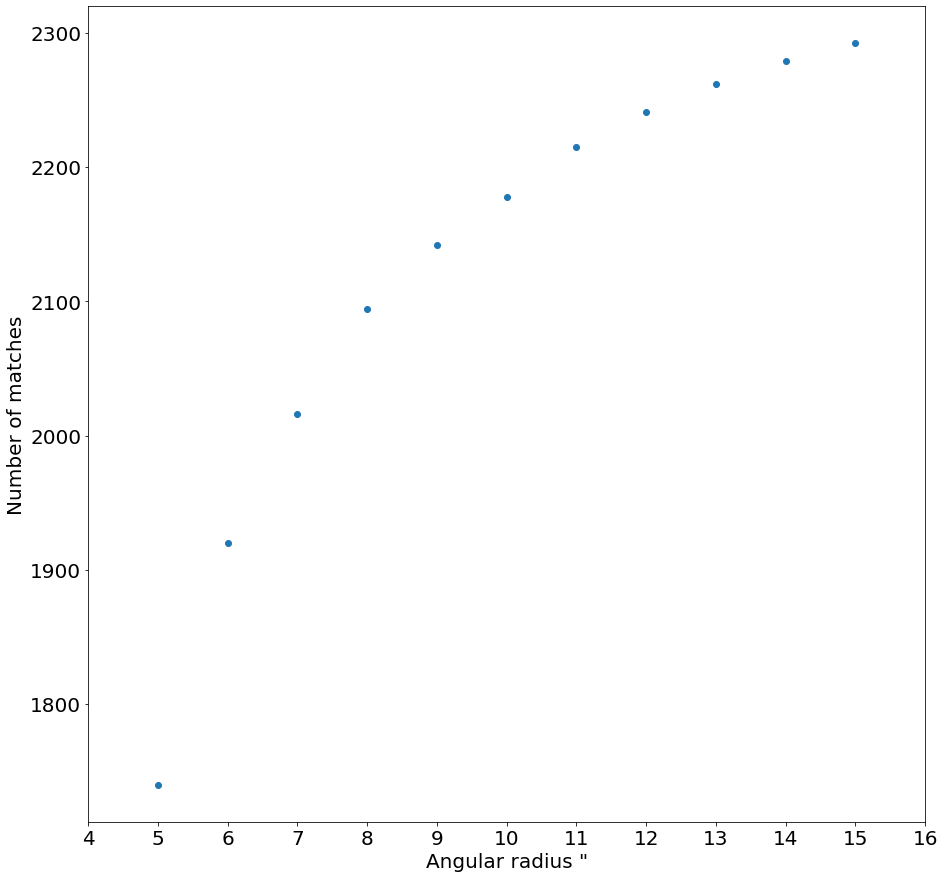

In [359]:
plt.figure(figsize=(15,15))
plt.scatter(radius, matches)
plt.tick_params(axis='both', labelsize=20)
plt.xticks(np.arange(4,17,1))
plt.xlabel('Angular radius "', fontsize=20)
plt.ylabel('Number of matches', fontsize=20)